# **Project Name**    - Cardiovascular Disease Risk Prediction




##### **Author Name -** Kushagra Mishra

# **Project Summary -**

The Framingham dataset is a famous dataset on residents from the town of Framingham, Massachusetts, which is based on an ongoing study with the purpose of prediction of cardiovascular risk provided certain medical and behavioural features of a given person. The objective of this project is to develop a classification model to predict the risk of Coronary Heart Disease (CHD) in 10 years for any given person. It also focuses on concluding an ideal set of methods at pre-processing of the data available in this context, to ready it for Machine Learning analysis.

The dataset contains various set of information of the residents, such as, Demographic - like sex, age, and education; Behavioral - such as the smoking status; and medical information like blood pressure, diabetes, cholesterol level, BMI, glucose, histories of stroke or hypertension, etc; all of which are important predictors of cardiovascular risk.

The first step in the project is to perform extensive data preprocessing, which includes handling missing values, handling outliers, and feature engineering. The missing values are filled realistically based on research, and outliers are dealt with after analysing whether they are within the range of realistic values of those features, to avoid loss of data. Feature engineering is performed by combining variables and creating new features, such as levels of glucose and mean arterial pressure. Hypothesis testing is also done to determine the significance and dependance of different features with the feature to be predicted. Some features such as education, history of stroke and hypertension, and diabetes were dropped based on analysis of the data.

After preprocessing, the dataset is split into training and testing sets based on a relevant test ratio. Both the training and testing data are scaled using the MinMaxScaler, with the limits of each feature on the basis of the training dataset. To handle the class imbalance of the variable to be predicted, SMOTE (Synthetic Minority Over-sampling Technique) is utilised on the training set. This training set is then used to fit seven different classification models, namely the Logistic Regression, Naive Bayes, Decision Tree, Support Vector Machine, K-Nearest Neighbours, Random Forest, and XGBoost. The performance of each model is evaluated based on the Recall score, as Recall is identified as the most important metric in this problem. The model with the highest Test Recall score is chosen as the final model.

The best model among the seven is identified to be the Decision Tree model on the first dataset, with a Test Recall score of 87.3%.

In conclusion, this project demonstrated the importance of data preprocessing, feature engineering, and model selection in developing a successful classification model for cardiovascular risk prediction. The project can be extended by including more features, exploring different preprocessing techniques, and evaluating the model's performance on external datasets.






# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display

!pip install shap
import shap

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of columns  in the dataset: {df.shape[1]}')

Number of rows in the dataset: 3390
Number of columns  in the dataset: 17


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Number of duplicated rows in the dataset: {df.duplicated().sum()}')

Number of duplicated rows in the dataset: 0


It is expected that **id** column should have all unique values, as it represents one unique person of interest

In [ ]:
df['id'].duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f'There are {df.isna().sum().sum()} missing values in the dataset\n')
df.isna().sum()

There are 510 missing values in the dataset



id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

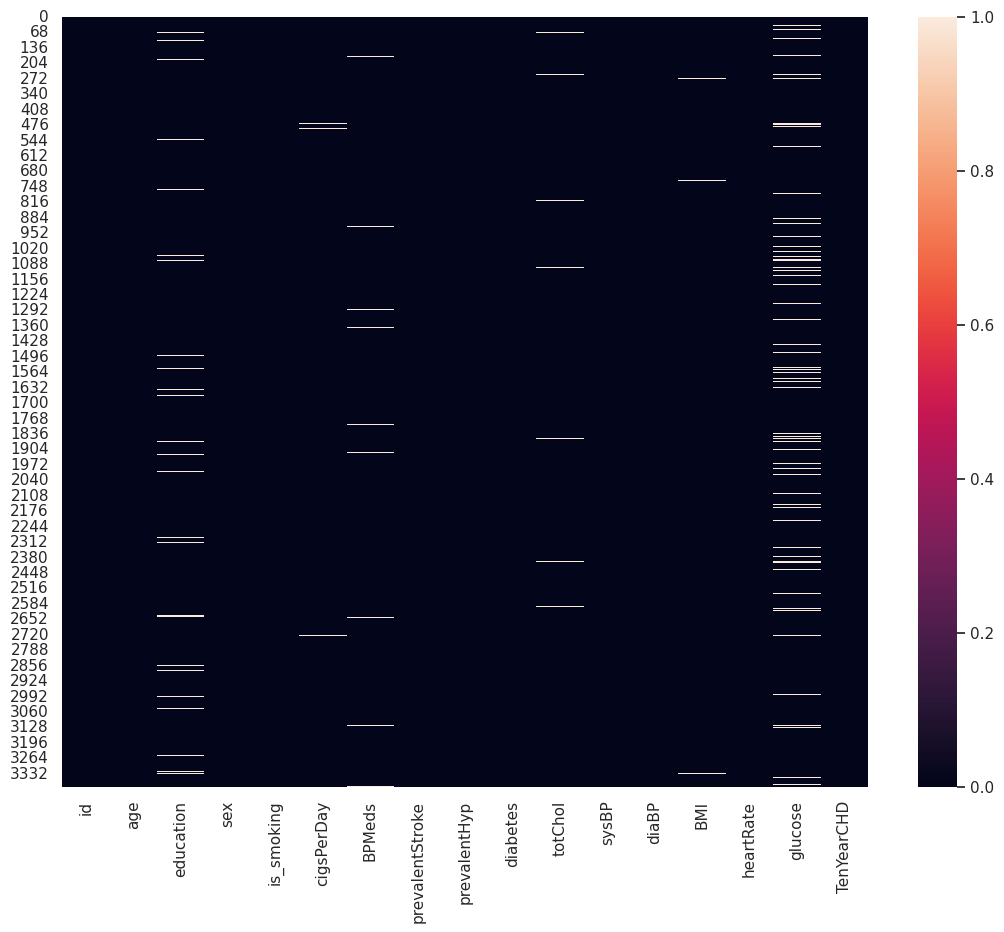

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(13, 10))
sns.heatmap(df.isna())

### What did you know about your dataset?

On a first look at the dataset, it is found that
*   There are **3390 rows and 17 columns**, out of which one is **TenYearCHD** which is the the dependent variable to be predicted
*   Two of these features are **not in numerical (int/float) datatype**
*   There are **no duplicated data** in the dataset, and all values in **id** column are **unique**
*   There are **510 missing values** in the dataset, with **304** of them in **glucose** column

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variable Description

The dataset is from an ongoing cardiovascular study on residents of the town Framingham, Massachusetts. The goal of this project is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). The various features (and their type), which are potential factors for CHD risk, utilised in this Cardiovascular Risk assessment are:

*   **id**: Personal identification number (Unique)

Demographic:
*   **sex**: Male or Female (Nominal)
*   **age**: Age of the patient (Continuous)
*   **education**: no information provided (**Ordinal assumed**)

Behavioral:
*   **is_smoking**: Whether or not the patient is a current smoker (Nominal)
*   **cigsPerDay**: Number of cigarettes smoked by the person per day on average (Continuous)

Medical information:
*   **BPMeds**: Whether or not the patient is on blood pressure medication (Nominal)
*   **prevalentStroke**: Whether or not the patient previously had a stroke (Nominal)
*   **prevalentHyp**: Whether or not the patient was hypertensive (Nominal)
*   **diabetes**: Whether or not the patient has diabetes (Nominal)
*   **totChol**: Total cholesterol level in mg/dL (Continuous)
*   **sysBP**: systolic blood pressure in mmHg (Continuous)
*   **diaBP**: diastolic blood pressure in mmHg (Continuous)
*   **BMI**: Body Mass Index (Continuous)
*   **heartRate**: Heart rate (Continuous)
*   **glucose**: glucose level in mg/dL (Continuous). **Fasting glucose has been assumed**

Target variable to predict:
*   **TenYearCHD**: 10 year risk of coronary heart disease (CHD) - (Nominal)

### Check Unique Values for each variable.

In [ ]:
# Splitting the categorical and continuous variables
categ_vars = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
cont_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
# Check Unique Values for categorical variables
for var in categ_vars:
  print(f'Unique values in {var} are: {df[var].dropna().unique()})')

Unique values in sex are: ['F' 'M'])
Unique values in education are: [2. 4. 1. 3.])
Unique values in is_smoking are: ['YES' 'NO'])
Unique values in BPMeds are: [0. 1.])
Unique values in prevalentStroke are: [0 1])
Unique values in prevalentHyp are: [0 1])
Unique values in diabetes are: [0 1])


In [ ]:
# Checking the values for id
print(f"The number of unique IDs in dataset are {df['id'].nunique()}, with the minimum as {df['id'].min()} and maximum as {df['id'].max()}")

The number of unique IDs in dataset are 3390, with the minimum as 0 and maximum as 3389


It is observed that,
*   **Sex** contains two values - Male and Female
*   **Education** has 4 values - 1, 2, 3, 4. It is assumed that it represents a hierarchy of educational qualification levels among the patients
*   **is_smoking**, **BPMeds**, **prevalentStroke**, **prevalentHyp** and **diabetes** are nominal binaries where 0 represents 'No' and 1 represents 'Yes'
*   Each patient in the dataset are **unique** and there are no repeated data

## **3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

As part of Data Visualisation, the features and their relationship with the dependent variables (or each other if necessary) are analysed in the following parts
1. [Analysing the distribution of Continuous independent features](#scrollTo=0wOQAZs5pc--)
2. [Analysing the distribution of Discrete independent features](#scrollTo=KSlN3yHqYklG)
3. [Analysing the distribution of the dependent variable](#scrollTo=EM7whBJCYoAo&line=1&uniqifier=1)
4. [Analysing the relationship between the Continuous variables and the Dependent variable](#scrollTo=4Of9eVA-YrdM)
5. [Analysing the relationship between the Discrete variables and the Dependent variable](#scrollTo=bamQiAODYuh1)
6. [Analysing the "BPMeds" variable](#scrollTo=BZR9WyysphqO&line=1&uniqifier=1)
7. [Analysing the Education variable](#scrollTo=PIIx-8_IphqN&line=1&uniqifier=1)
8. [Correlation Heatmap](#scrollTo=NC_X3p0fY2L0&line=1&uniqifier=1)

#### Chart - 1 - Distribution of Continuous Independent features

In [ ]:
# Setting default theme for Seaborn visualisation
sns.set()

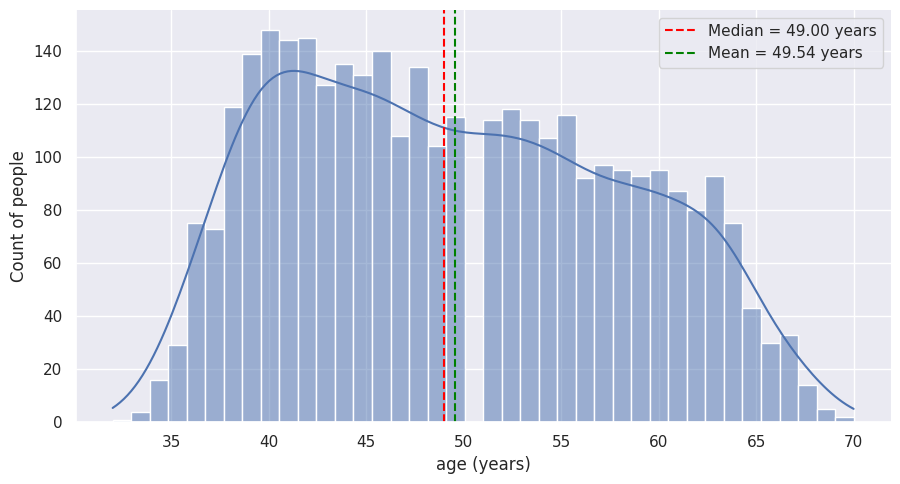

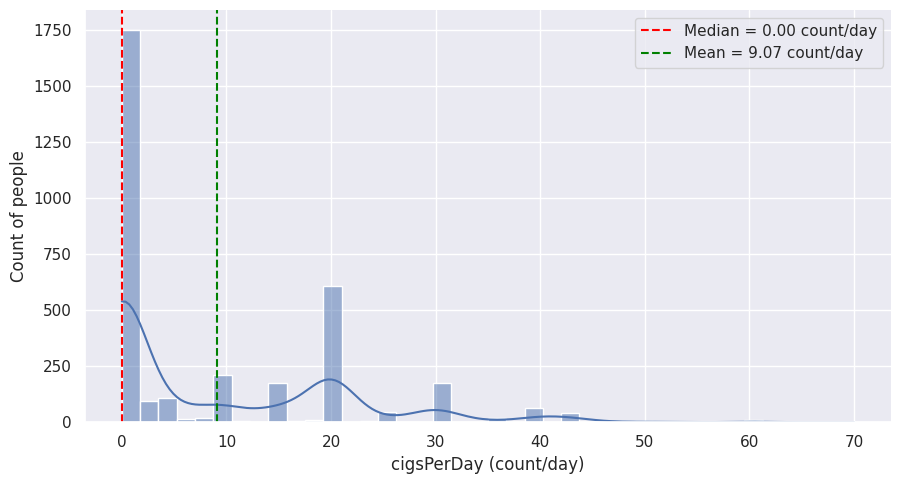

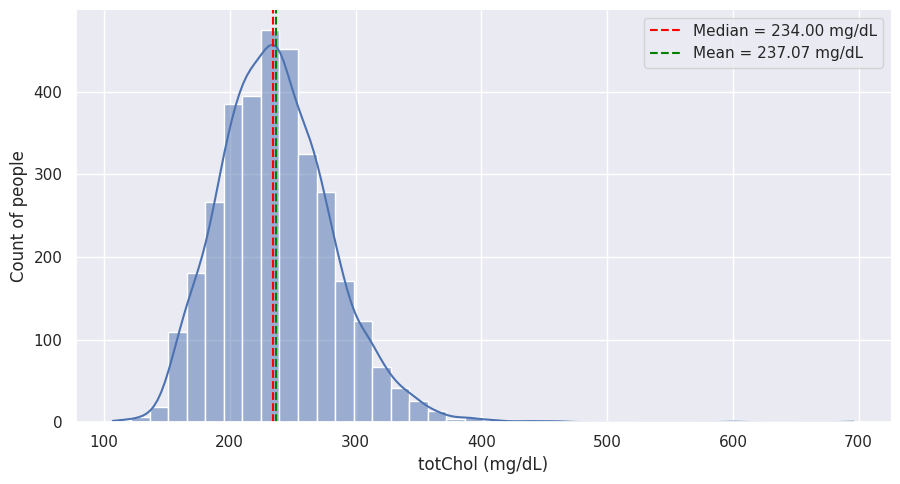

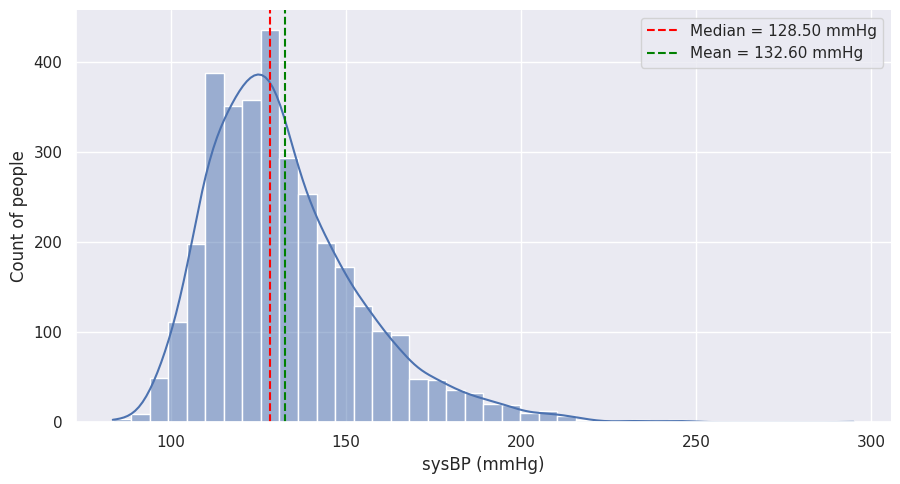

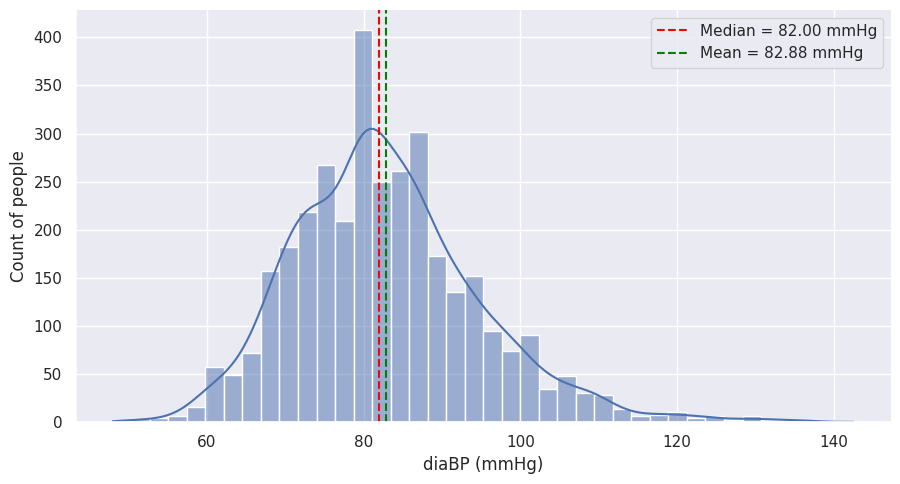

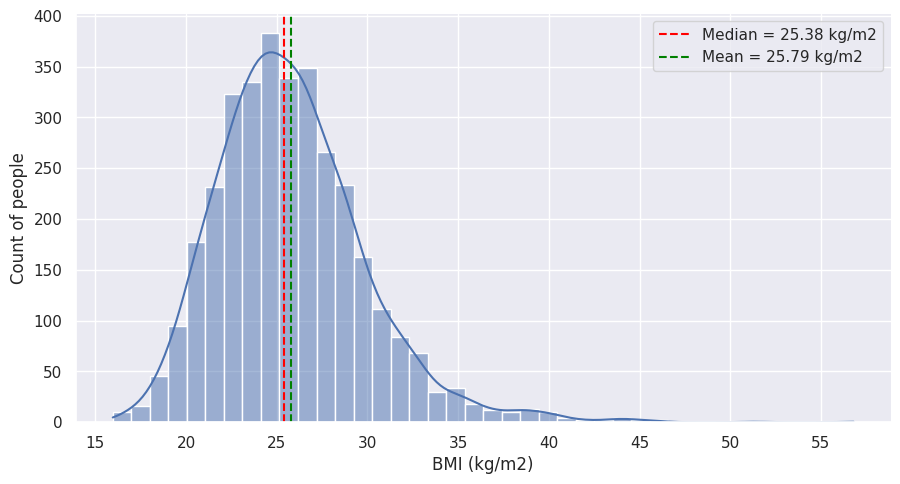

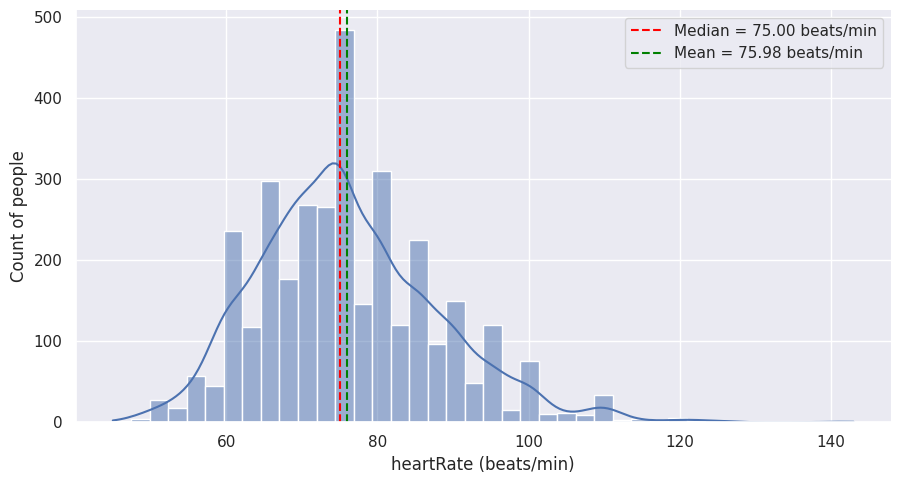

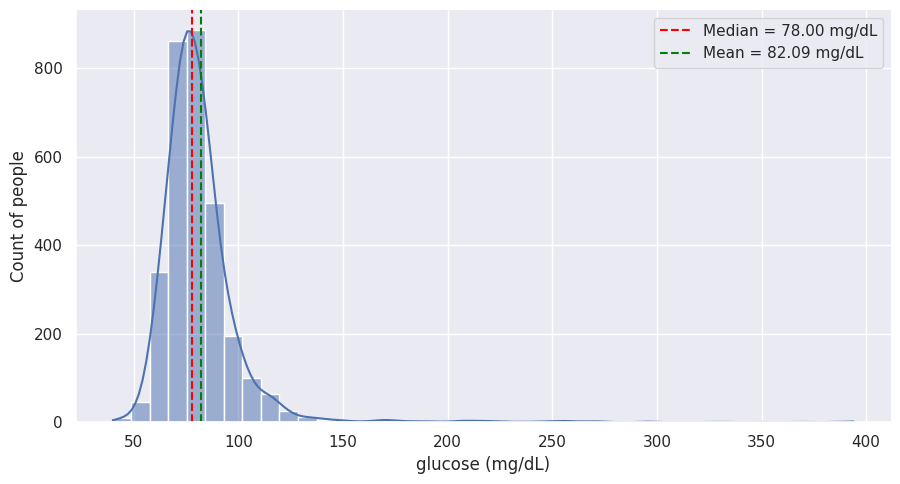

In [ ]:
# Function for Plotting the continuous variable distribution along with their median and mean
def displot_with_median(dataset, variable, median = False, mean = False, unit = None):
  '''A displot with median and mean and the appropriate units (if any) as the inputs'''
  sns.displot(dataset[variable], height = 5, aspect = 11/6, bins = 40, kde = True)
  if median == True:
    plt.axvline(dataset[variable].median(), color = 'red', linestyle = '--', label = f'Median = {dataset[variable].median():.2f} {unit}')
  if mean == True:
    plt.axvline(dataset[variable].mean(), color = 'green', linestyle = '--', label = f'Mean = {dataset[variable].mean():.2f} {unit}')
  plt.ylabel('Count of people')
  plt.xlabel(var + f' ({unit})')
  plt.legend()
  plt.show()

# Units for each of the continuous variables
units = ['years', 'count/day', 'mg/dL', 'mmHg', 'mmHg', 'kg/m2', 'beats/min', 'mg/dL']
cont_var_units = dict(zip(cont_vars, units))

# Plotting the continuous variable distributions
for var in cont_var_units:
  displot_with_median(df, var, median = True, mean = True, unit = cont_var_units[var])

##### 1. Why did we pick this specific chart?

The distplot is useful for continuous variables because it provides a visual representation of the distribution of values in the variable across the dataset. This allows one to understand how the data is distributed, such as whether it follows a normal distribution, is skewed to the left or right, or has multiple peaks. It can also help to identify outliers and anomalies in the data, which can be further investigated and addressed as needed.

##### 2. What is/are the insight(s) found from the chart?

*   From the plots, it is observed that most of the continuous variables have a skew towards the left (either slight or high). This is also observed in the median of the variables which are lesser than the mean. Some variables also seem to have outliers which may require a treatment. But before treatment of outliers, it has to be analysed whether the values are unreasonable or impossible
*   [According to the ACC/AHA](https://www.acc.org/latest-in-cardiology/articles/2017/11/08/11/47/mon-5pm-bp-guideline-aha-2017), the optimum levels of Systolic BP and DIastolic BP are around 130mmHg and 80mmHg respectively. The median/mean of these metrics in the dataset is almost equal if not greater than these values, which only indicates than over half of the people have a Blood Pressure level higher than optimum.

#### Chart - 2 - Distribution of Discrete Independent features

In [ ]:
# Defining a function to annotate the data values in the graph
def display_vals(axis, round_ = 2):
  '''Displays the data value on the chart'''
  for p in axis.patches:
   axis.annotate(str(round(p.get_height(), round_)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

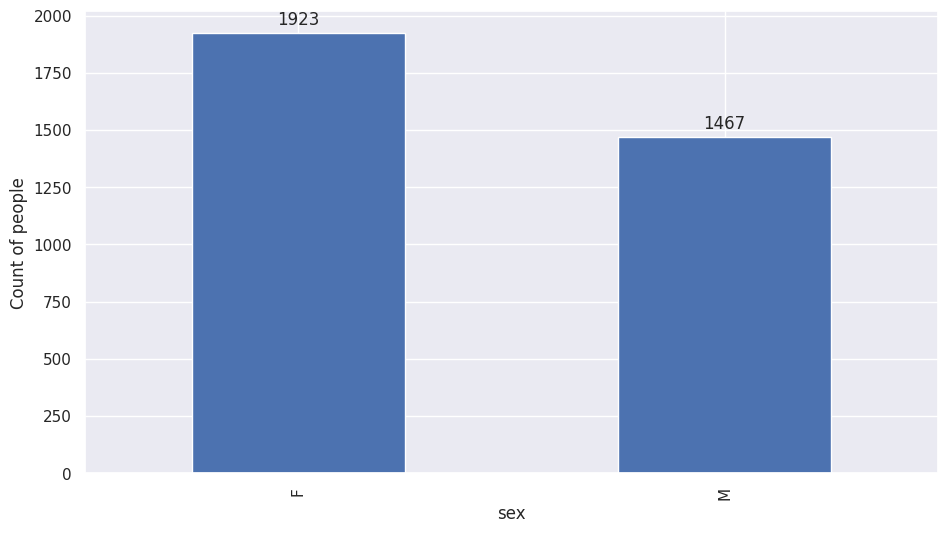

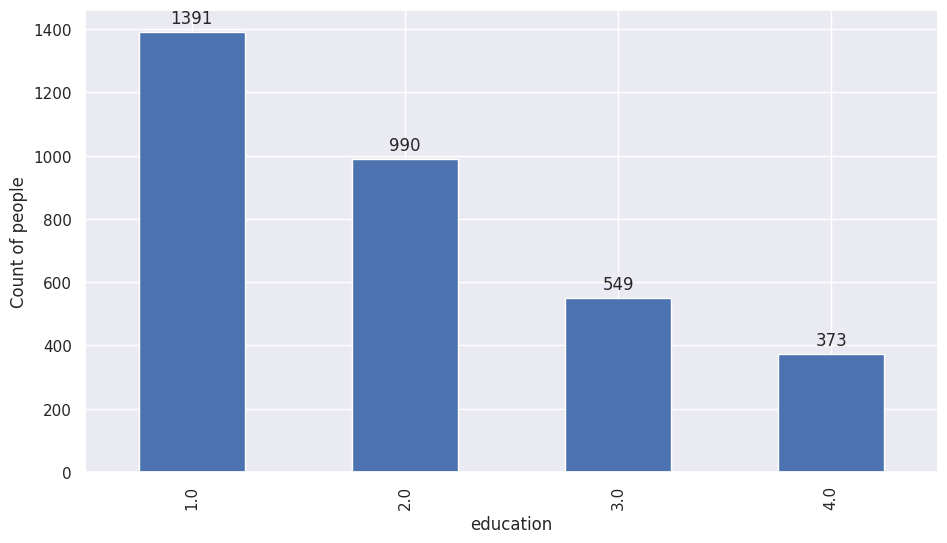

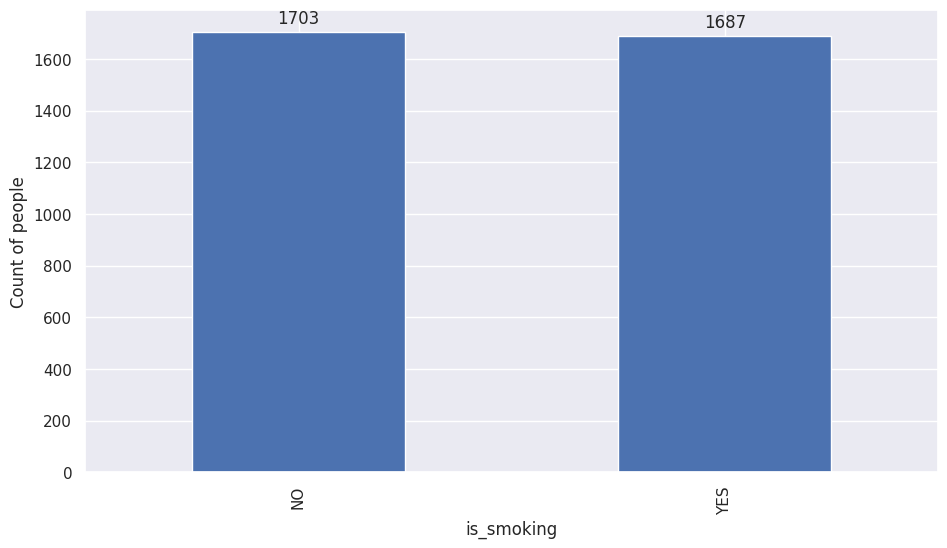

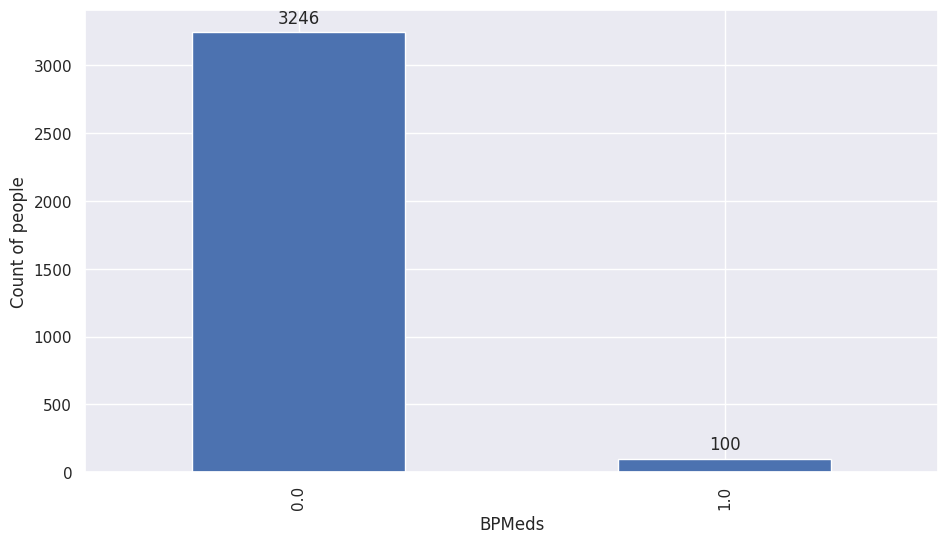

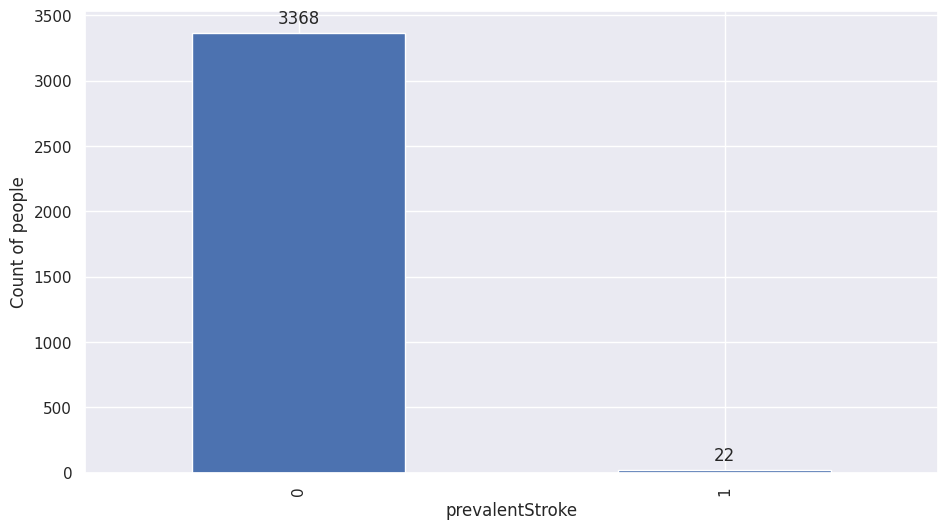

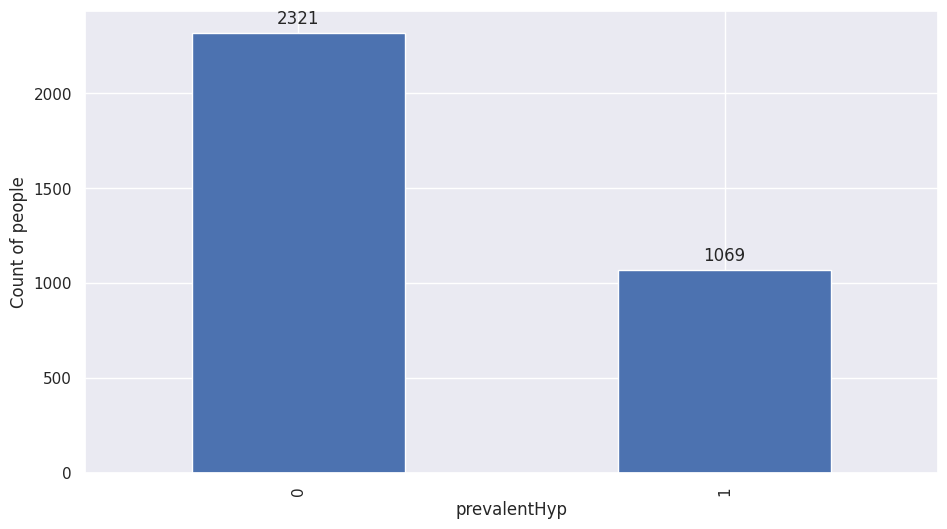

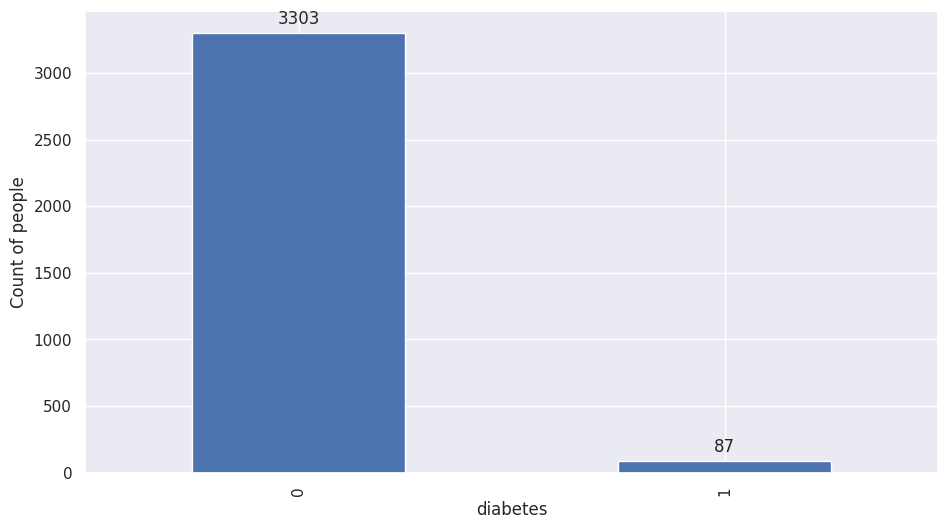

In [ ]:
for var in categ_vars:
  plt.figure(figsize = (11, 6))
  ax = df[var].value_counts().plot(kind = 'bar')
  plt.ylabel('Count of people')
  plt.xlabel(var)
  display_vals(ax)

##### 1. Why did we pick this specific chart?

Barplots are useful for discrete variables because they allow us to visualize the frequency or proportion of each category in the variable occuring in the dataset, to identify any imbalances or patterns in the data, and for comparing these across different groups or subgroups in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following can be observed from the above plots:
*   There are **more number of females** present in the dataset than males.
*   Assuming that the values in Education feature are hierarchical in ascending order, **more number of people are less educated** in the dataset
*   **Only 100 people (~3% of dataset) are taking medications for Blood pressure** despite **over a 1000 people having history of Hypertension** and also, half of the people having systolic and diastolic Blood Pressure over the optimum 130mmHg/80mmHg respectively as seen in previous Chart
*   **Only 22 people have had a recorded history of stroke** (0.6% of dataset)
*   **Only 87 people have diabetes** (~2% of the dataset)

##### 3. Will the gained insights help creating a positive business impact?

The disproportion between the number of people taking medications for Blood Pressure and those with BP levels higher than optimum could be addressed on analysing these data. Further tests if necessary could be conducted on those with high BP and not taking medications, and to prescribe them any medications based on the results, if necessary.

#### Chart - 3 - Distribution of the Dependent variable to be predicted

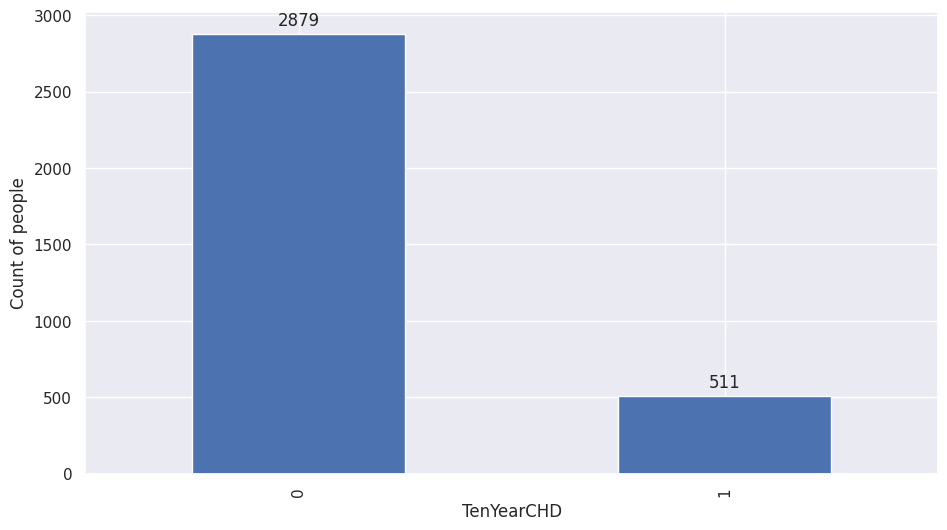

In [ ]:
var = 'TenYearCHD'
plt.figure(figsize = (11, 6))
ax = df[var].value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel(var)
display_vals(ax)

##### 1. Why did we pick this specific chart?

As stated earlier, bar plot is effective to visualise distribution of various categories present in a discrete variable across the dataset

##### 2. What is/are the insight(s) found from the chart?

As evident, the classes in the variable to be predicted are heavily imbalanced. Majority of people (~85%) belong to the class which represents no risk of 10-year Cardiovascular Heart Disease. This has to be treated in order for better results through the Machine Learning models.

#### Chart - 4 - Relationship between the Continuous variables and the Dependent variable

In [ ]:
# Defining a function for categorical plot with median
def catplot_with_median(dataset, variable, legend, median = False, unit = None, kind_ = 'violin'):
  ''' Returns a categorical plot with median. Inputs: Dataframe dataset, continuous variable to plot,
  the discrete variable to legend on, median (True/False), unit and type of plot'''

  sns.catplot(data = dataset, x = legend, y = variable, height = 5, aspect = 11/6, kind = kind_)
  plt.ylabel(variable + f' ({unit})')
  if median == True:
    colour = ['green', 'red', 'yellow', 'pink']
    i = 0
    for value in dataset.dropna()[legend].unique():
      plt.axhline(dataset[dataset[legend] == value][variable].median(), color = colour[i], linestyle = '--', label = f"Median ({legend} = {value}) = {dataset[dataset[legend] == value][variable].median():.2f} {unit}")
      i+=1
    plt.legend(bbox_to_anchor=(1, 0.54))
  plt.show()

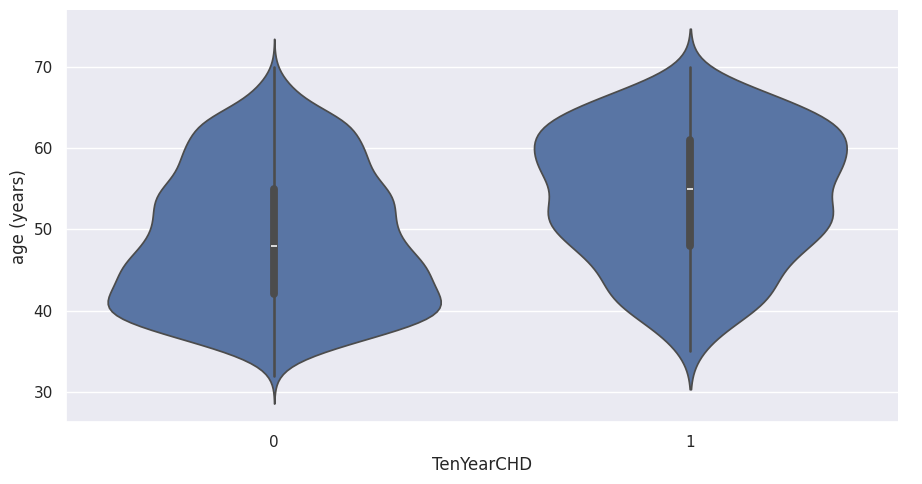

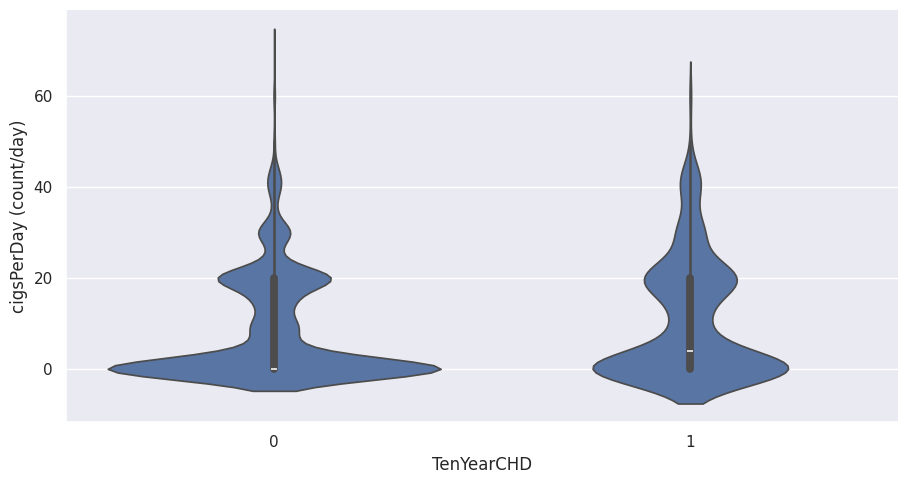

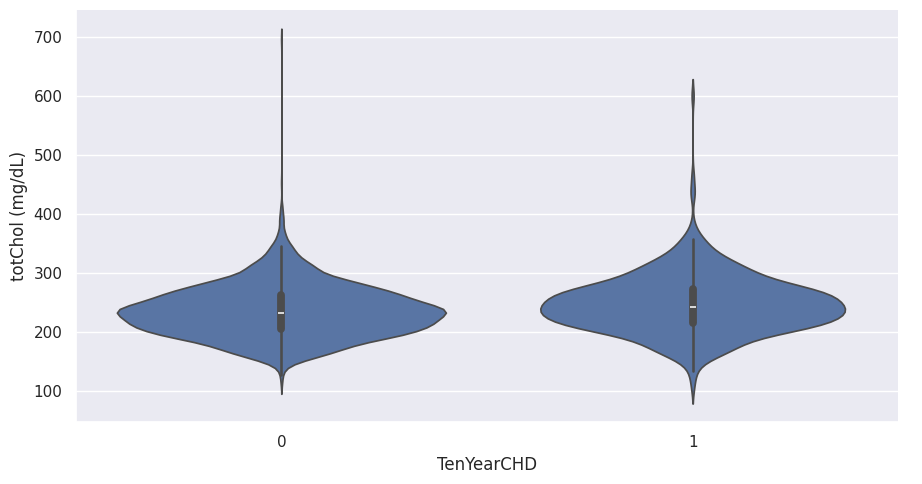

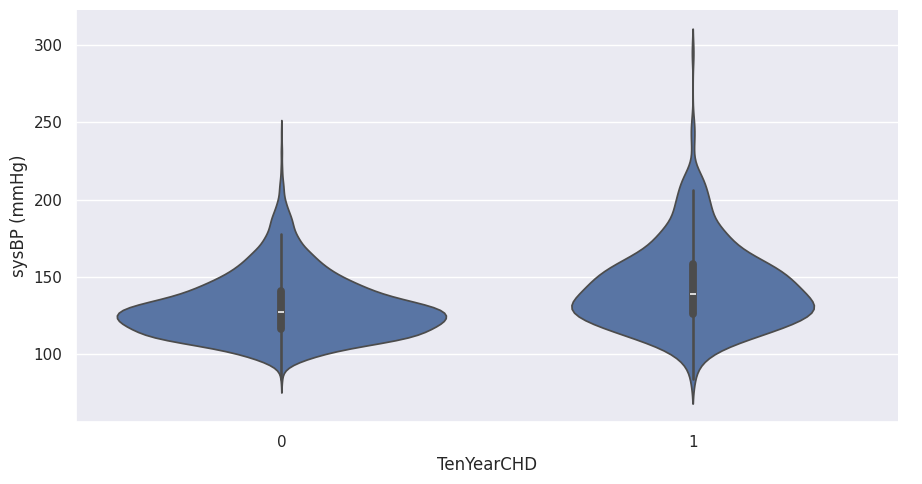

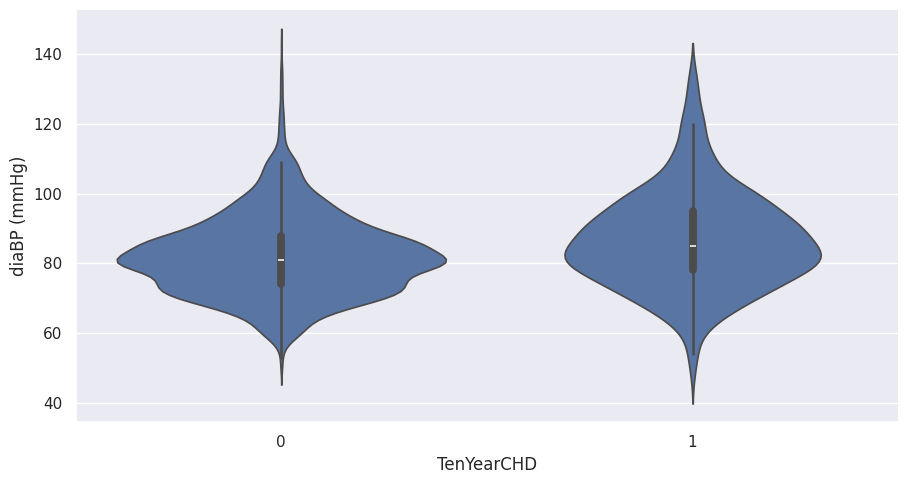

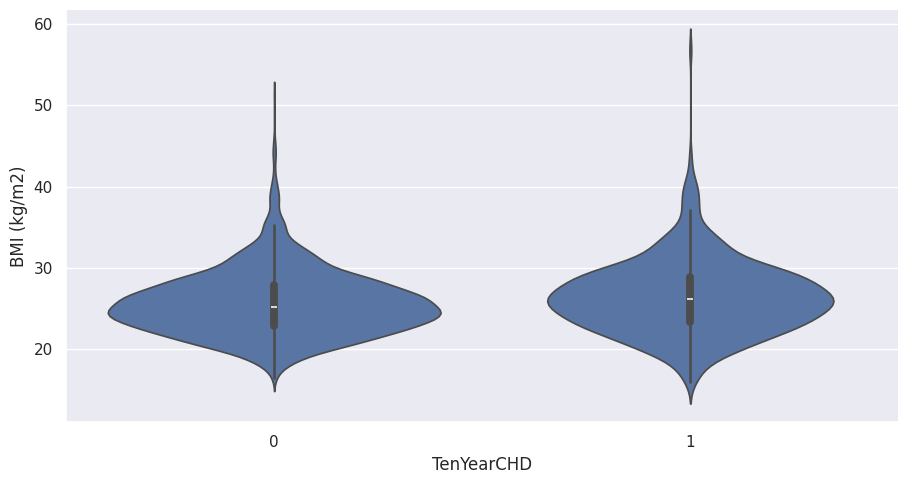

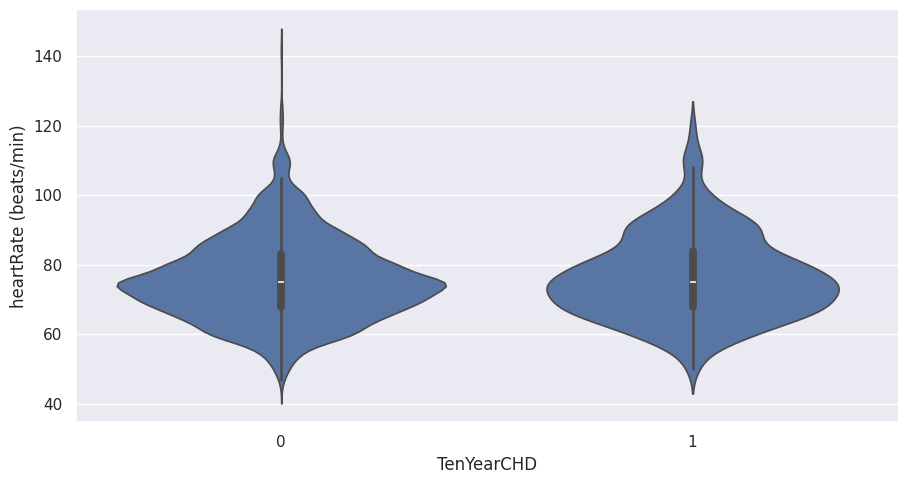

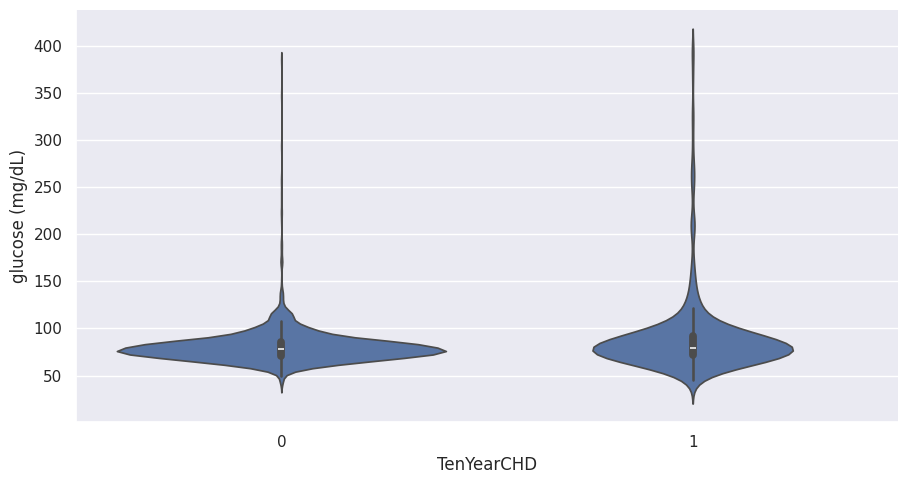

In [ ]:
for var in cont_var_units:
  catplot_with_median(dataset = df, variable = var, legend = 'TenYearCHD', unit = cont_var_units[var], kind_ = 'violin')

##### 1. Why did we pick this specific chart?

A violin plot helps to effectively visualise the distribution of a continuous variable across the different categories of a categorical variable. It combines the features of box and kernel density plots in that the width of the violin at a particular point represents the density or frequency of the data at that point, while the height represents the range of values for the data.

##### 2. What is/are the insight(s) found from the chart?

The following observations could be drawn from the above violin plots:
*   By just looking at the plots, it can be observed that age is a major factor contributing to risk of CVD. More number of older patients have a risk of CVD than younger patients
*   More number of non-smokers are present among those who have no risk of CVD in next ten years. The violin plot for cigarettess/day is more flattened in the case of those with risk of CVD
*   The plots of Blood pressures, BMI and glucose levels show only minute variations, and nothing conclusive can be established

#### Chart - 5 - Relationship between the Discrete variables and the Dependent variable

In [ ]:
# Function for plotting both proportion and count plots for each variable. With formatting
def bivariate_discrete_plot(dataset, variable, legend, size):
  '''Plots both the count plot and "proportion" plot - the latter of which displays percentage
  of people in the classes of "legend" variable in each class of the variable in x-axis'''

  # Creating dataframes with count and proportion data
  counts = dataset.groupby([variable, legend], as_index = False)['id'].count()
  props = pd.merge(counts.groupby(variable)['id'].sum(), counts, on = variable)
  props['proportion'] = props['id_y']*100/props['id_x']

  # Plotting the two data
  fig, axes = plt.subplots(1, 2, figsize = size)

  ax1 = sns.barplot(data = props, x = variable, y = 'proportion', hue = legend, ax = axes[0])
  ax1.legend_.remove()
  ax1.set(ylabel = 'Proportion of people (%)')
  display_vals(ax1)

  ax2 = sns.barplot(data = counts, x = variable, y = 'id', hue = legend, ax = axes[1])
  ax2.set(ylabel = 'Count of People')
  sns.move_legend(ax2, "lower center", bbox_to_anchor = (1.15, 0.4), title = legend, handlelength = 2.5)
  display_vals(ax2)

  plt.tight_layout()
  plt.show()

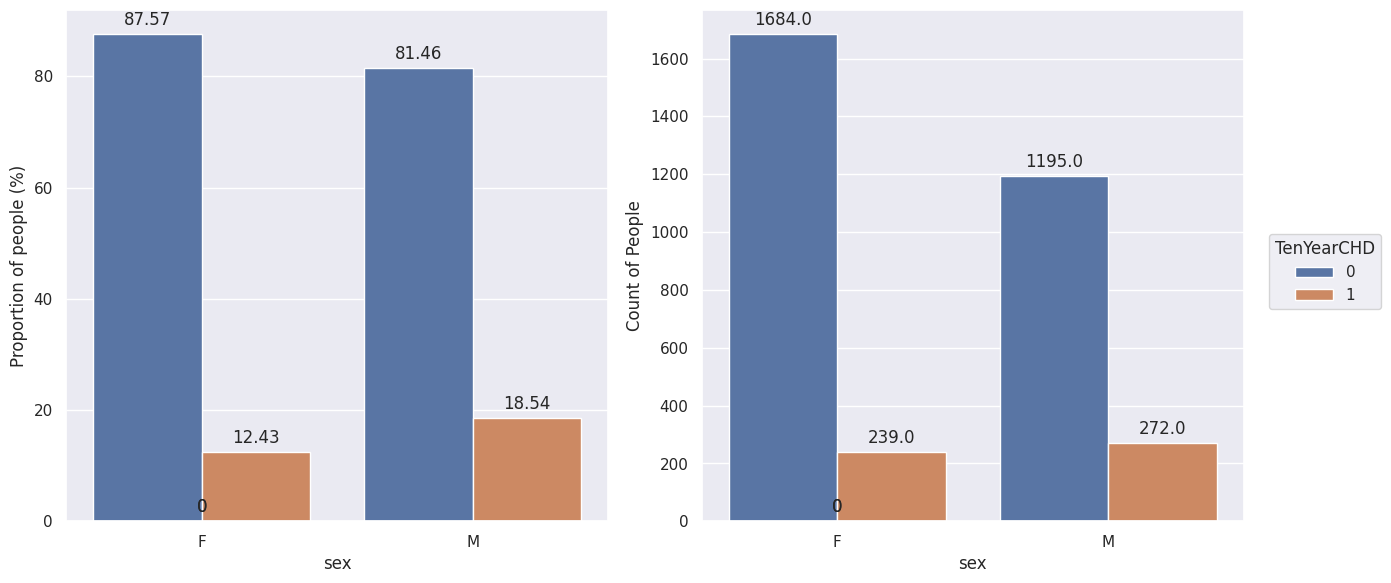

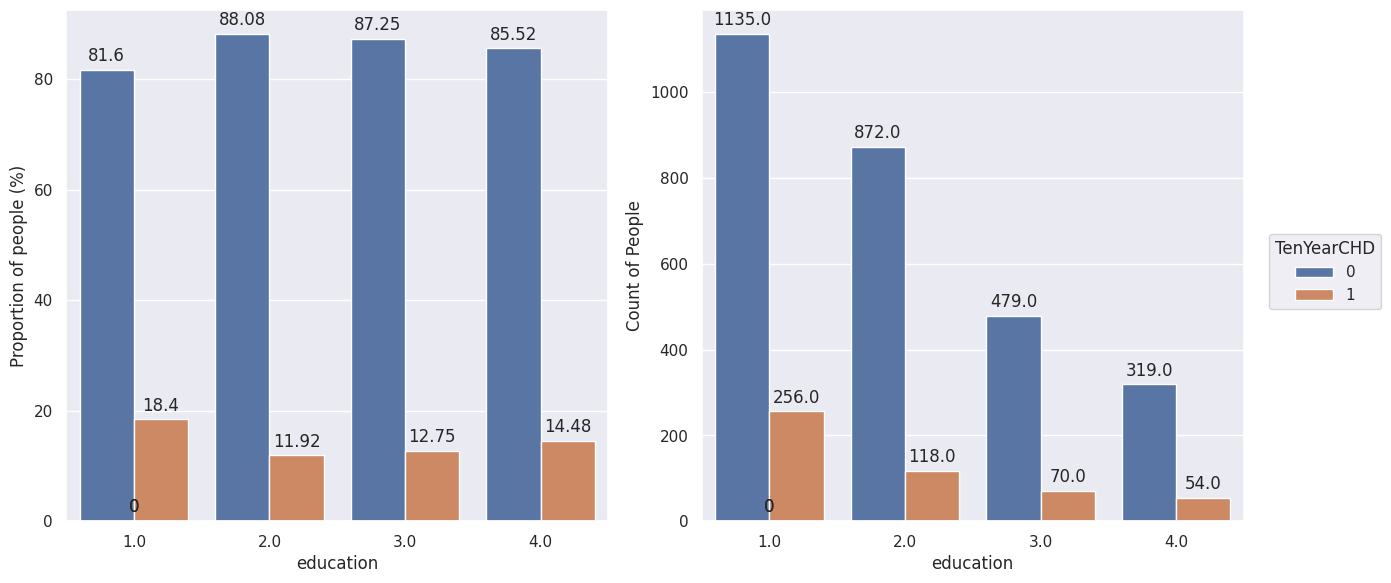

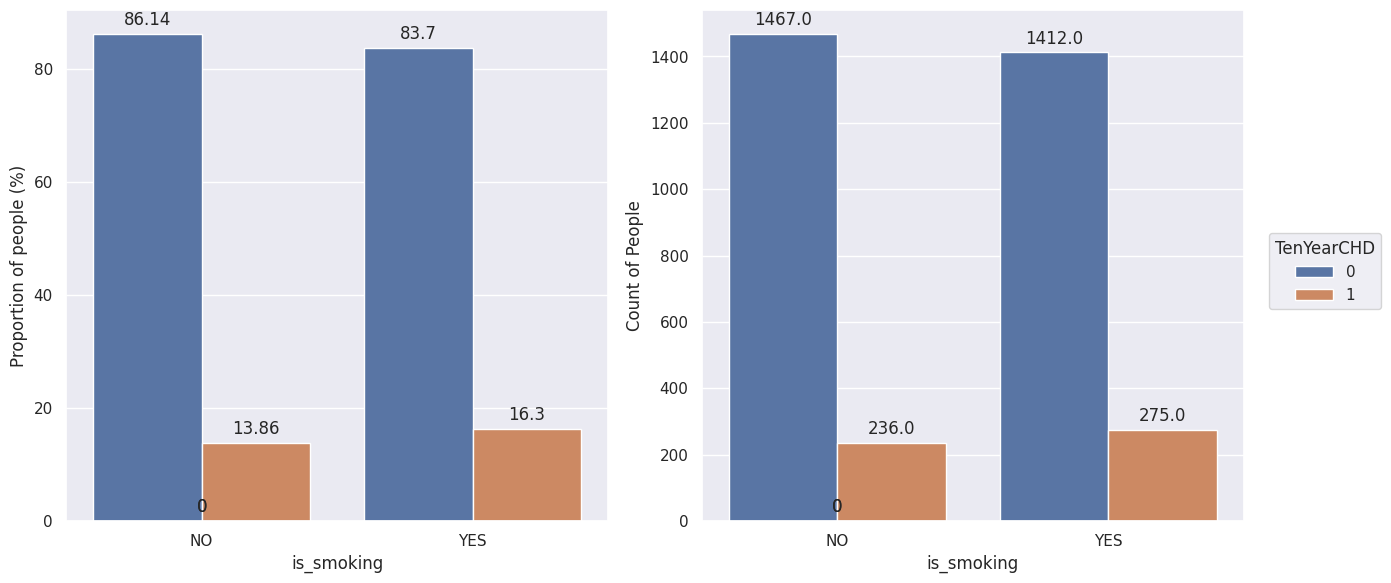

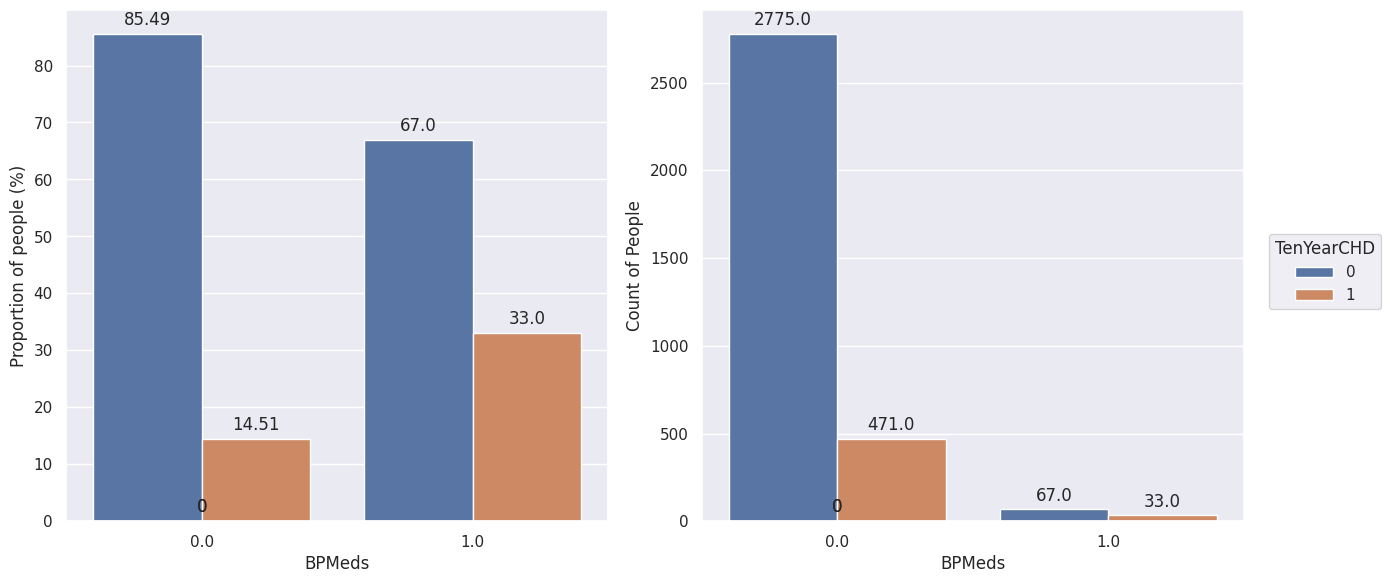

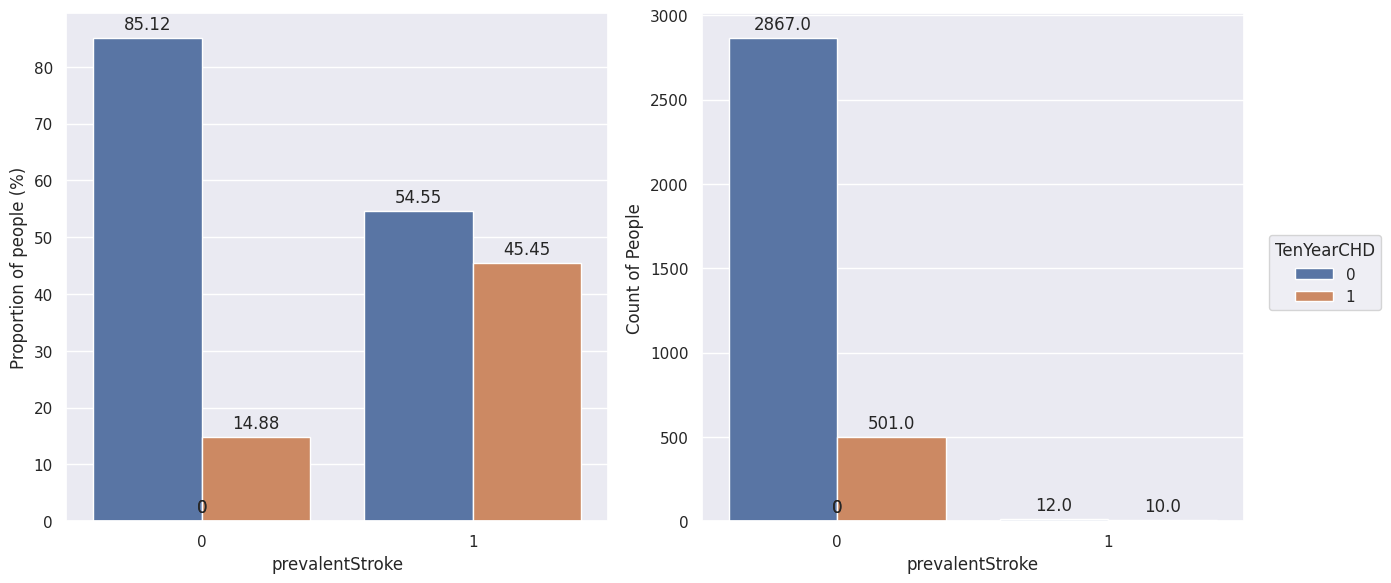

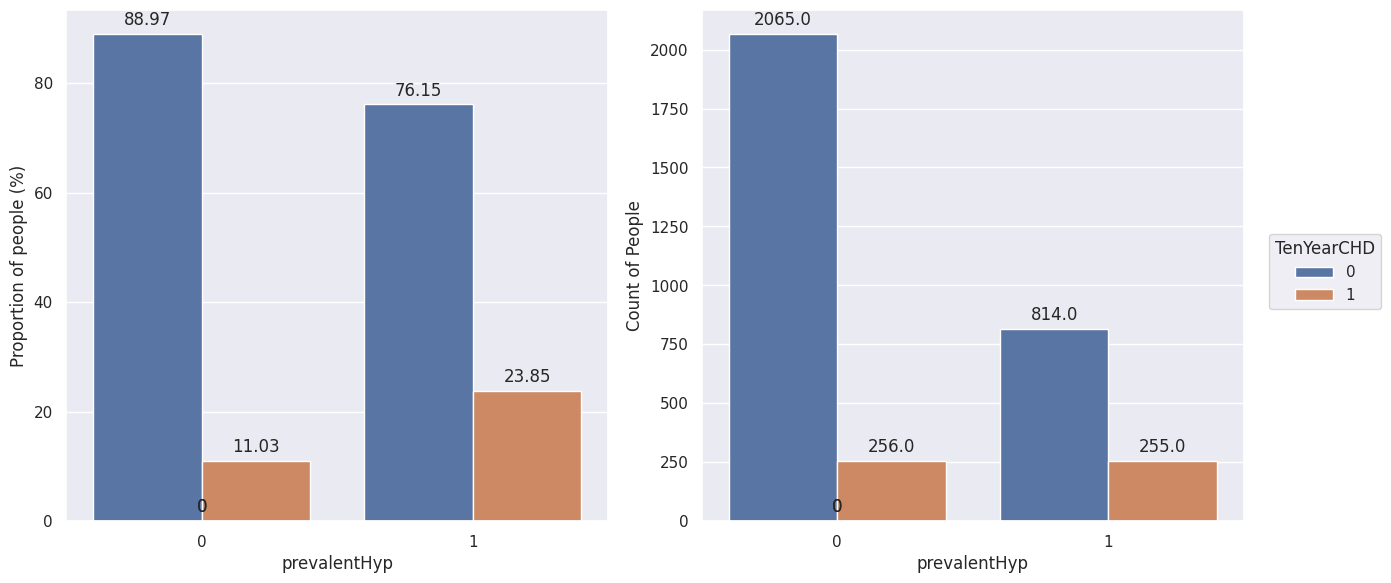

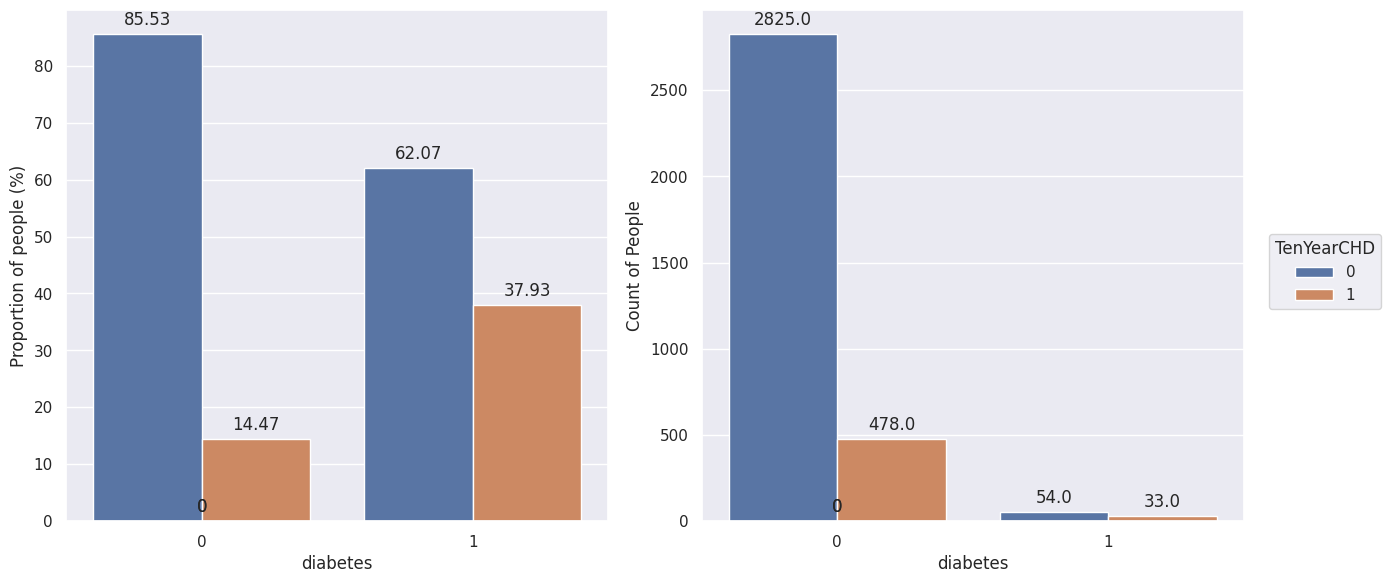

In [ ]:
for var in categ_vars:
  bivariate_discrete_plot(dataset = df, variable = var, legend = 'TenYearCHD', size = (14, 6))

##### 1. Why did we pick this specific chart?

*   Apart from the usual count plot, the "proportion" plot was also introduced here since the distribution is often not clear in the former
*   For example, though **only 33 people have risk of CVD among those who have diabetes (compared to 478 who have a risk but no diabetes)**, we have to consider the total number of people who actually have diabetes. That is, **38% of people of those who have diabetes have a risk of CVD compared to 15% with no diabetes**. This shows a massive variation, which is not noticed in the count plot

##### 2. What is/are the insight(s) found from the chart?

The following points can be observed in the dataset from above charts:
*   Males have a slightly higher percentage of risk of CVD (18.5%) compared to females (12.4%)
*   Those with lower level of education have a higher percentage of CVD risk (18.4%). A close second are those with highest level of education (14.5%)
*   Very little effect of smoking on CVD risk can be observed. Smokers have about 16% chance of CVD risk while non-smokers have 14%
*   Patients who take BP Medications have a significantly higher risk of getting CVD (33%) than those who do not take the same (14.5%) [(Refer more in the next section)](#scrollTo=UOhNk1RpcMq9&line=5&uniqifier=1)
*   Those who have a history of Stroke have a higher risk of getting CVD (45.5%) than those who don't have a history of stroke (15%)
*   Those who have a history of Hypertension have a higher risk of getting CVD (24%) than those who don't have a history of Hypertension (11%)
*   38% of those who have diabetes have a risk of getting CVD while only 15% of those with no diabetes have a risk of CVD.

##### 3. Will the gained insights help creating a positive business impact?

Having a history of stroke, history of Hypertension or higher levels of diabetes can be seen to affect the risk of Cadriovascular Disease. These are the factors under direct control, unlike features like Age. Hence, an initiative for medical care could be undertaken for these (for example diabetes treatment with insulin doses if any needed) based on reading these charts

#### Chart - 6 - Analysing the "BPMeds" variable

[As seen earlier](#scrollTo=uyqkiB8YYuh3&line=5&uniqifier=1), a counter-intuitive result was observed that those who were on medications for Blood Pressure had a higher risk of CVD, while we know these medications are taken for controlling BP which leads to a reduction in risk of CVD.

This relation is not a cause, i.e., BPMedications are not a causation to higher risk of CVD. Rather, it is only an effect of other contributing factors.

**The first hypotheses is that**, it could be because those patients taking medications generally have a higher systolic and diastolic Blood Pressures. Their distributions are plot below for those who take medications and those who don't

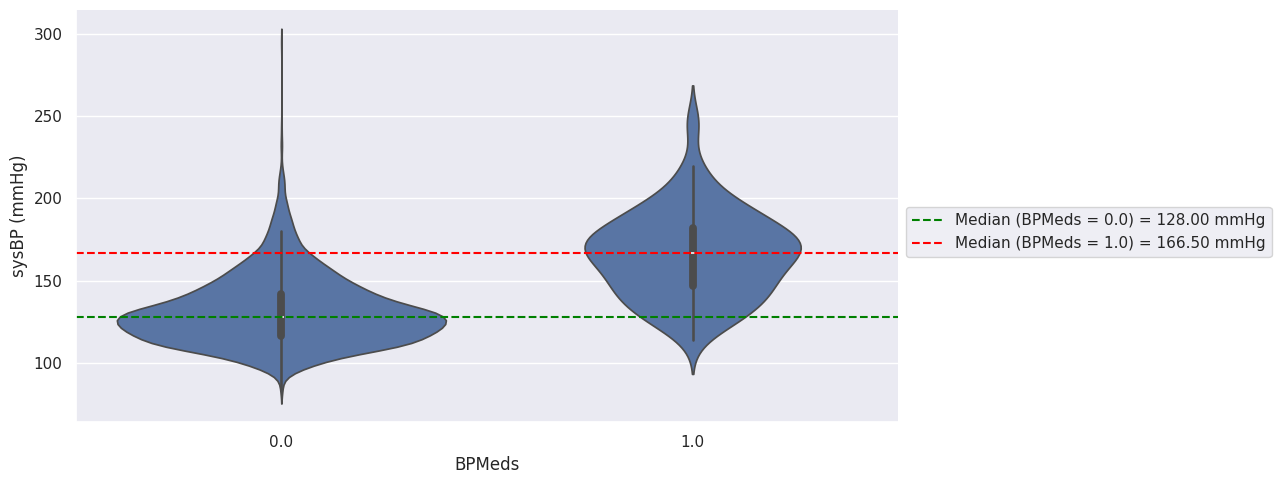

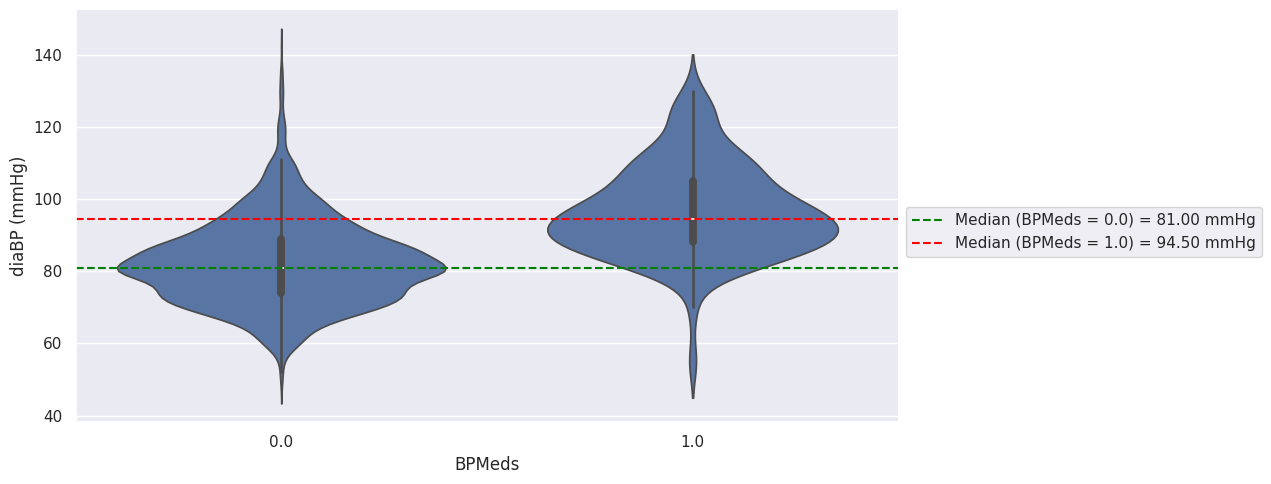

In [ ]:
for var in ['sysBP', 'diaBP']:
  catplot_with_median(dataset = df, variable = var, legend = 'BPMeds', median = True, unit = 'mmHg', kind_ = 'violin')

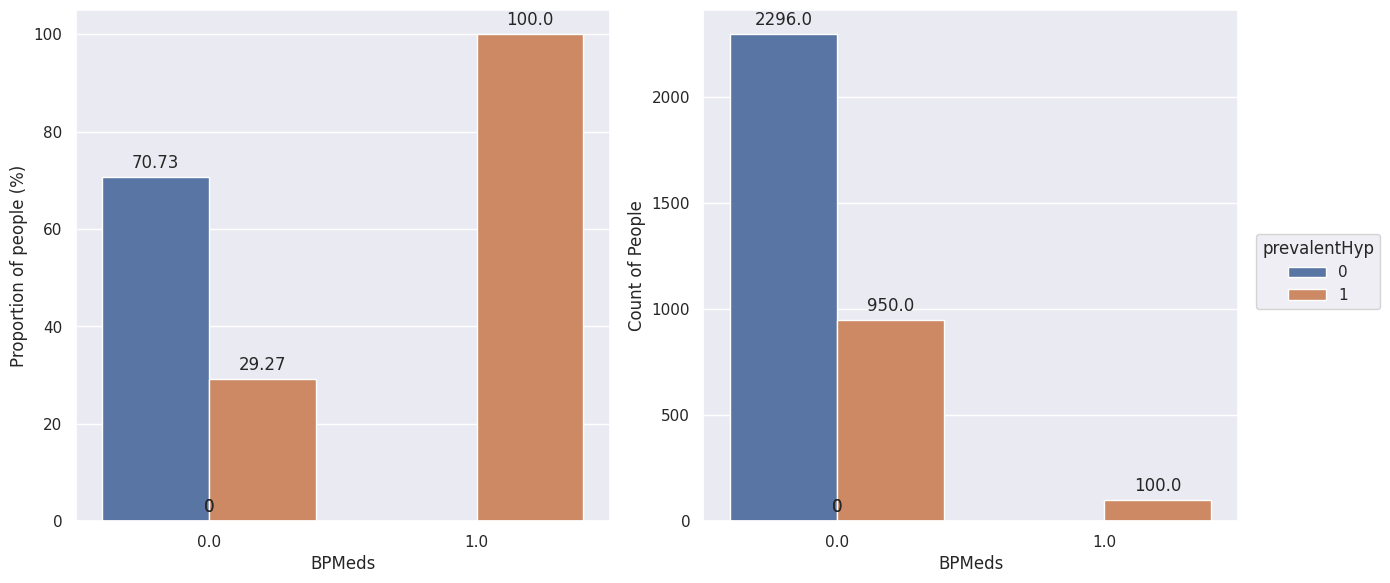

In [ ]:
# Comparing number of people who take BP Medications and have history of Hypertension
bivariate_discrete_plot(dataset = df, variable = 'BPMeds', legend = 'prevalentHyp', size = (14, 6))

*   It can be observed that those taking BP Medications have significantly higher Blood Pressure values (median of 166.5/94.5 mmHg) while those not taking medications have a significantly lower BP (median of 128/81 mmHg). This is a logical observation, since [according to MedlinePlus (US National Library of Medicine)](https://medlineplus.gov/ency/article/007484.htm#:~:text=If%20your%20blood%20pressure%20remains,to%20treat%20high%20blood%20pressure.), BP Medications are recommended when the levels are over 130/80 mmHg
*   Also, **all of the people taking BP Medications have had a history of Hypertension. Hypertension is a direct factor for high risk of CVD**
*   Since dosage of the BP Medications are not provided as an information, it could also be the reason that the dosage for these high BP patients are not updated or are not sufficient, hence contributing to higher risk of CVD. This is something that could be analysed too. Thus, BP Meds don't directly contribute to higher risk of CVD, but rather the observation is only a side-effect of what other features are contributing to higher CVD risk

**The Second hypotheses** is that, since age is a signifcant factor to an increase in Blood Pressure levels, BP Medications are consumed generally by older people, who also have a higher risk of CVD

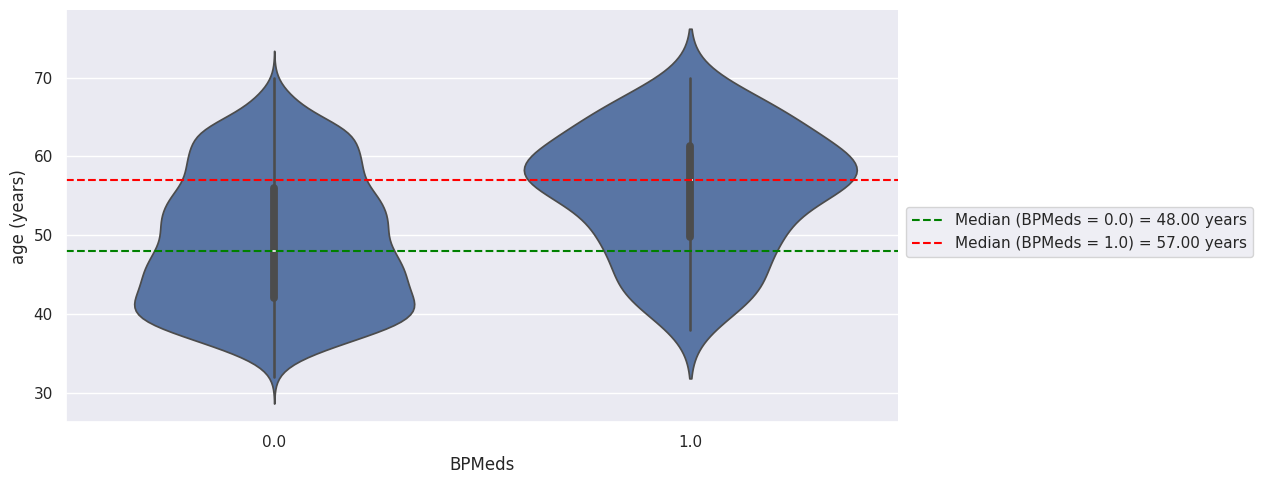

In [ ]:
catplot_with_median(dataset = df, variable = 'age', legend = 'BPMeds', median = True, unit = 'years')

As the hypothesis correctly states, a large number of people who take BP Medications are significantly older than those who do not take them. The Median of the former is about 57 years while for the latter it is about 48 years. This could be another reason for the [anomalous representation](#scrollTo=MMklEYEXf1Ms&line=2&uniqifier=1) of the relation between BPMeds and Ten Year risk of CHD

#### Chart - 7 - Analysing the Education variable

Before venturing into data pre-processing and handling missing values, it is worth observing the Education variable in this dataset

[As can be seen here](#scrollTo=R4YgtaqtYklH&line=3&uniqifier=1), the education variable contains 4 unique values - 1, 2, 3, and 4. Since no additional information is provided, it is assumed that these values represent a hierarchical educational qualification of the patient.

There has been speculation that the level of Education is related to a risk of Cardiovascular disease, as it is linked to a person's health and social determinants. [According to this study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5620039/#:~:text=Participants%20with%20a%20university%20degree,with%20primary%20or%20lower%20education.), a more educated person has a less risk of Cardiovascular disease. However, it is to be noted that this relation is through Blood Pressure levels, BMI and diabetes **which are already present in the dataset**. This relation can be seen in the plots below where a lower level of education correlates to a slightly higher BMI and Blood Pressure values

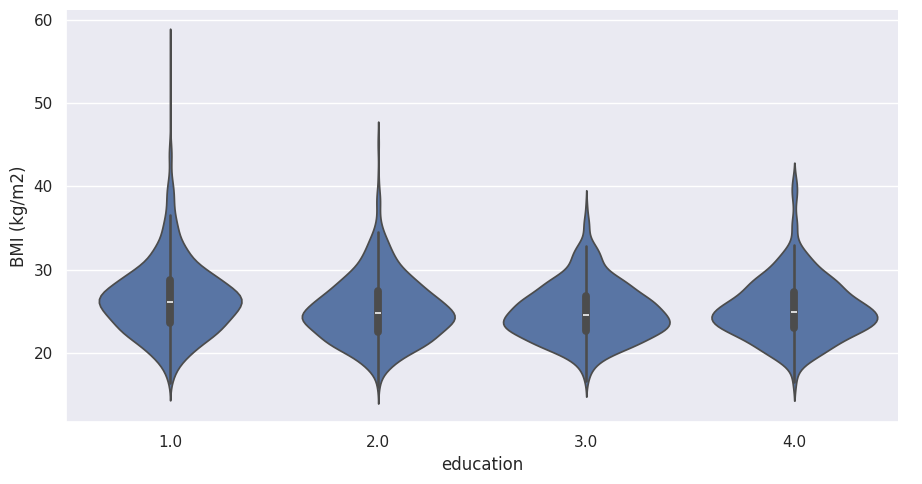

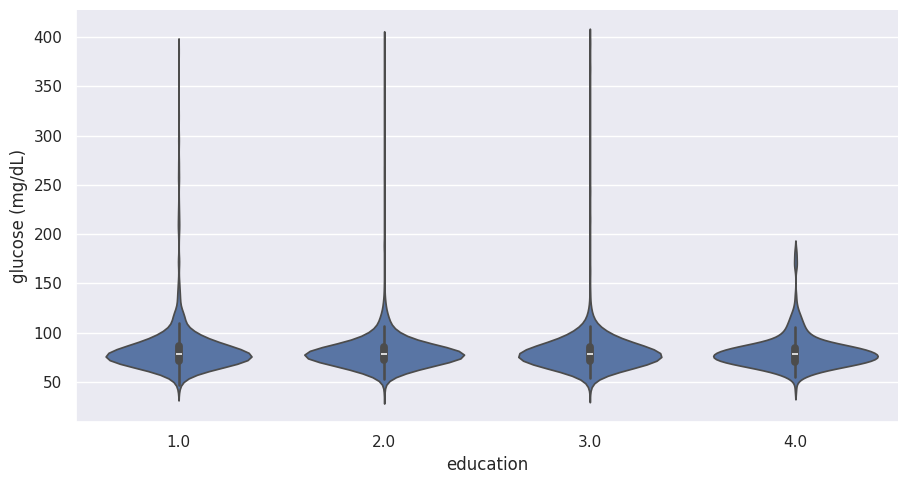

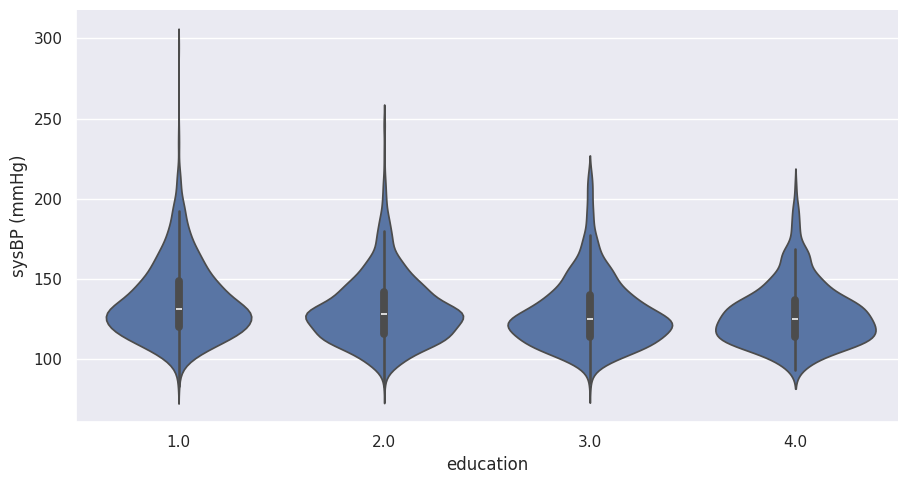

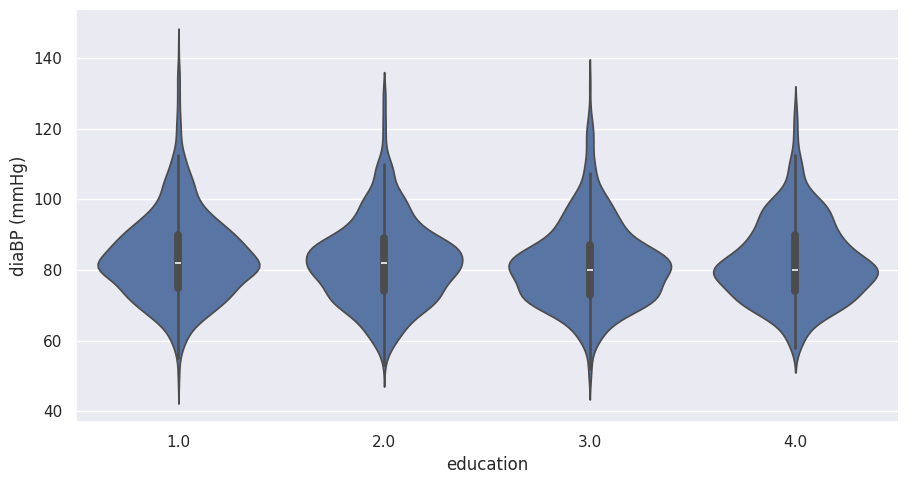

In [ ]:
for var in ['BMI', 'glucose', 'sysBP', 'diaBP']:
  catplot_with_median(dataset = df, variable = var, legend = 'education', unit = cont_var_units[var])

Among the categorical variables, people with lower levels of education again shows higher proportions of diabetes and histories of Hypertension and Stroke.

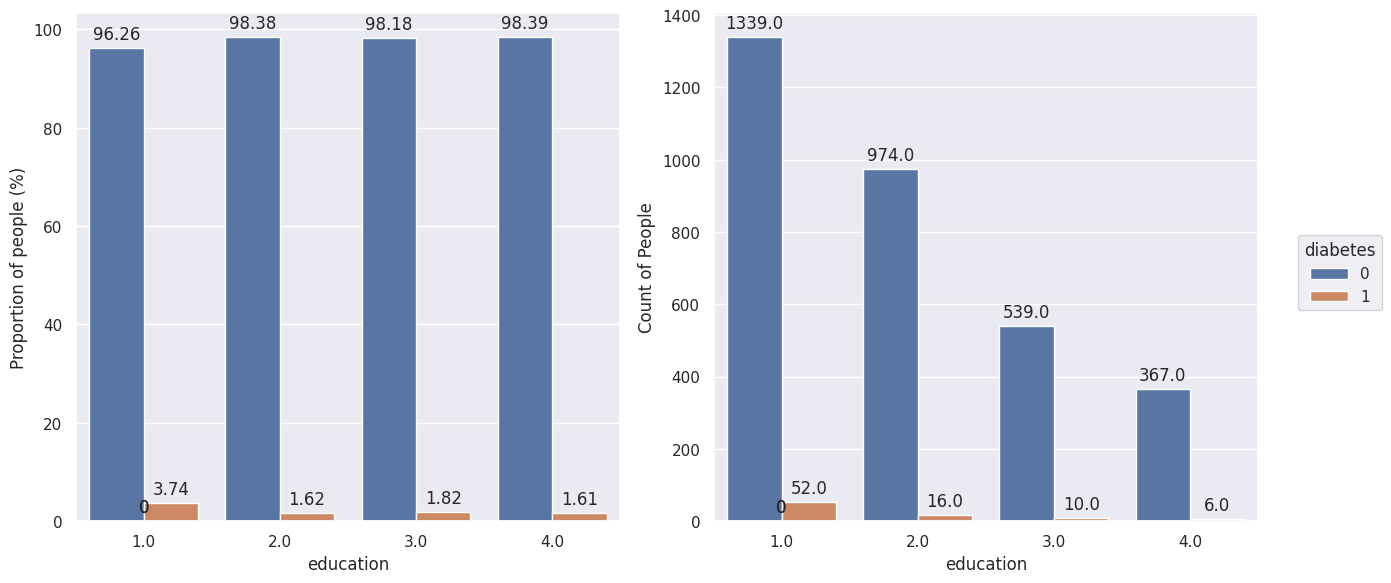

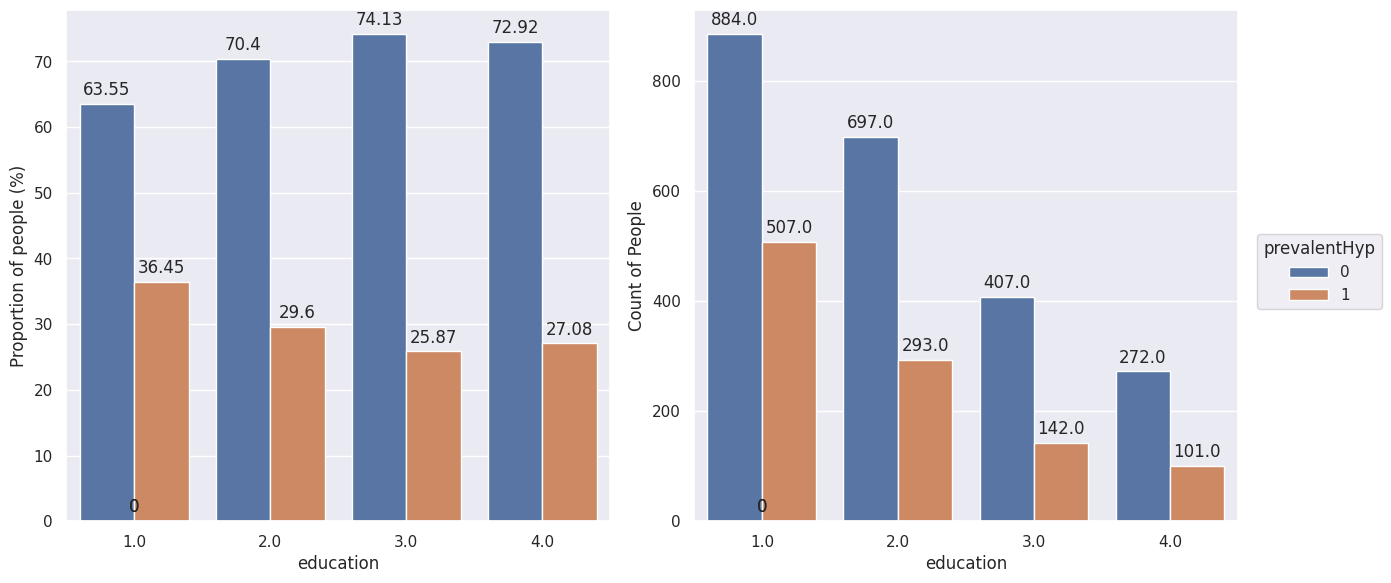

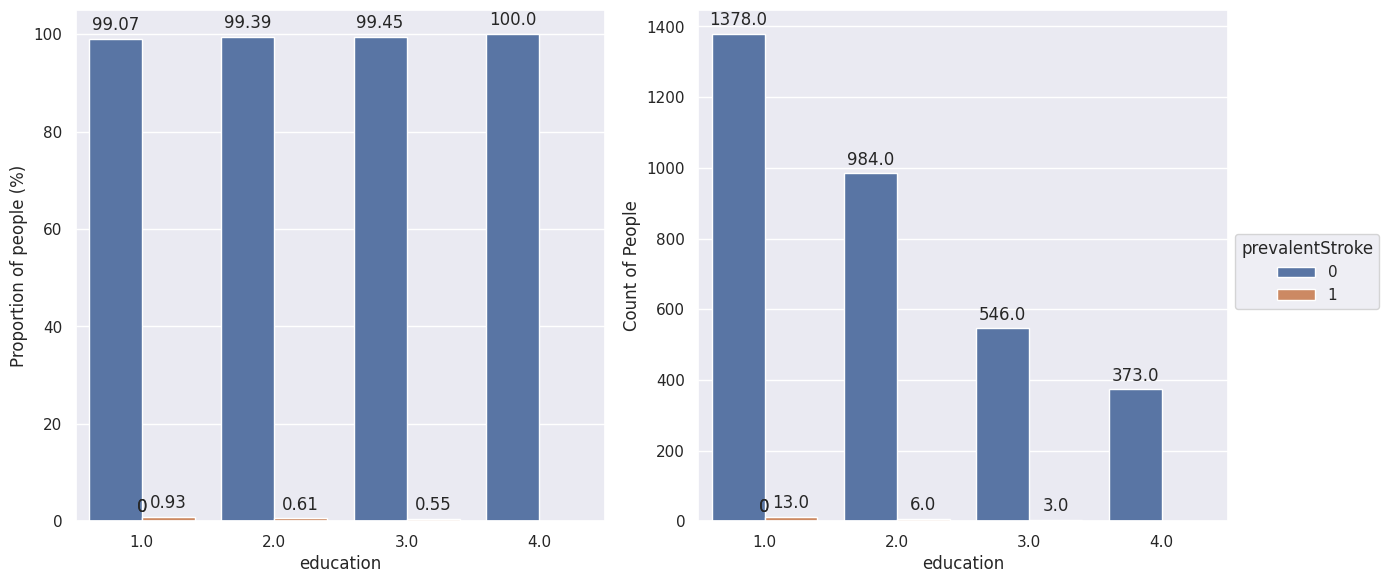

In [ ]:
for var in ['diabetes', 'prevalentHyp', 'prevalentStroke']:
  bivariate_discrete_plot(dataset = df, variable = 'education', legend = var, size = (14, 6))

But in all these cases, the variation is rather less, and in comparison with the variable TenYearCHD, [level of education shows little variation in risk of Cardiovascular disease](#scrollTo=MMklEYEXf1Ms&line=1&uniqifier=1)

*   The effects of above charts can also be seen in the negative correlation of education with Blood Pressure levels, BMI and TenYearCHD
*   The effect of less variance is also seen in the almost negligible correlation between education and TenYearCHD, as seen below

In [ ]:
def colorise(val, threshold, equality = 'greater', font = None, absolute = False):
  '''Function to conditionally format the fonts:
  Inputs - value to compare, threshold value, equality (greater or lesser), font color and absolute (Boolean)'''

  if absolute == True:
    val = abs(val)
  if equality == 'lesser':
    threshold*= -1
    val*= -1
  if val > threshold and val != 1:
    return f'color : {font}; font-weight : bold'

In [ ]:
df[['BMI', 'sysBP', 'diaBP', 'education', 'TenYearCHD']].corr().style.applymap(colorise, threshold = -0.1, equality = 'lesser', font = 'red')

Thus, attributing to the
*   **little to no information provided for the education variable values**
*   **negligible correlation of the education feature with TenYearCHD, and the former's relation to the latter already contained within the BMI and BP levels**

it is concluded to drop this feature from this study to not affect the model accuracy. Further reasons for dropping **Education** variable is found in [Hypothesis Testing section](#scrollTo=3vJSR4Z_I-0T&line=3&uniqifier=1)

#### Chart - 8 - Correlation Heatmap

In [ ]:
# Define the colorise function
def colorise(value, threshold=0.6, equality='greater', absolute=True, font='red'):
    if absolute:
        value = abs(value)
    if (equality == 'greater' and value > threshold) or (equality == 'less' and value < threshold):
        return f'color: {font}'
    else:
        return ''

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation and apply the styling
styled_corr = numeric_df.corr().style.applymap(
    colorise, threshold=0.6, equality='greater', absolute=True, font='red'
)

# Display the styled correlation
styled_corr


The same correlation dataframe is plot below

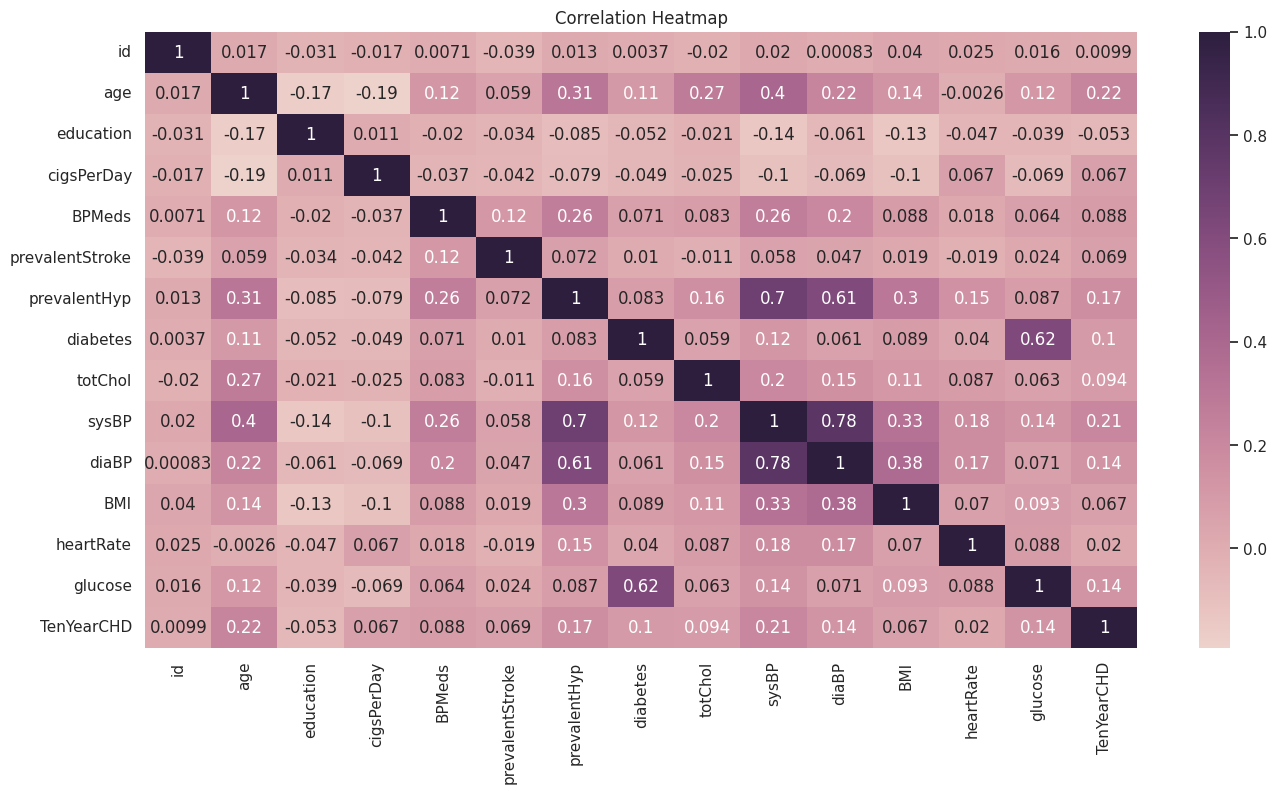

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation Heatmap")
plt.show()


High correlation between a few of the independent variables can be observed in the above plot, like between **sysBP and diaBP**, **prevalentHyp and sysBP**, and **diabetes and glucose**. While tree-based algorithms generally is not affected much by multicollinearity, the dimension of the problem can indeed be reduced by feature engineering. Also, some algorithms like Logistic Regression and Gradient Descent based tree algorithms (like XGBoost) are affected by multicollinearity. This will be addressed in the upcoming sections.

## **4. Hypothesis Testing**

### Hypothetical Statement - 1

#### 1. Stating our research hypothesis as null hypothesis and alternate hypothesis.

According to [Centers for DIsease Control and Prevention](https://www.cdc.gov/bloodpressure/facts.htm#:~:text=Nearly%20half%20of%20adults%20in,are%20taking%20medication%20for%20hypertension.), 44% of women have high blood pressure - defined as a Systolic BP higher than 130mmHg or Diastolic BP higher than 90mmHg - while 50% of men have the same. These 2 shall form the basis of the two Hypothesis tests in this section.

The First Hypothesis Test is for:
*   Null Hypothesis 1: 44% of women have high BP
*   Alternate Hypothesis: Proportion of women having high BP is not equal to 44%

The Second Hypothesis Test is for:
*   Null Hypothesis 2: 50% of men have high BP
*   Alternate Hypothesis: Proportion of men having high BP is not equal to 50%

For this, the one-sample proportion test is used. The test is double tailed with significance value of 0.05

#### 2. Performing an appropriate statistical test.

In [ ]:
# Performing the one-sample proportion tests
h_vals = {'F':0.44, 'M':0.50}
c = 1
for sex in h_vals:
  df_h1 = df[df['sex'] == sex]
  n_sex = df_h1.shape[0]
  n_sex_highbp = df_h1[(df_h1['sysBP'] >= 130) | (df_h1['diaBP'] >= 90)].shape[0]
  alpha = 0.05
  stat, p_value = proportions_ztest(count = n_sex_highbp, nobs = n_sex, value = h_vals[sex])
  x = 'Women' if sex == 'F' else 'Men'
  print(f'Hypothesis test {c}:')
  if p_value < alpha:
    print(f'P-value = {p_value} < {alpha}. The Null Hypothesis stands rejected. The true proportion of {x} having high Blood Pressure is greater than {h_vals[sex] * 100}%\n')
  else:
    print(f'P-value = {p_value} > {alpha}. The Null Hypothesis that the true proportion of {x} with high Blood pressure is {h_vals[sex] * 100}% is failed to be rejected')
  c+= 1

Hypothesis test 1:
P-value = 1.0893752912351863e-06 < 0.05. The Null Hypothesis stands rejected. The true proportion of Women having high Blood Pressure is greater than 44.0%

Hypothesis test 2:
P-value = 0.9375685699112782 > 0.05. The Null Hypothesis that the true proportion of Men with high Blood pressure is 50.0% is failed to be rejected


It is to be noted that the Framingham test data is old, and older than the data provided in the link directing to Center for Disease Control, which is updated till the previous year. Hence, one of the tests (specifically, for the female) did not match up to the Null Hypothesis statement

##### Which statistical test have we performed to obtain the P-Value?

The **one-sample proportion test** is utilised for this statistical Hypothesis test. One-sample proportion test is used to determine if a proportion of a single sample differs significantly from a hypothesized value. It is also known as the one-sample z-test for proportions. This test is typically used to test a hypothesis about a population proportion based on a sample proportion.

##### Why did we choose this specific statistical test?

The test assumes that the sample is randomly selected and that the sample size is large enough to meet the conditions for a normal approximation of the sampling distribution, i.e., it is not necessary that the sample or population be normally distributed. The one-sample proportion test is used to test hypotheses about a single proportion or percentage, and it is based on the binomial distribution. Since the hypothesized values were for testing proportions, this particular test was utilised

### Hypothetical Statement - 2

#### 1. Stating our research hypothesis as null hypothesis and alternate hypothesis.

This Hypothesis test will be based on the assumption that the median population will have the optimum values for Blood Pressure - i.e., 130/80 mmHg for the Systolic Blood Pressure and Diastolic Blood Pressure respectively. Thus, the Null Hypotheses will be on a metric which is a consolidation of these two metrics - the [Mean Arterial Pressure](https://www.ncbi.nlm.nih.gov/books/NBK538226/) (a weighted average of sys BP and dia BP).

Thus, the optimal MAP taken for this test is (2*80 + 130)/3 = 96.667

*   Null Hypothesis: Mean MAP of the population is 96.667mmHg
*   Alternative Hypothesis: Mean MAP of the population is not equal to 96.667mmHg

Test summary:
*   The one-sample t-test will be used
*   The test is two-tailed with a significance value of 0.05
*   Since the t-test is used, it is required that the data is normally distributed

#### 2. Performing an appropriate statistical test.

In [ ]:
df_h2 = df[['sysBP', 'diaBP']]
df_h2['MAP'] = (df['sysBP'] + df['diaBP'] * 2)/3
h2_val = 96.667
alpha2 = 0.05

The Shapiro test shall be used to check the normal distribution of the MAP feature with a significance value of 0.05, since normal distribution is a requirement for this test

In [ ]:
print(f"P-value for checking Normal distribution using shapiro test = {shapiro(df_h2['MAP'])[1]}")

P-value for checking Normal distribution using shapiro test = 1.2733978426691158e-30


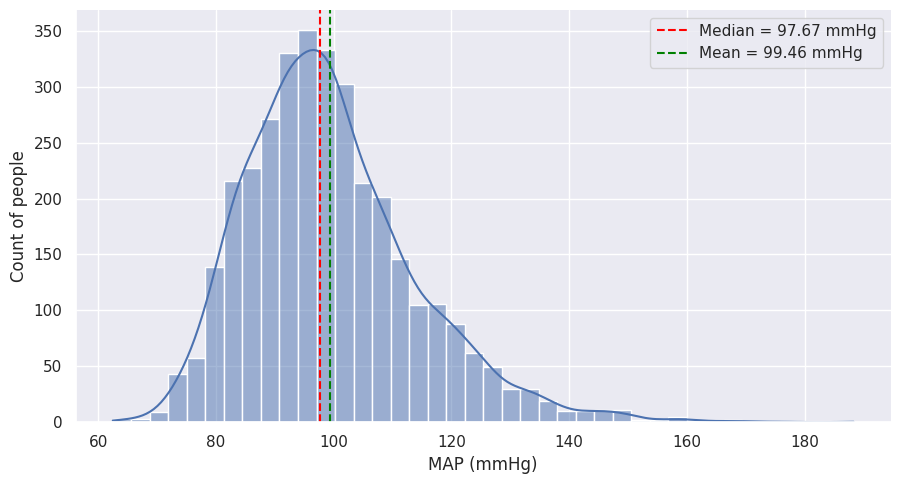

In [ ]:
var = 'MAP'
displot_with_median(df_h2, var, median = True, mean = True, unit = 'mmHg')

Since this p-value is very low, we fail to reject the Null Hypothesis that the data is normally distributed, and the data has to be transformed to make it normally distributed. The inverse transform is used since the data has a left skew

In [ ]:
df_h2['MAP'] = 1/df_h2['MAP']

In [ ]:
print(f"p value for checking Normal distribution using shapiro test = {shapiro(df_h2['MAP'])[1]}")

p value for checking Normal distribution using shapiro test = 0.30450578459642336


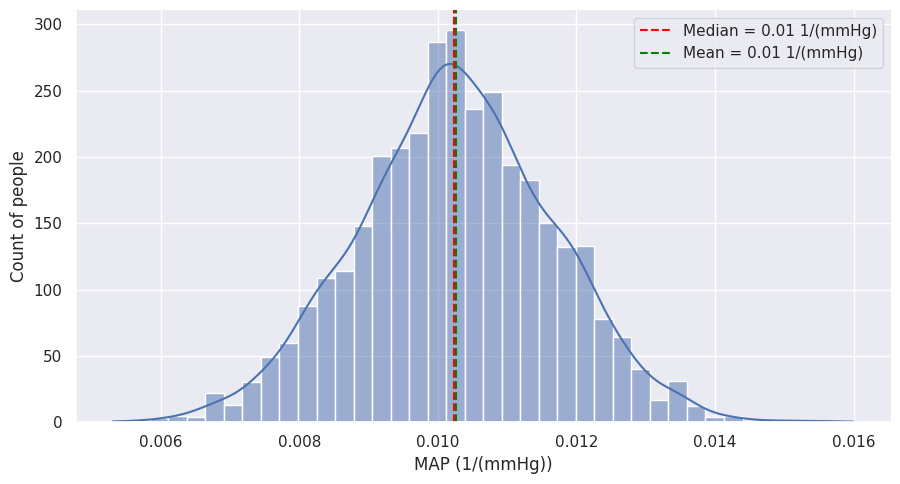

In [ ]:
var = 'MAP'
displot_with_median(df_h2, var, median = True, mean = True, unit = '1/(mmHg)')

Now that the data is normally distributed, with a p-value from the shapiro test greater than a required significance value, the requirement for the t-test is fulfilled. The Null Hypothesis value of MAP also has to be applied this inverse transformation to maintain consistency. The t-test is applied in the below code

In [ ]:
p_value_h2 = ttest_1samp(a = df_h2['MAP'], popmean = 1/h2_val)[1]
if p_value_h2 < alpha2:
  print(f'P-value = {p_value_h2} < {alpha2}. The Null Hypothesis stands rejected. The true mean of Mean Arterial Pressure is not equal to the optimum {h2_val}mmHg')
else:
  print(f'P-value = {p_value_h2} > {alpha2}. The Null Hypothesis that the true mean of Mean Arterial Pressure is equal to {h2_val}mmHg is failed to be rejected')

P-value = 0.0003152845295260528 < 0.05. The Null Hypothesis stands rejected. The true mean of Mean Arterial Pressure is not equal to the optimum 96.667mmHg


##### Which statistical test have we performed to obtain the P-Values?

Two statistical tests were applied in this Hypothesis test:
*   **Shapiro test** to check whether the MAP values are normally distributed
*   **One-sample t-test** to check whether the true mean of the MAP was indeed equal to the Hypothesised value

##### Why did we choose the specific statistical test?

The one-sample t-test is used here for the following reasons:
*  The goal was to check the hypothesis statement about the true mean of a metric
*  The Population variance of the same metric (MAP) was not known

In such a case, the t-test is usually relied on.

Also, it is necessary that the data be normally distributed in order to apply a t-test on it. Hence, the Shapiro test was utilised to check whether the data is normally distributed, and if not, to apply the relevant transformations to make it normally distributed for the one-sample t-test

### Hypothetical Statement - 3

#### 1. Stating our research hypothesis as null hypothesis and alternate hypothesis.

The final Hypothesis statement is to check the dependency of the categorical variables with the dependent variable which is to be predicted (TenYearCHD). The Null and Alternative hypothesis are hence as follows:
*   Null Hypothesis: (Each) categorical variable in the dataset is not dependent on the TenYearCHD variable
*   Alternative Hypothesis: The categorical variables in the dataset are dependent on TenYearCHD

The two-sample chi-squared test will be used for this Hypothesis test with a significance value of 0.01

#### 2. Performing an appropriate statistical test.

In [ ]:
df_h3 = df[categ_vars].dropna()
alpha3 = 0.01

In [ ]:
# Converting 'sex' and 'is_smoking' columns to int for the Hypothesis tests
df_h3['sex'] = df_h3['sex'].map({'M':1, 'F':0})
df_h3['is_smoking'] = df_h3['is_smoking'].map({'YES':1, 'NO':0})

In [ ]:
# Performing the chi2 test of each categorical variable with 'TenYearCHD'
p_vals = chi2(df_h3, df.loc[df_h3.index, 'TenYearCHD'])[1]

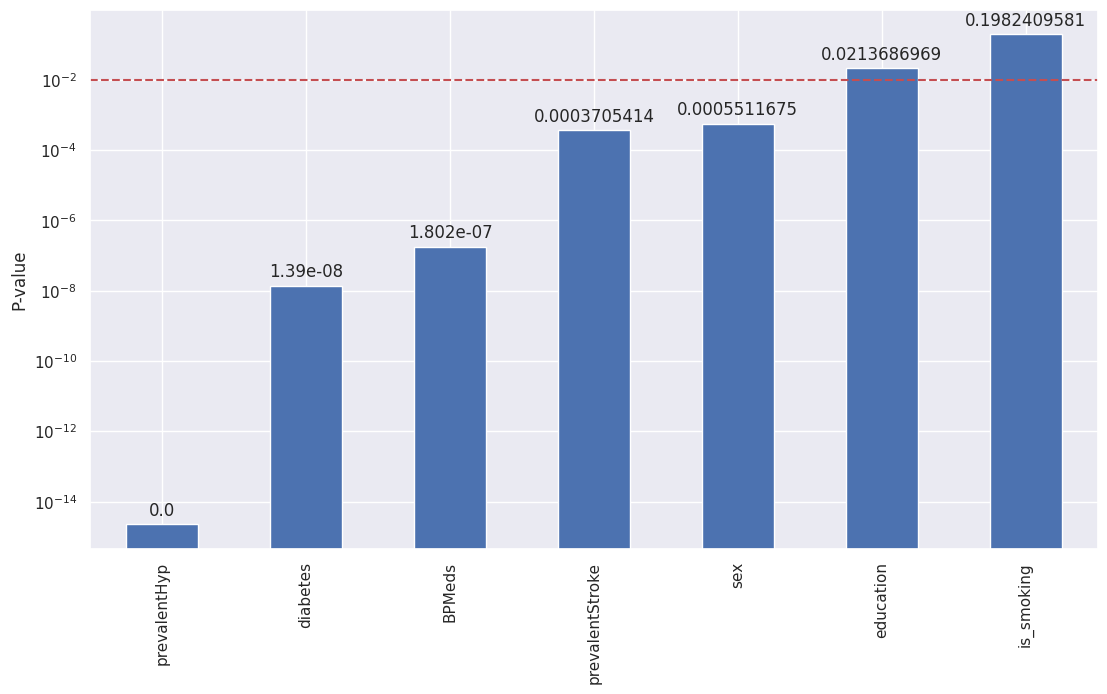

In [ ]:
# Plotting the p_values for each categorical variable
categ_score_df = pd.DataFrame(p_vals, categ_vars).sort_values(0)
ax = categ_score_df.plot(kind = 'bar', figsize = (13, 7))
ax.legend_.remove()
ax.set(yscale = 'log', ylabel = 'P-value')
plt.axhline(alpha3, color = 'r', linestyle = '--')
display_vals(ax, 10)
plt.show()

In [ ]:
for row, index in categ_score_df.iterrows():
  p_value = index.values[0]
  if p_value > alpha3:
    print(f"For {row} variable, P-value = {p_value} > {alpha3}. The Null Hypothesis is failed to be rejected\n")
  else:
    print(f"For {row} variable, P-value = {p_value} < {alpha3}. The Null Hypothesis is rejected\n")

For prevalentHyp variable, P-value = 2.269535671617059e-15 < 0.01. The Null Hypothesis is rejected

For diabetes variable, P-value = 1.385222935121762e-08 < 0.01. The Null Hypothesis is rejected

For BPMeds variable, P-value = 1.8018548283688946e-07 < 0.01. The Null Hypothesis is rejected

For prevalentStroke variable, P-value = 0.0003705414422451561 < 0.01. The Null Hypothesis is rejected

For sex variable, P-value = 0.000551167492518658 < 0.01. The Null Hypothesis is rejected

For education variable, P-value = 0.02136869691789055 > 0.01. The Null Hypothesis is failed to be rejected

For is_smoking variable, P-value = 0.19824095808668835 > 0.01. The Null Hypothesis is failed to be rejected



From the above observations, the following can be concluded
*   The lowest P-value obtained is for **prevalentHyp** signifying that among the categorical variables, it is the variable which has highest dependency with TenYearCHD
*   **Education** and **is_smoking** variables have a higher P-value than the significane value chosen for this test, signifying very less dependency with TenYearCHD
  *   In the case of **Education**, it is only adding to the [already established conclusions](#scrollTo=rVKIopwRneLW&line=5&uniqifier=1) regarding the low dependancy with TenYearCHD


##### Which statistical test have we performed to obtain the P-Values?

The chi-squared statistical test has been used in this Hypothesis test to obtain the P-values. This test statistic measures the dependency between two categorical variables, and higher statistical value indicate stronger dependency. The p-value measures the statistical significance of the observed dependency, and lower p-values indicate stronger evidence against the null hypothesis of no dependency between the variables.

##### Why did we choose this specific statistical test?

*   The **two-sample chi-squared test** was used because it is the standard method for testing dependency between two categorical variables. In this case, the variable to be predicted is also a categorical variable
*   If the comparison to be done is between a categorical variable and a continuous variable, the **t-test** or **ANOVA test** is implemented, based on whether the number of classes in the categorical variable is two or greater than two. **But in these tests, it is not the dependency which is checked but the difference of means, while the chi-squared test gives a direct indication of the dependencies**

The image below ([source](https://towardsdatascience.com/how-to-know-which-statistical-test-to-use-for-hypothesis-testing-744c91685a5d)) explains in short which test is to be adopted based on the type of two variables to be compared.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*rkKzNjRXo6lpuhksnqC5wg.png" style = "float: center;">

## **5. Feature Engineering & Data Pre-processing**

In [ ]:
# Creating a copy of the data
data = df.copy()

### 1. Handling Missing Values

There is a total of 510 missing values in the dataset. They are distributed among the variables as follows



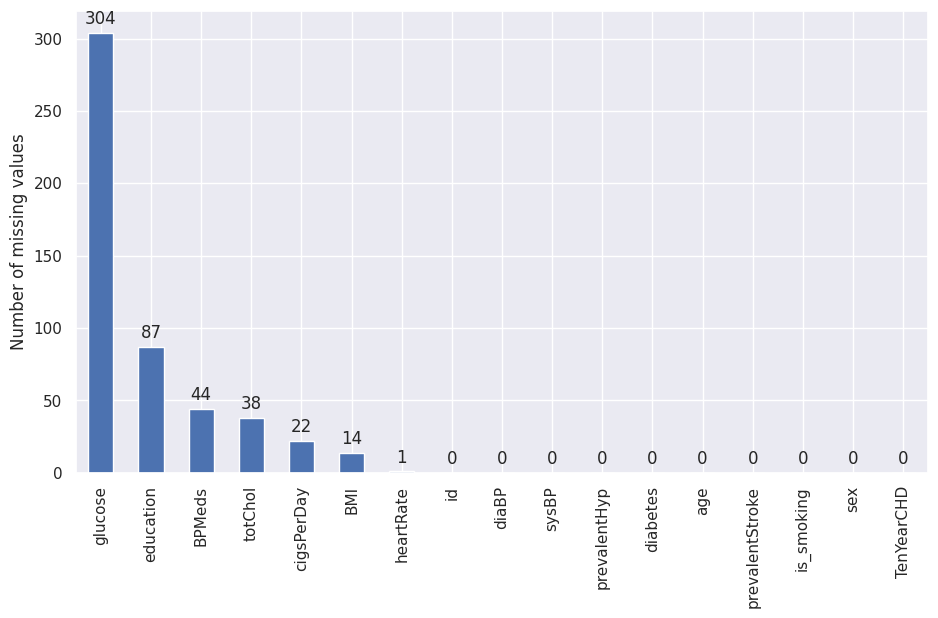

In [ ]:
print(f'There is a total of {df.isna().sum().sum()} missing values in the dataset. They are distributed among the variables as follows\n')

# Visualising the number of missing values in each variable
plt.figure(figsize = (11, 6))
ax = data.isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

*   Handling of missing values has to be done judiciously, since this is a prediction of an intricate case of Cardiovascular disease. Improper imputation of these missing values can lead to bias in the model which may lead to faulty predictions.





#### 1.1 Categorical variables

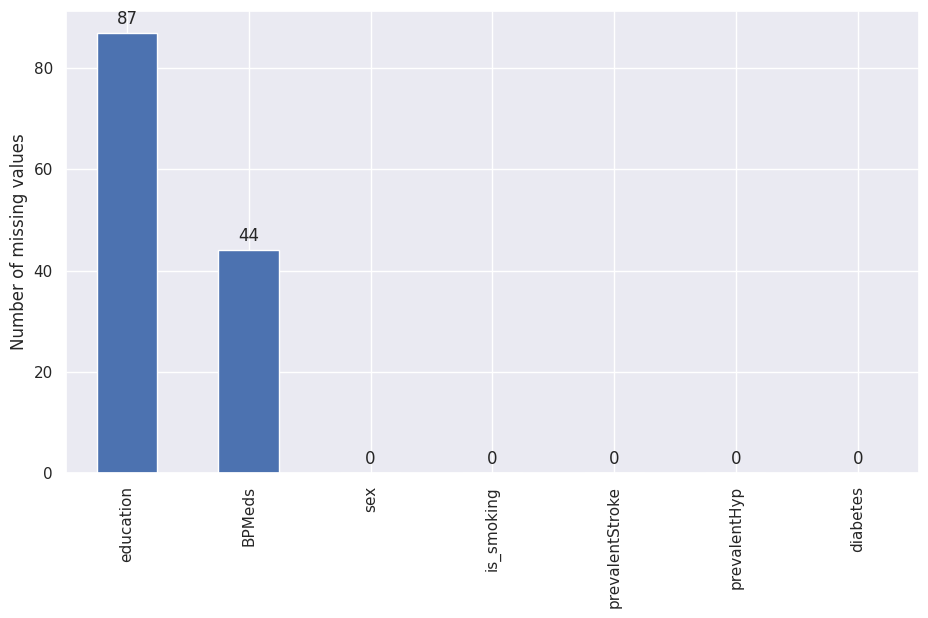

In [ ]:
plt.figure(figsize = (11, 6))
ax = data[categ_vars].isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

Among the categorical variables, the **education** variable has been concluded to be dropped from the dataset. So, only **BPMeds** among the categorical variables contain missing values.

In [ ]:
categ_vars.remove('education')

In [ ]:
# Collecting the indices of rows where BPMeds is missing
bpmeds_missing = data[data['BPMeds'].isna()].index

[According to this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2560868/#:~:text=For%20most%20people%2C%20blood%20pressure%20readings%20should%20be,80%20mmHg%20when%20measured%20in%20the%20doctor%E2%80%99s%20office.) from the National Library of Medicine, BP medications are recommended by doctors to the following patients:
*   Having systolic and diastolic Blood Pressure levels above 140/90 mmHg
*   For those having diabetes or kidney diseases, having Blood pressure levels above 130/80 mmHg

Hence, the missing values in BPMeds, which are not large in number (1.2% of dataset), are filled with the above rules

In [ ]:
# Filling the BPMeds missing values as according to above
for indx in bpmeds_missing:
  # For diabetic patients
  if data.loc[indx, 'diabetes'] == 1 and (data.loc[indx, 'sysBP'] > 130 or data.loc[indx, 'diaBP'] > 80):
    data.loc[indx, 'BPMeds'] = 1

  # For non-diabetic patients
  elif data.loc[indx, 'diabetes'] == 0 and (data.loc[indx, 'sysBP'] > 140 or data.loc[indx, 'diaBP'] > 90):
    data.loc[indx, 'BPMeds'] = 1

  # For rest of the patients
  else:
    data.loc[indx, 'BPMeds'] = 0

In [ ]:
data[categ_vars].isna().sum()

sex                0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

All missing values from categorical variables have been removed

#### 1.2 Continuous variables

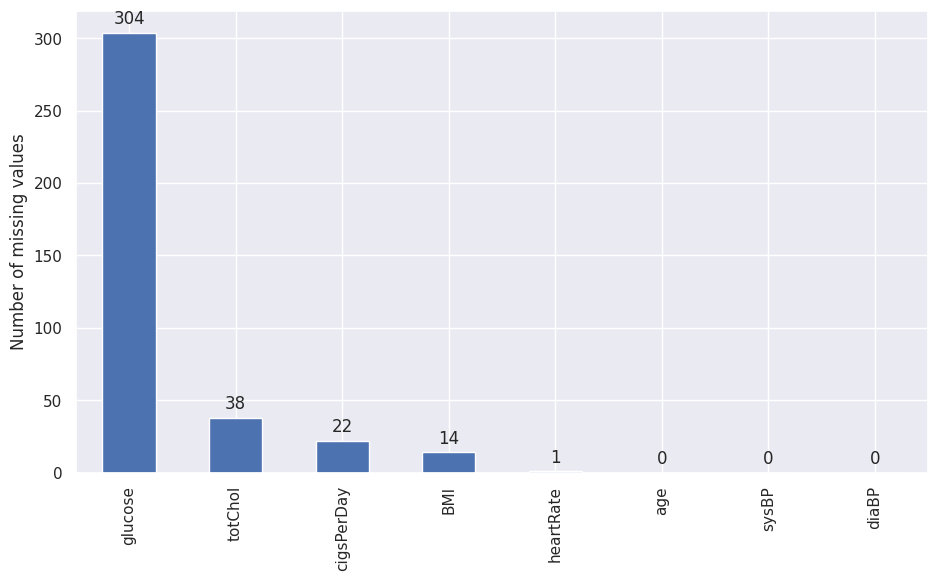

In [ ]:
plt.figure(figsize = (11, 6))
ax = data[cont_vars].isna().sum().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Number of missing values')
display_vals(ax)

For continuous variabes, **cigsPerDay** will be dealt with separately before handling the other variables

##### 1.2.1 cigsPerDay

Let us take a brief look at the relation between **cigsPerDay** and **is_smoking** (current smoker or not)

In [ ]:
# Checking unique values for cigsPerDay when is_smoking = "NO"
data[data['is_smoking'] == 'NO']['cigsPerDay'].value_counts()

cigsPerDay
0.0    1703
Name: count, dtype: int64

In [ ]:
# Checking unique values for cigsPerDay when is_smoking = "YES"
data[data['is_smoking'] == 'YES']['cigsPerDay'].value_counts().sort_index().head(3)

cigsPerDay
1.0    48
2.0    17
3.0    79
Name: count, dtype: int64

In [ ]:
# Checking values for is_smoking wherever cigsPerDay has a missing value
data[data['cigsPerDay'].isna()]['is_smoking'].value_counts()

is_smoking
YES    22
Name: count, dtype: int64

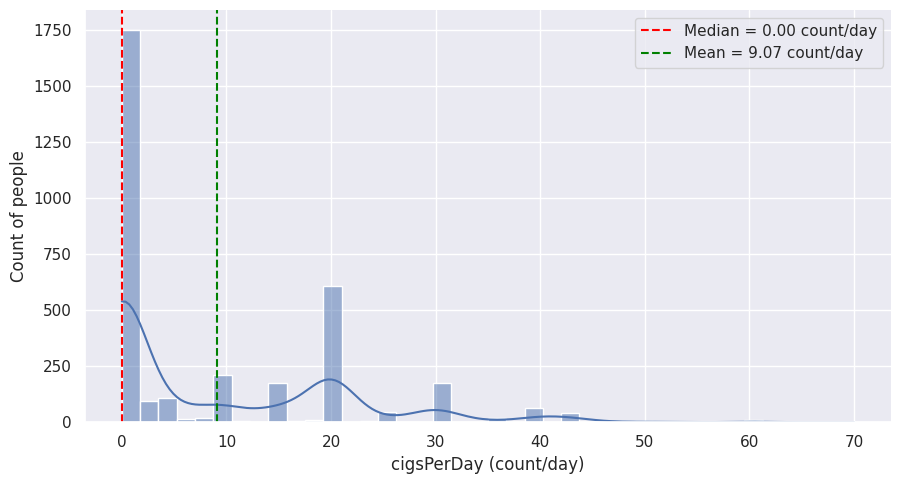

In [ ]:
# Checking the distribution
var = 'cigsPerDay'
displot_with_median(data, var, median = True, mean = True, unit = cont_var_units[var])

*   As can be observed, wherever **is_smoking = 'NO'**, the value of **cigsPerDay** is always **0**. **cigsPerDay** is never zero when **is_smoking = 'YES'**. Hence, a one-to-one mapped relationship exists between **is_smoking = 'NO'** and **cigsPerDay = 0**.
*   All the people where **cigsPerDay** has a missing value are current smokers (i.e., **is_smoking == 'YES'**)
*   Also, the distribution of **cigsPerDay** is extremely left skewed with a median of 0, indicating highest amount of non-smokers in the dataset

From the above observations, it would not make sense to impute the missing values for **cigsPerDay** with the median of the entire dataset. **Instead, median/mean of only the current smokers is more appropriate**

[Text(0, 0.5, 'cigsPerDay'), Text(0.5, 0, 'count/day')]

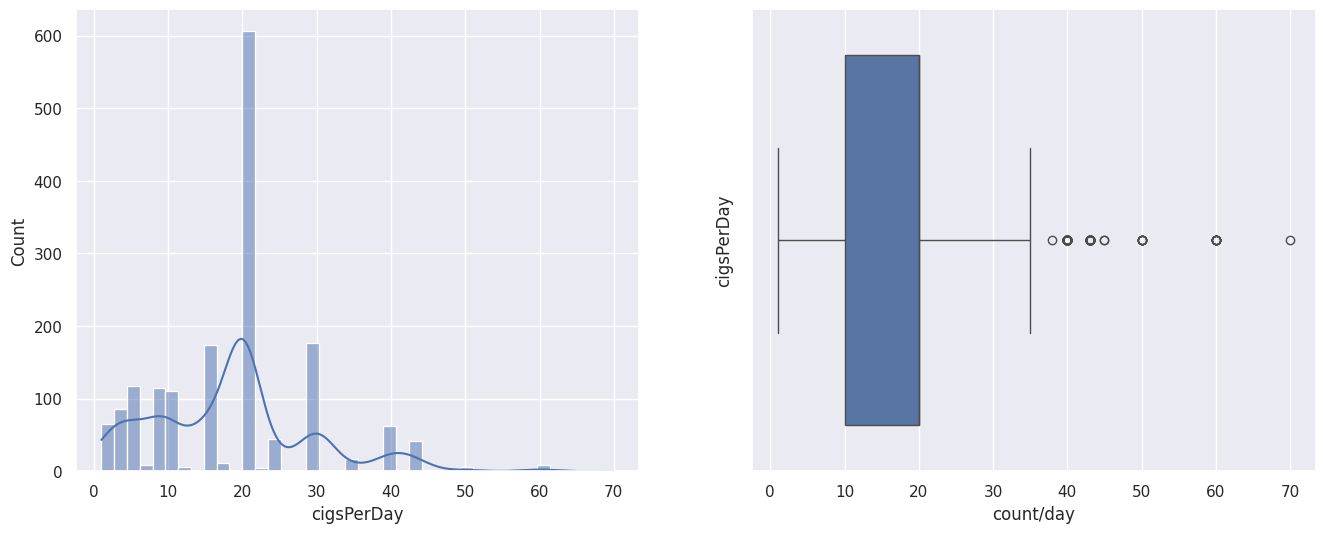

In [ ]:
# Checking distribution and outliers for only smokers
var = 'cigsPerDay'
fig, axx = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
sns.histplot(data[data['is_smoking'] == 'YES'][var], bins = 40, kde = True, ax = axx[0])
sns.boxplot(data[data['is_smoking'] == 'YES'], x = var, orient = 'h', ax = axx[1])
axx[1].set(ylabel = var, xlabel = cont_var_units[var])

**Since cigsPerDay contains outliers even among the smokers in the dataset, the median is chosen for imputation**

In [ ]:
# Imputing with median of current smokers
imputing_median1 = data[data['is_smoking'] == 'YES']['cigsPerDay'].median()
data['cigsPerDay'] = data['cigsPerDay'].fillna(imputing_median1)

In [ ]:
# Checking if any missing values are still present
data['cigsPerDay'].isna().sum()

0

##### 1.2.2 glucose, totChol, BMI and heartRate

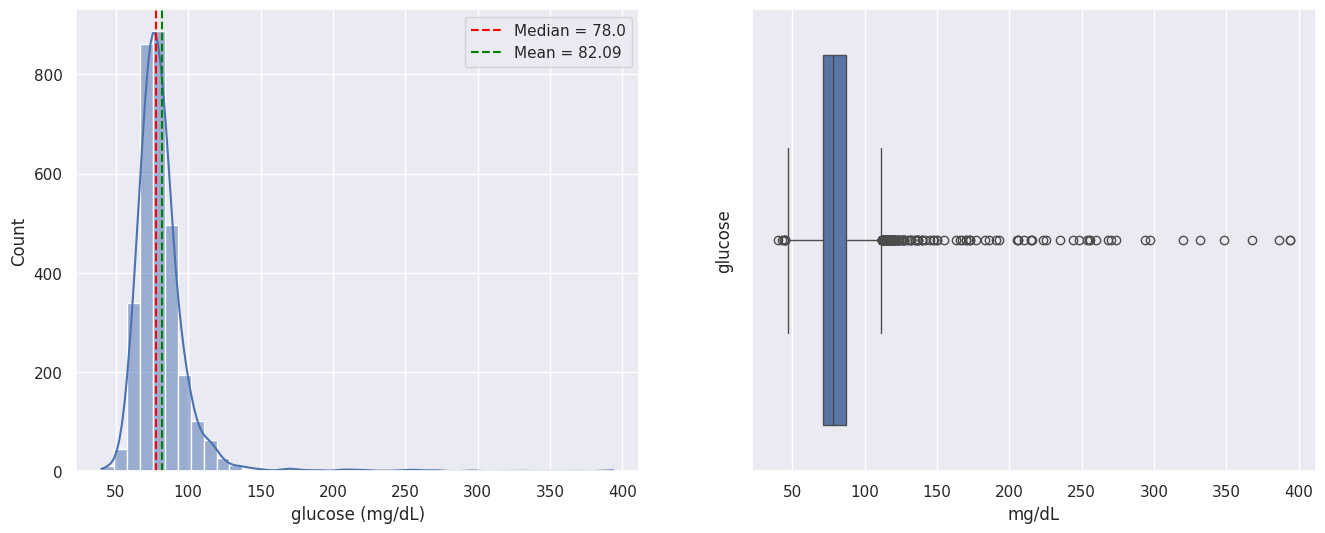

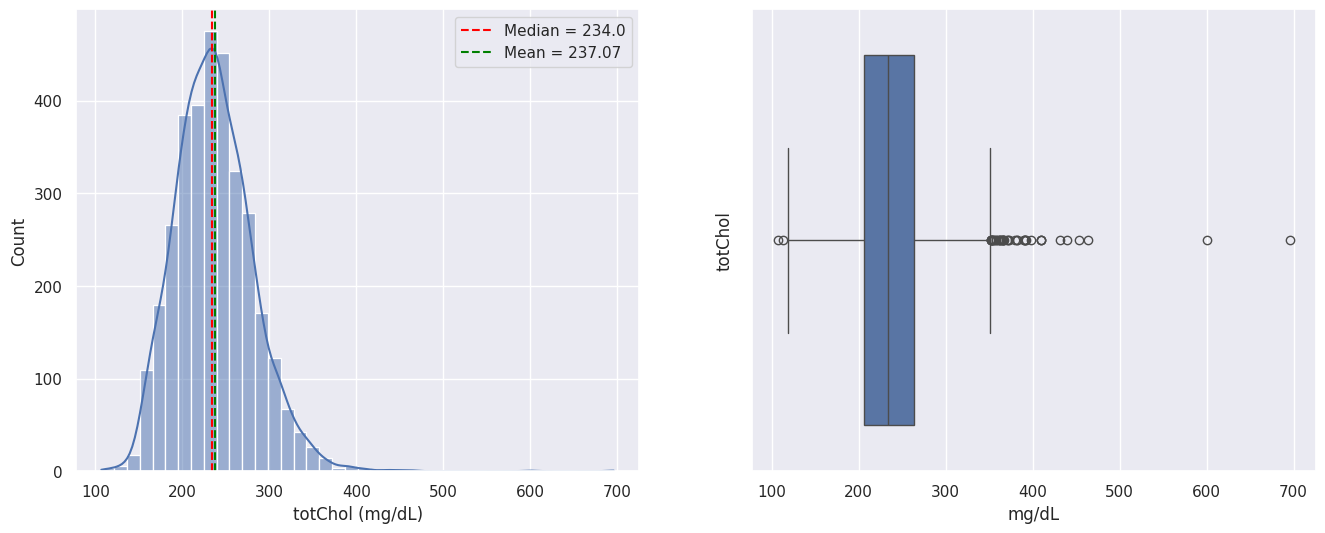

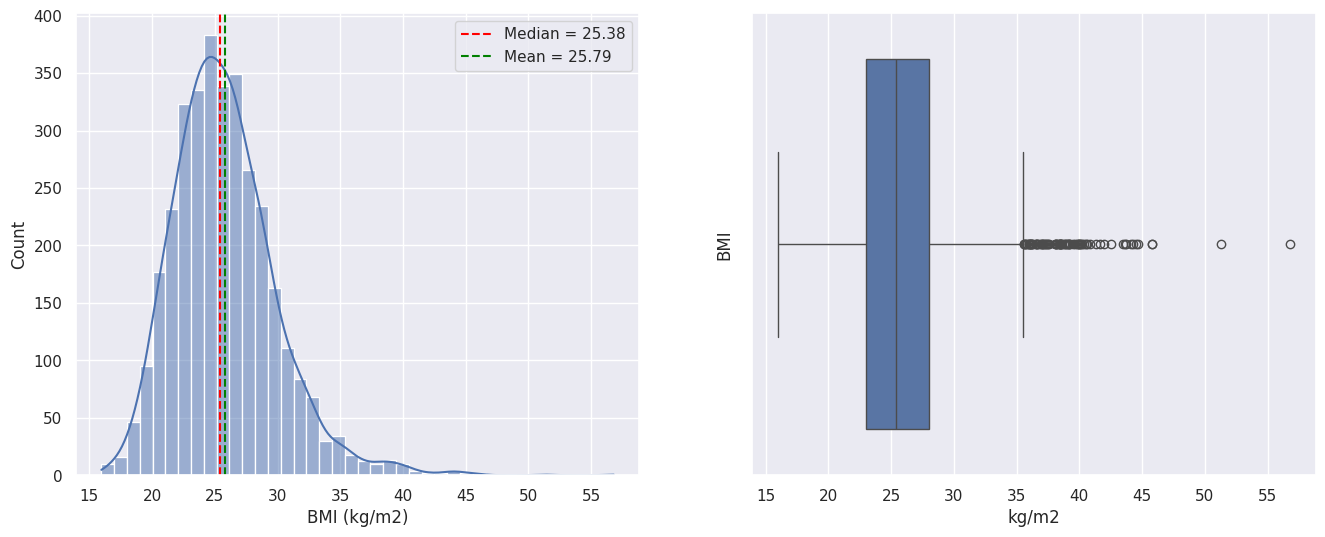

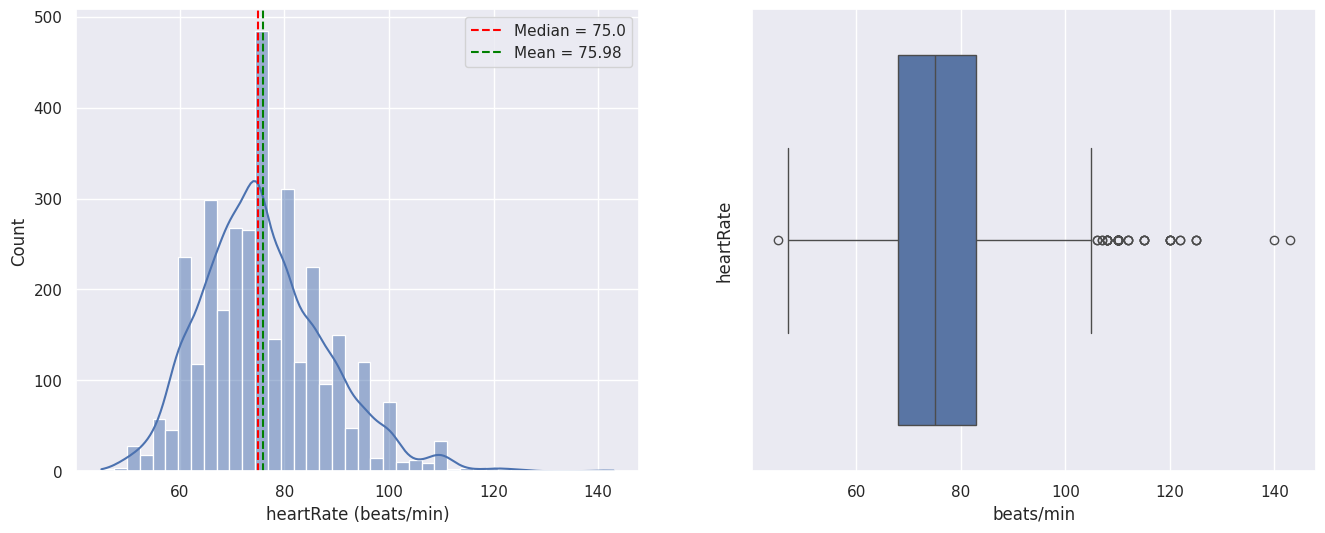

In [ ]:
# Checking distribution and outliers
for var in ['glucose', 'totChol', 'BMI', 'heartRate']:
  fig, axx = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
  sns.histplot(data[var], bins = 40, kde = True, ax = axx[0])
  axx[0].axvline(df[var].median(), color = 'red', linestyle = '--', label = f'Median = {round(df[var].median(), 2)}')
  axx[0].axvline(df[var].mean(), color = 'green', linestyle = '--', label = f'Mean = {round(df[var].mean(), 2)}')
  axx[0].set(xlabel = var + f' ({cont_var_units[var]})')
  axx[0].legend()
  sns.boxplot(data, x = var, orient = 'h', ax = axx[1])
  axx[1].set(ylabel = var, xlabel = cont_var_units[var])

As observed from above,
*   The mean of each variable is slightly higher than the median indicating a left skew of varying degrees.
*   Each variable contains outliers even outside of twice the interquartile range.

For these reasons, missing values in each variable is imputed with the median of the respective variable



In [ ]:
# Imputing the missing values with the median for each variable
for var in ['glucose', 'totChol', 'BMI', 'heartRate']:
  imputing_median = data[var].median()
  data[var]  = data[var].fillna(imputing_median)

In [ ]:
# Checking for any missing values in the dataset
data.isna().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

All missing values have been removed except education which is going to be dropped

##### 1.2.3 Checking mean, median and distribution of continuous variables after imputing missing values

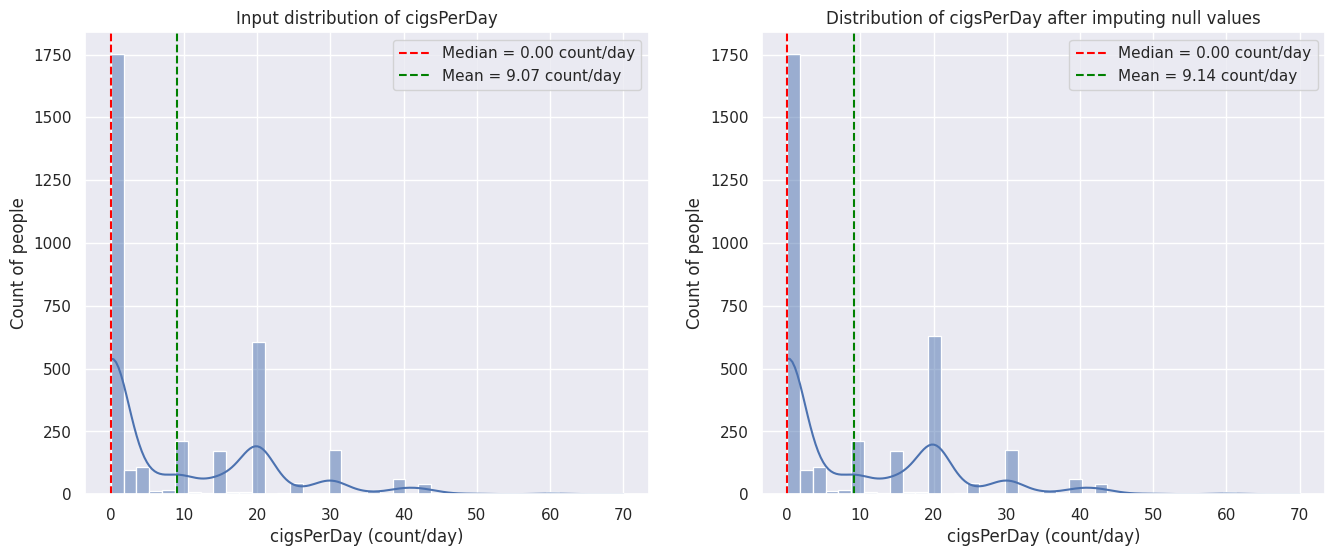

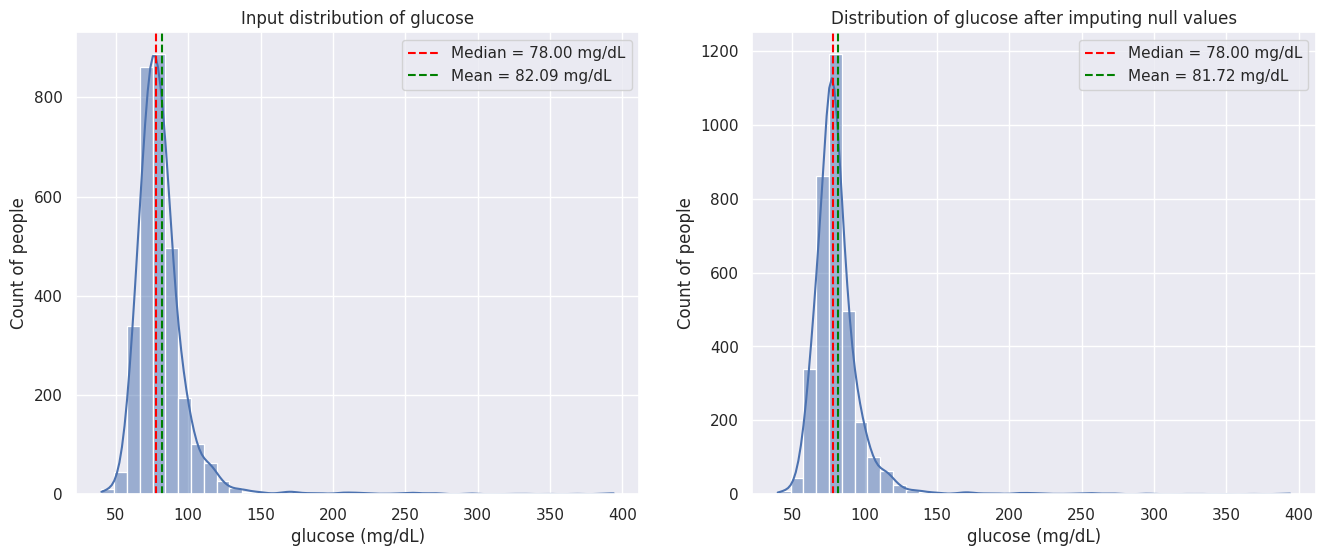

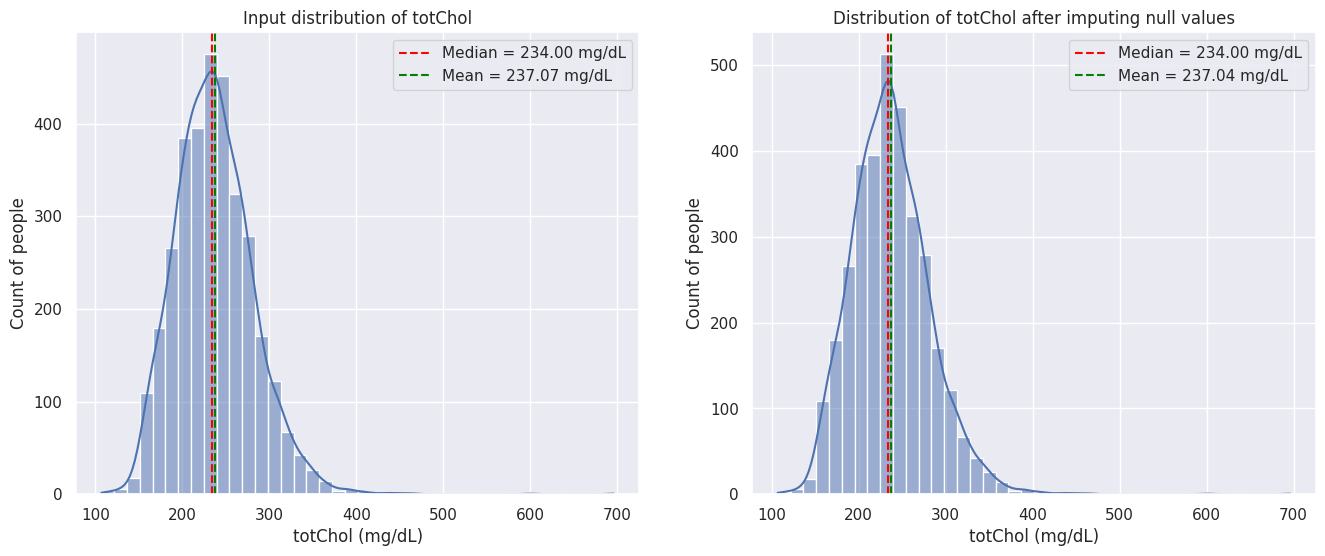

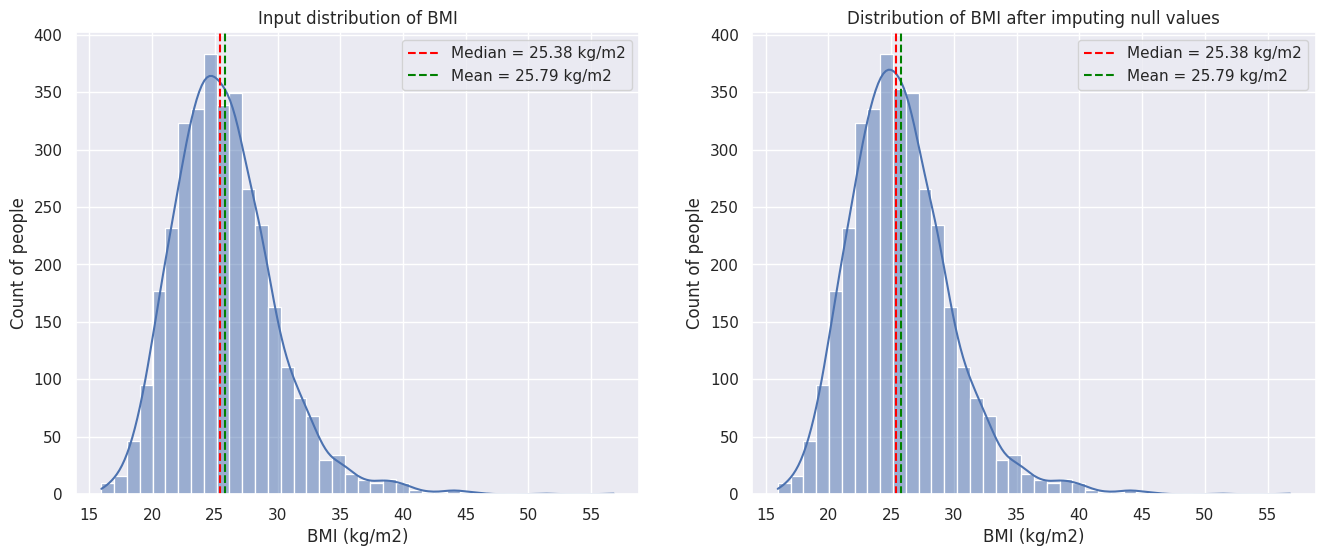

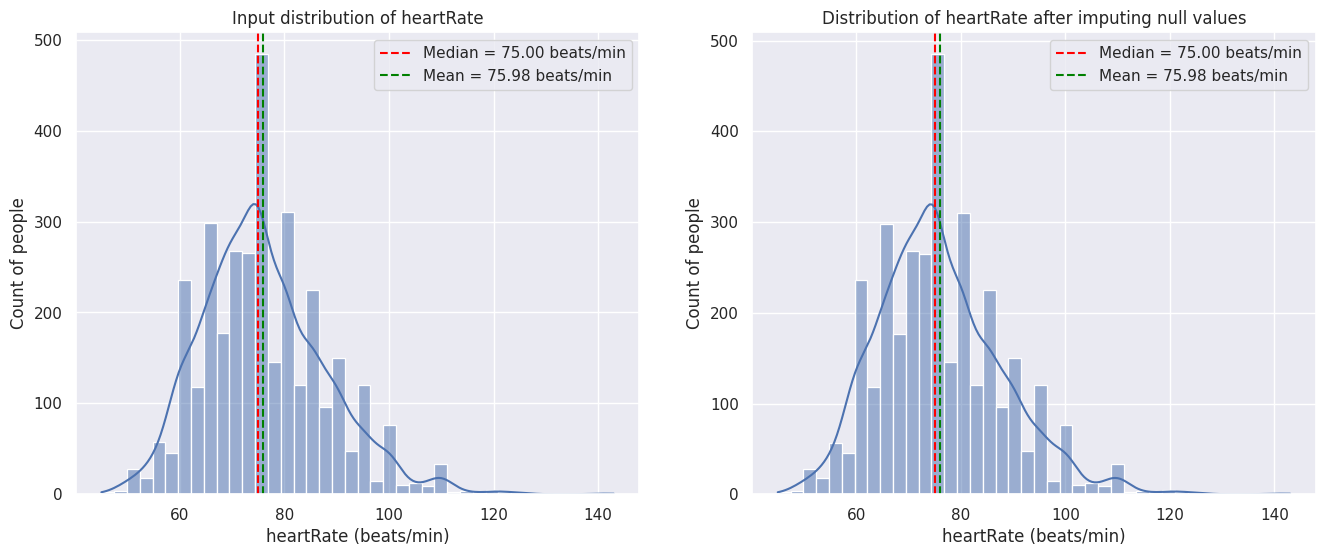

In [ ]:
for var in ['cigsPerDay', 'glucose', 'totChol', 'BMI', 'heartRate']:
  fig, axx = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
  sns.histplot(df[var], bins = 40, kde = True, ax = axx[0])
  sns.histplot(data[var], bins = 40, kde = True, ax = axx[1])
  for i, datas in enumerate([df, data]):
    axx[i].axvline(datas[var].median(), color = 'red', linestyle = '--', label = f'Median = {datas[var].median():.2f} {cont_var_units[var]}')
    axx[i].axvline(datas[var].mean(), color = 'green', linestyle = '--', label = f'Mean = {datas[var].mean():.2f} {cont_var_units[var]}')
    axx[i].set(xlabel = var + f' ({cont_var_units[var]})', ylabel = 'Count of people')
    axx[i].legend()
  axx[0].set(title = f'Input distribution of {var}')
  axx[1].set(title = f'Distribution of {var} after imputing null values')
  plt.legend()
  plt.show()

It can be observed that the mean, median and the overall distribution for each of the continuous variables are the same before and after imputation of missing values.

### 2. Feature Manipulation and Selection

Before analysing outliers, certain features need to be handled to reduce dimensionality and/or improve multicollinearity. In this section, the redundant variables are removed and features with high correlation (like **sysBP-diaBP** and **diabetes-glucose** as shown below) are dealt with.

In [ ]:
# Define the colorise function
def colorise(value, threshold=0.6, equality='greater', font='red'):
    value = abs(value)  # Take the absolute value of the correlation
    if (equality == 'greater' and value > threshold) or (equality == 'less' and value < threshold):
        return f'color: {font}'
    else:
        return ''

# Filter numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation and style it
styled_corr = numeric_data.corr().style.applymap(
    colorise, threshold=0.6, equality='greater', font='red'
)

# Display the styled correlation matrix
styled_corr


#### 2.1 education, is_smoking and prevalentStroke

Right off the start, **education** and **is_smoking** can be removed from the dataset.

*   **Education** is removed because of the less information provided of the variable, and the low correlation with **TenYearCHD**. Also, in the Hypothesis testing section, very low dependency with **TenYearCHD** was concluded. (These conclusions can be revisited [here](#scrollTo=PIIx-8_IphqN&line=1&uniqifier=1) and [here](#scrollTo=bn_IUdTipZyH))

*   **is_smoking** is removed because of the redundancy of information with respect to **cigsPerDay**. All the information contained within the former is already found in the latter, i.e., whenever **is_smoking = NO**, **cigsPerDay** has a value of zero, and whenever **is_smoking = YES**, **cigsPerDay** has a non-zero value (as shown [here](#scrollTo=Qu_o2Fi1Kb1y&line=1&uniqifier=1)). Also, during the [hypothesis testing](#scrollTo=bn_IUdTipZyH), very low dependency of this variable was found with **TenYearCHD**

In [ ]:
data = data.drop(['education', 'is_smoking'], axis = 1)

Also, **prevalentStroke** is removed because of the high class imbalance - only 0.5% of the dataset having one class, as shown below

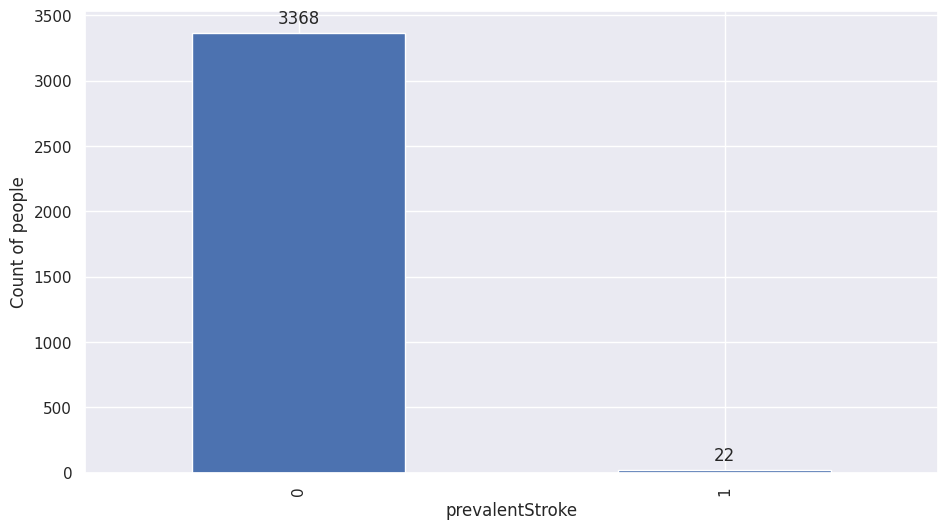

In [ ]:
var = 'prevalentStroke'
plt.figure(figsize = (11, 6))
ax = data[var].value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel(var)
display_vals(ax)

In [ ]:
data.drop('prevalentStroke', axis = 1, inplace = True)

#### 2.2 Systolic BP and Diastolic BP

*   Now, to address the high multicollinearity between systolic Blood Pressure and Diastolic Blood pressure, the two are combined to form another continuous variable named '**Mean Arterial Pressure**'
*   As stated earlier, the [Mean Arterial Pressure](https://www.ncbi.nlm.nih.gov/books/NBK538226/) is a weighted average of diastolic and systolic Blood Pressures representing the average arterial pressure in one cardiac cycle. The formula is given as

\begin{align}
MAP = \frac{2*DiastolicBP + Systolic BP} 3
\end{align}

*   [This paper](https://academic.oup.com/eurheartj/article/30/11/1395/640726) concludes that the MAP is a better predictor of Cardiovascular disease than Pulse Pressure, which is the other variable combining the systolic and diastolic Blood Pressures. Hence, the MAP is chosen to resolve the multicollinearity between **sysBP and diaBP**

In [ ]:
data['MAP'] = (data['sysBP'] + 2*data['diaBP'])/3

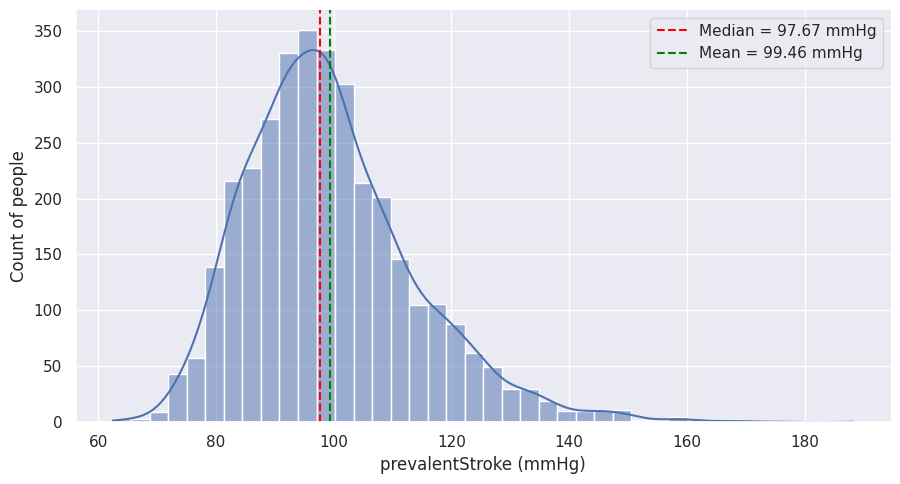

In [ ]:
# Checking the distribution
displot_with_median(dataset = data, variable = 'MAP', median = True, mean = True, unit = 'mmHg')

#### 2.3 prevalentHyp

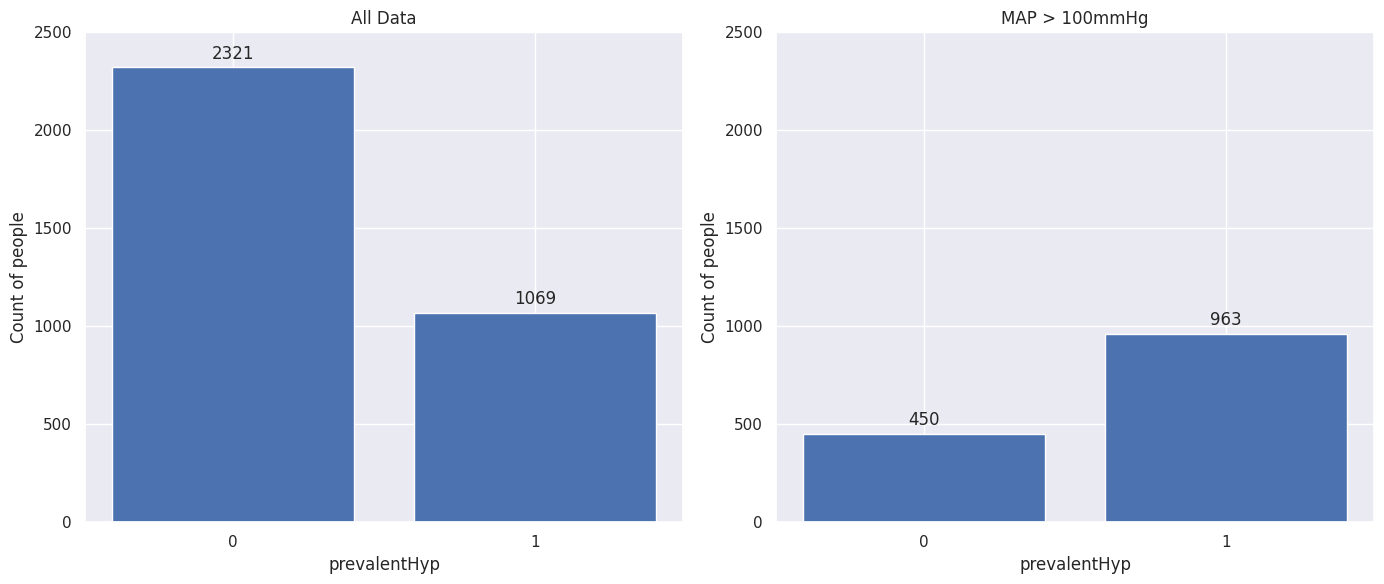

In [ ]:
# Checking distribution of prevalentHyp

filter_counts = data[data['MAP'] > 100]['prevalentHyp'].value_counts().sort_index()
all_counts = data['prevalentHyp'].value_counts().sort_index()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].bar(all_counts.index, all_counts.values)
ax[0].set_title('All Data')
ax[1].bar(filter_counts.index, filter_counts.values)
ax[1].set_title('MAP > 100mmHg')
for i in range(2):
  ax[i].set(xticks = [0, 1], ylim = [0, 2500], ylabel = 'Count of people', xlabel = 'prevalentHyp')
  display_vals(ax[i])
plt.tight_layout()
plt.show()

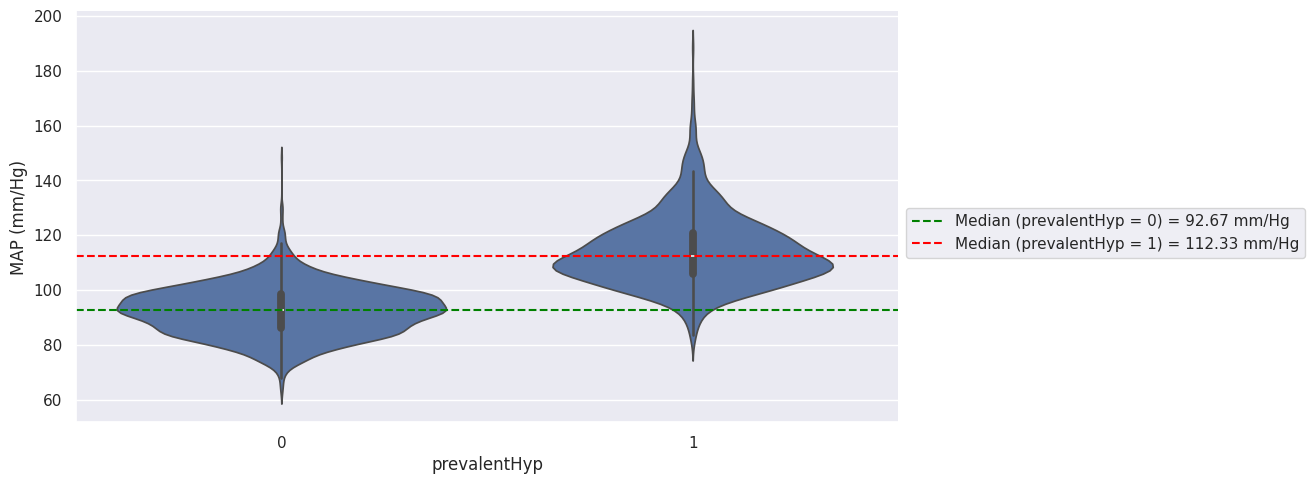

In [ ]:
catplot_with_median(dataset = data, variable = 'MAP', legend = 'prevalentHyp', median = True, unit = 'mm/Hg')

*   [A Mean arterial pressure over 100mmHg](https://www.healthline.com/health/mean-arterial-pressure#high-map) is considered high pressure in the arteries, and indicates Hypertension. As can be observed from above graph, a vast majority of the patients (over 90%) with history of Hypertension have an MAP above 100mmHg
*   This can also be visualised in the violin plot where the MAPs are generally higher for patients with history of Hypertension (with median of 112.33mmHg). This is reflected in the high correlation between **prevalentHyp and MAP**. Hence, **prevalentHyp** is deemed redundant and dropped from the analysis

#### 2.4 Glucose and Diabetes

*   **Glucose and diabetes** are directly linked to each other in that, high levels of glucose indicate high likelihood of diabetes. While there are other factors which cause elevated glucose levels even for non-diabetic patients, like stress, certain medications, and some medical conditions, it is not common.
*   An assumption is made that the glucose levels in this dataset is **fasting plasma glucose levels** since this information is not provided. An analysis between the relationship of glucose and diabetes in this dataset is conducted based on the above factors.

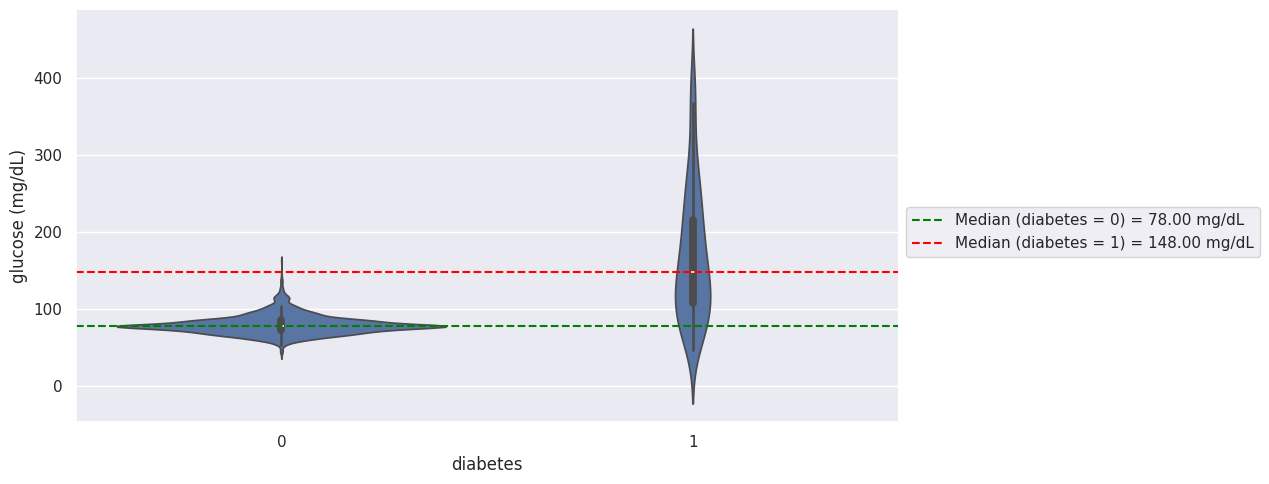

In [ ]:
catplot_with_median(dataset = data, variable = 'glucose', legend = 'diabetes', median = True, unit = 'mg/dL')

*   As it can be seen, high glucose levels pertain to diabetic patients, which can be observed in the highly flattened out plot; while most of the non-diabetic patients have an optimum glucose level, as is expected. Hence, **diabetes** category can be dropped as it is redundant information and also because of the high correlation with **glucose**
*   Also, large number of outliers can be observed for **glucose** which will be dealt by converting it into a categorical variable named **diabetes_grade**. The definitions of these levels are as per the [American Diabetes Association](https://diabetes.org/diabetes/a1c/diagnosis), which also defines [Hypoglycemia](https://diabetes.org/healthy-living/medication-treatments/blood-glucose-testing-and-control/hypoglycemia) to be a Fasting glucose level below 70mg/dL



In [ ]:
# Defining the function for Diabetes grades
def diabetes_grades(df):
  if df['glucose'] >= 126:
    return 4 #Diabetes
  elif df['glucose'] > 100:
    return 3 #Pre-diabetes
  elif df['glucose'] > 70:
    return 2 #Normal
  elif df['glucose'] < 71:
    return 1 #Hypoglycemia

In [ ]:
data['diabetes_grade'] = data.apply(diabetes_grades, axis = 1)

#### 2.6 Final features

In [ ]:
# Dropping the redundant columns
data = data.drop(['sysBP', 'diaBP', 'glucose', 'diabetes', 'prevalentHyp'], axis = 1)
cont_vars = [var for var in cont_vars if var not in ['sysBP', 'diaBP', 'glucose']]
cont_vars+=['MAP']
categ_vars = [var for var in categ_vars if var not in ['is_smoking', 'diabetes', 'prevalentStroke', 'prevalentHyp']]
categ_vars+=['diabetes_grade']

print(f'The categorical variables are: {categ_vars}')
print(f'The continuous variables are: {cont_vars}')

The categorical variables are: ['sex', 'BPMeds', 'diabetes_grade']
The continuous variables are: ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'MAP']


In [ ]:
# Define the colorise function
def colorise(value, threshold=0.4, equality='greater', font='red'):
    value = abs(value)  # Use absolute value for comparison
    if (equality == 'greater' and value > threshold) or (equality == 'less' and value < threshold):
        return f'color: {font}'
    else:
        return ''

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Style the correlation matrix
styled_corr = correlation_matrix.style.applymap(
    colorise, threshold=0.4, equality='greater', font='red'
)

# Display the styled correlation matrix
styled_corr


As can be seen above, all multicollinearity has been removed even at a threshold of correlation = 0.4

In summary, this section consisted of:
*   dropping **education**, **is_smoking** and **prevalentStroke**
*   combining **sysBP** and **diaBP** to get **MAP**
*   modifying **glucose** to get **diabetes_grade**
*   dropping **diabetes** and **prevaletHyp**

### 3. Handling Outliers

*   It is important to note that while outliers may impact the accuracy of the model, they have to be dealt with carefully as some outliers may be realistic and within the possible range of values of the particular feature, and not due to any measurement error.
*   At the same time, extreme outliers even if they are possible and true values, do need to be dealt with as it impacts the predictive power of the Machine Learning model which is sensitive to outliers.
*   Since many continuous variables have a positive correlation with the dependent variable **TenYearCHD**, a bivariate outlier analysis has to be done.

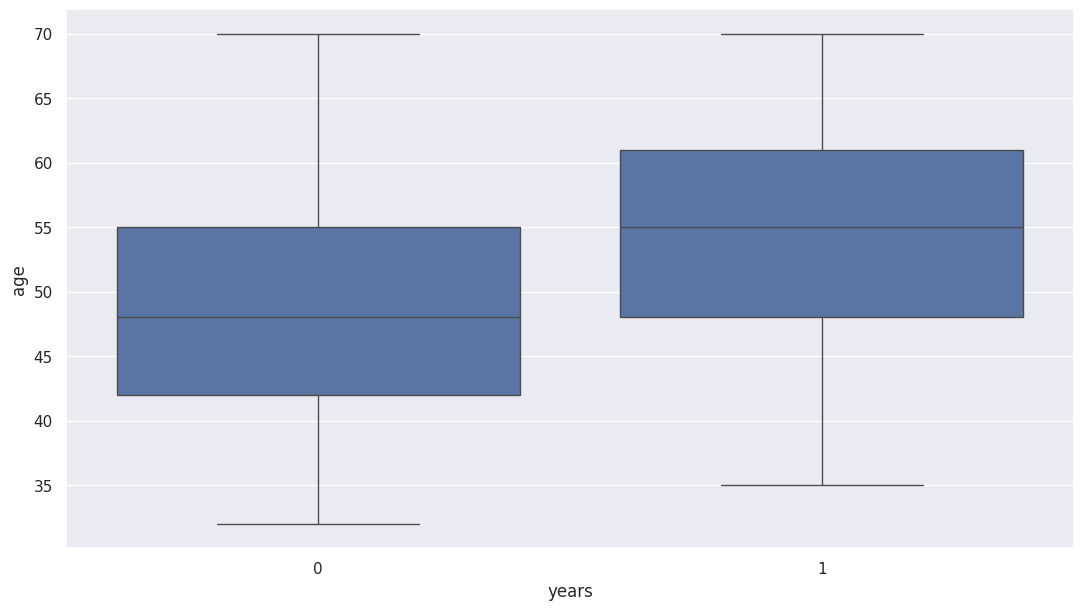

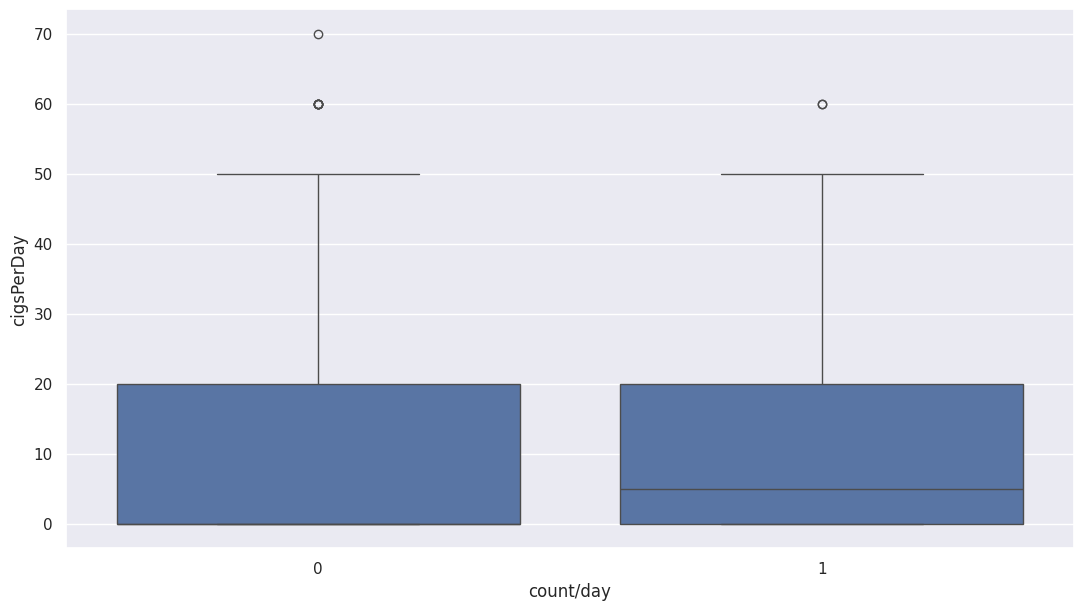

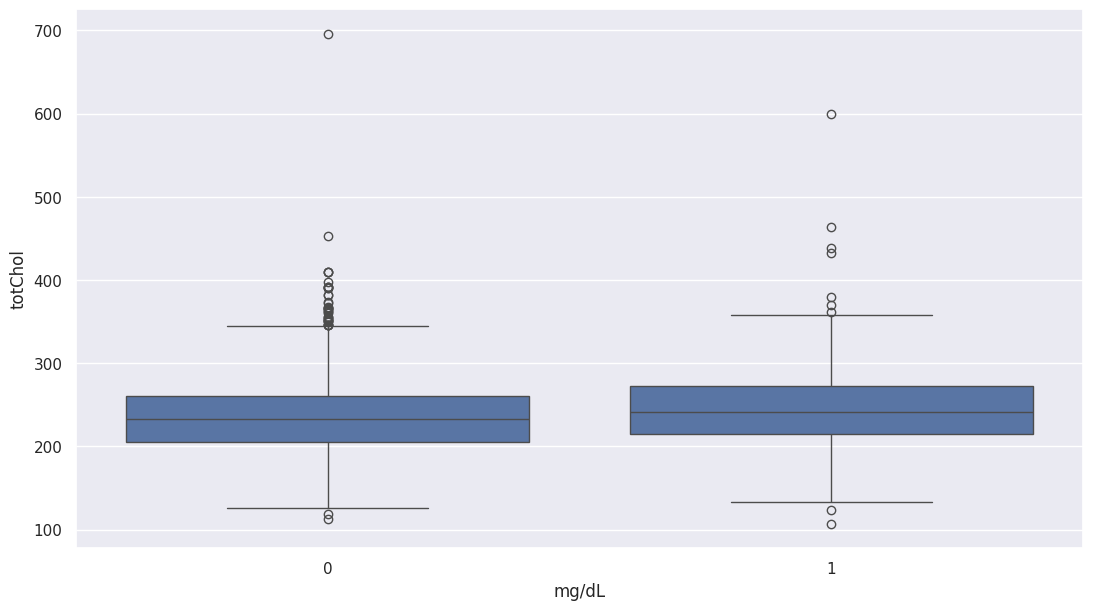

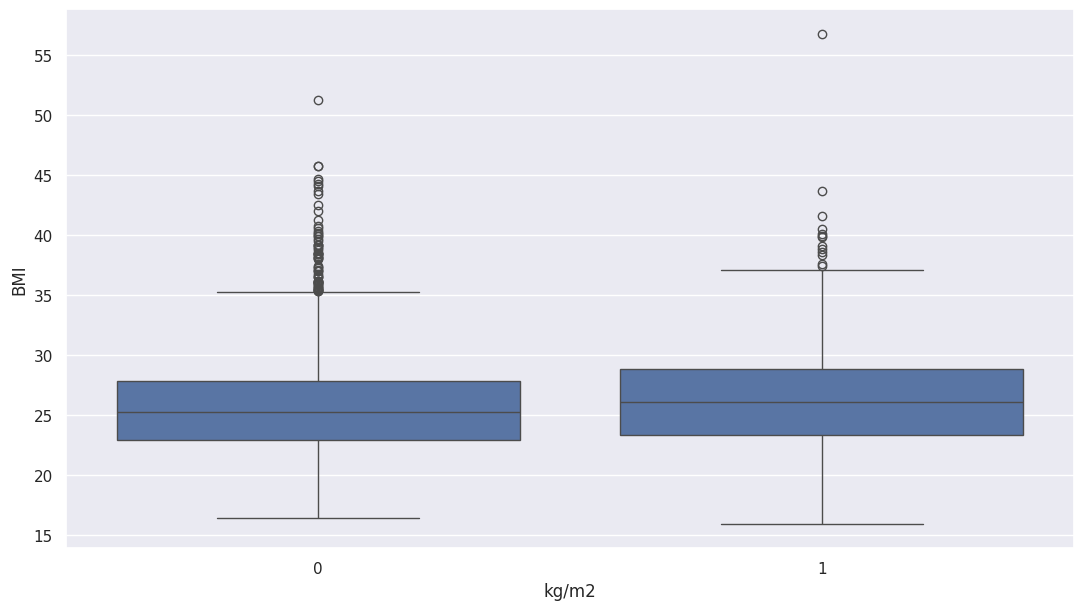

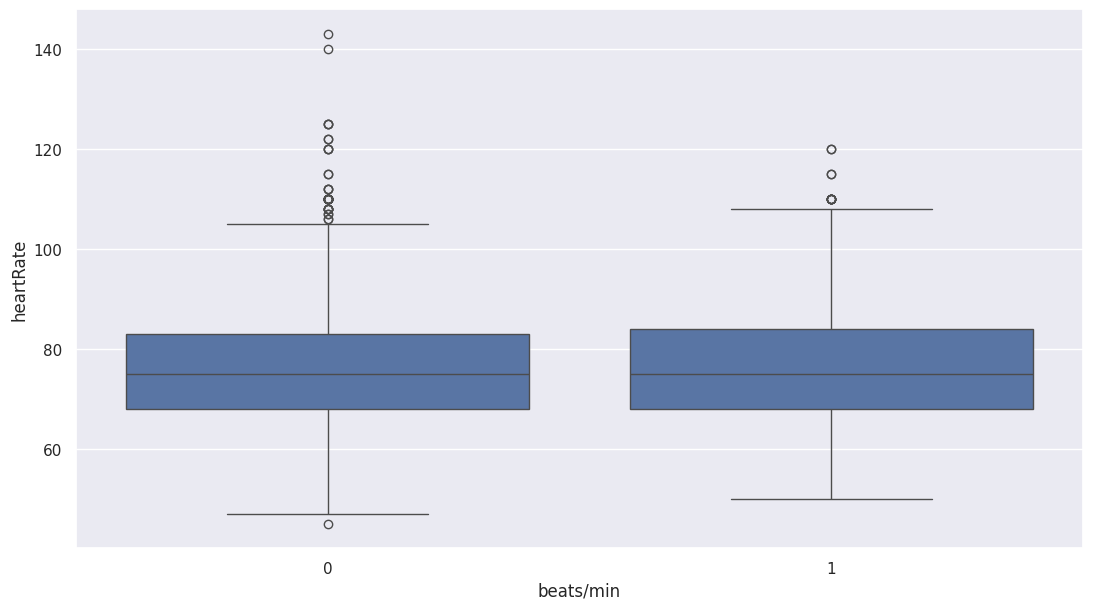

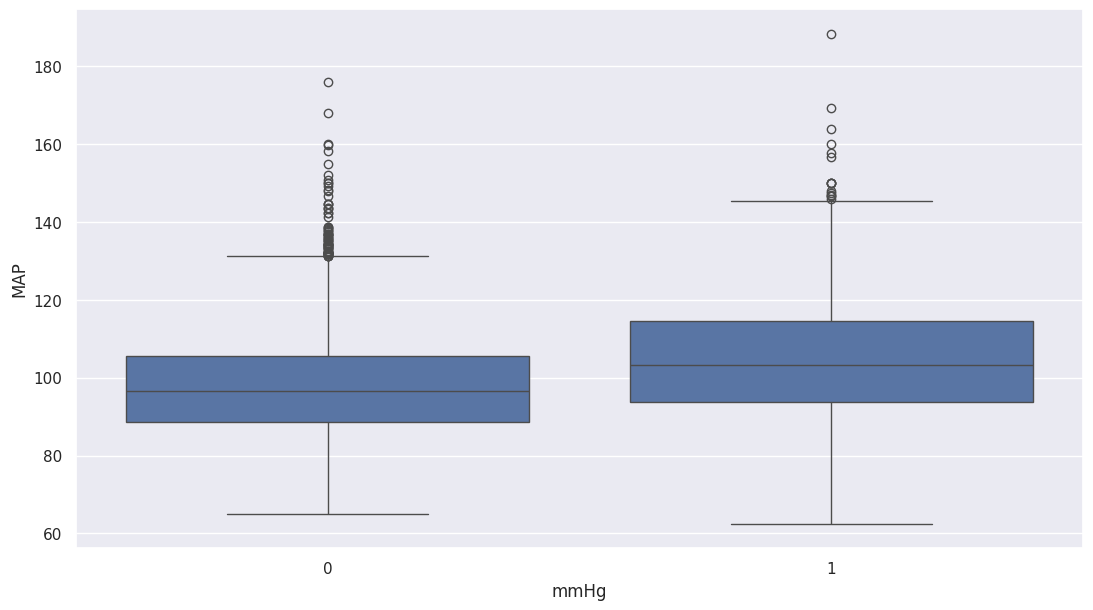

In [ ]:
# Visualising the outliers
cont_var_units['MAP'] = 'mmHg'
for var in cont_vars:
  plt.figure(figsize = (13,7))
  sns.boxplot(data = data, y = var, x = 'TenYearCHD')
  plt.ylabel(var)
  plt.xlabel(cont_var_units[var])
  plt.show()

*   It can be observed that
  *   **age** has no outliers
  *   **cigsPerDay** has outliers of about **60 and 70 cigs/day**
  *   **totChol** has outliers with maximum of around **700mg/dL**, and minimum around **100mg/dL**
  *   There are patients with **BMI** even above **50**
  *   **heartRate** has outliers with maximum of around **140 beats/day**, and with minimum below **50 beats/day**
  *   **MAP** also has outliers with maximum values close to **190mmHg**
  *   **NOTE**: All the outliers in **glucose** were removed through converting it into a categorical variable. Revisit [here](#scrollTo=ktBEqvDJxvbc&line=1&uniqifier=1)

*   All these figures are within the possible range of values for each respective feature. But even if they're realistic, they are extremely rare and this may affect the model prediction power



In [ ]:
# Limitting maximum values
max_limits = [50, 500, 45, 120, 165]
outlier_vars = cont_vars[1:]
for var, limit in zip(outlier_vars, max_limits):
  data.loc[data[var] > limit, var] = limit

# Limitting the minimum value of heartRate
data.loc[data['heartRate'] < 50, 'heartRate'] = 50

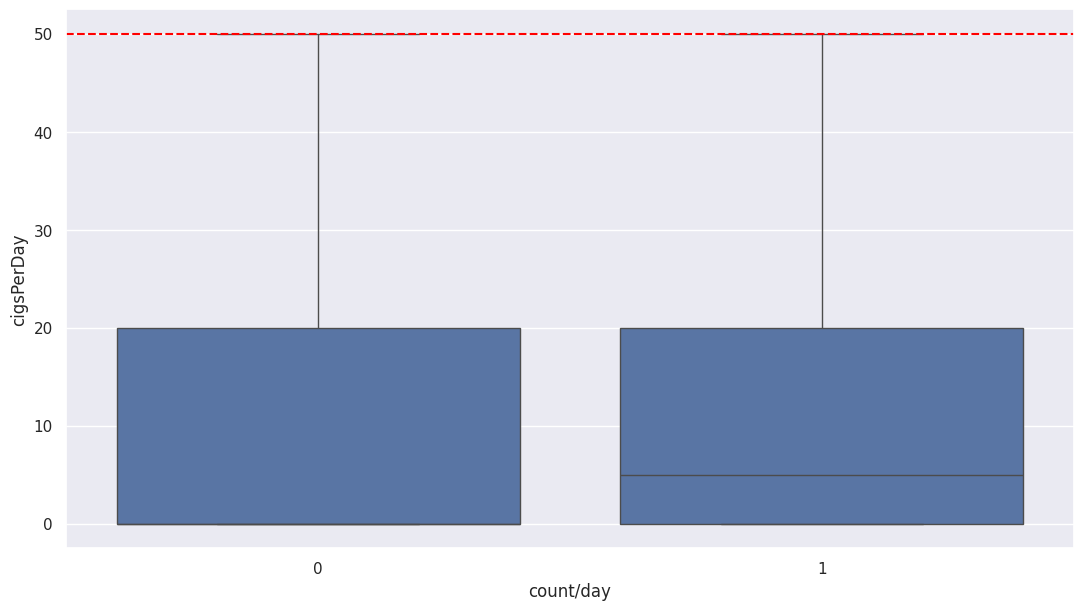

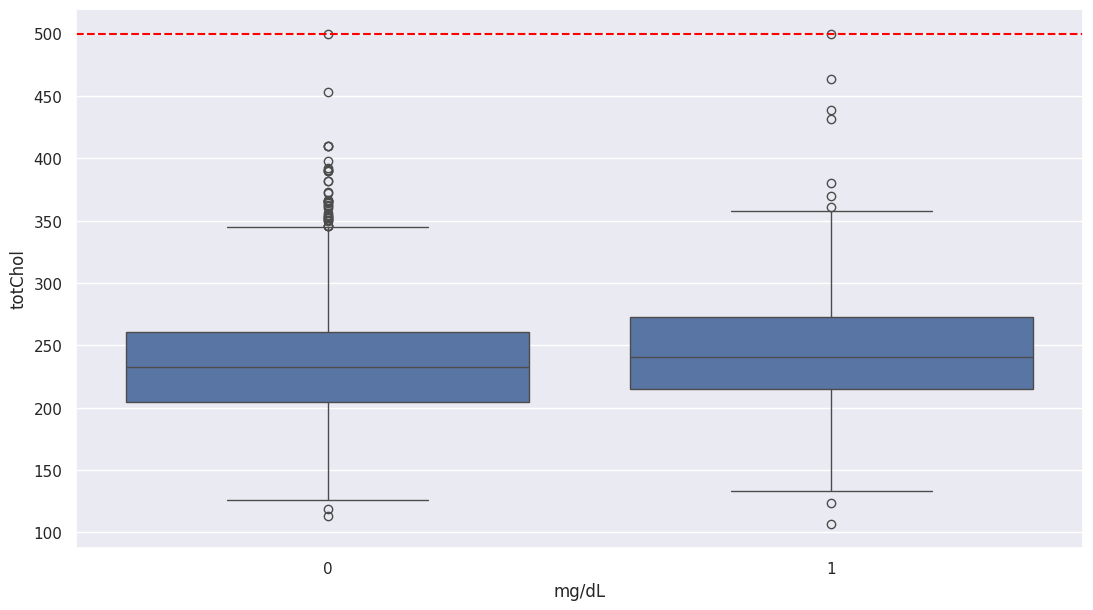

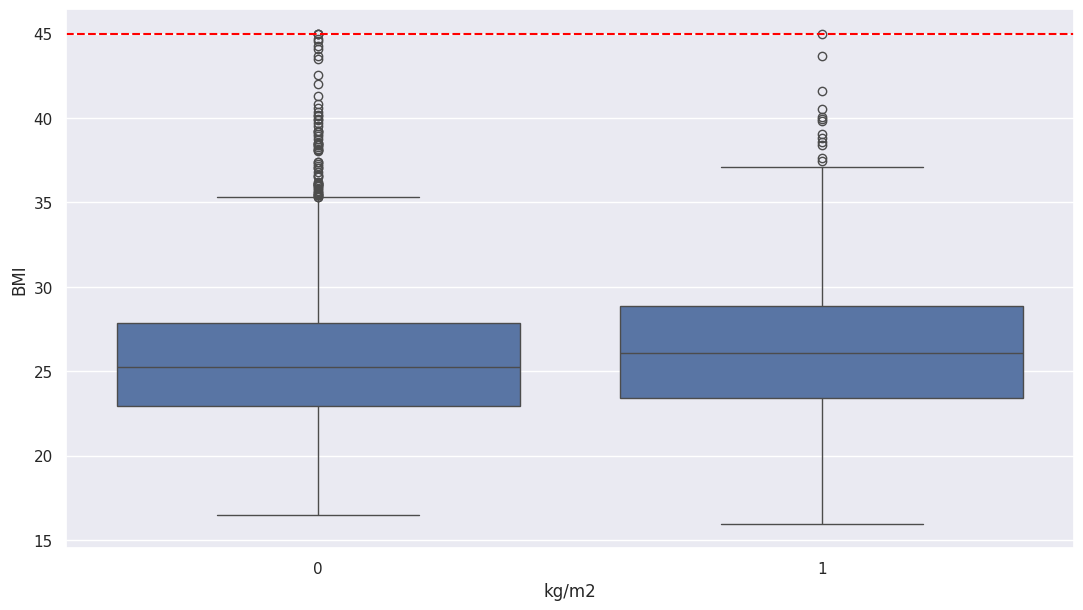

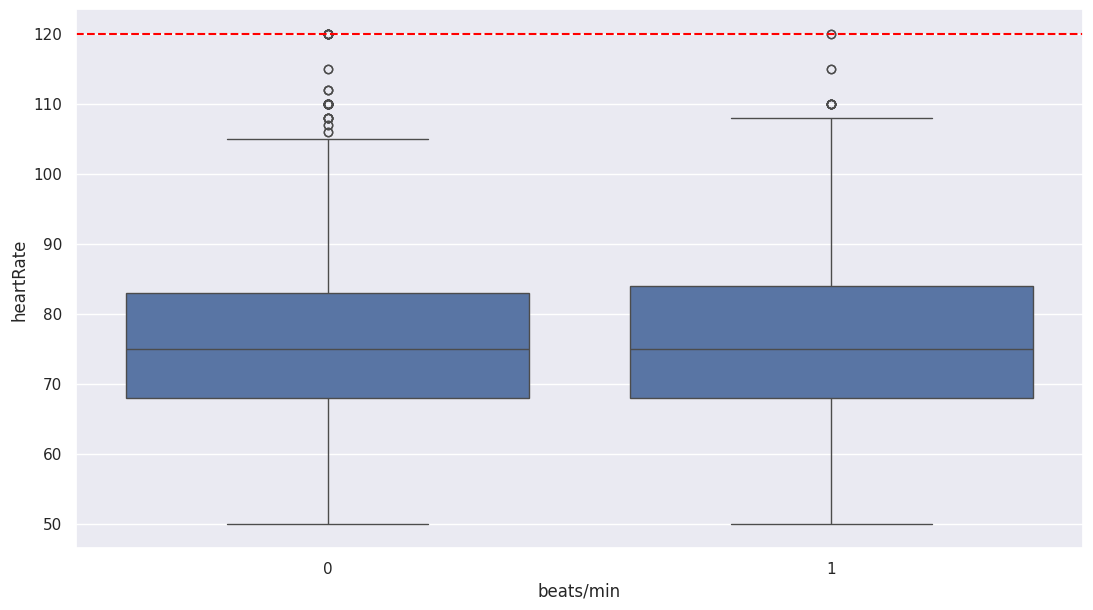

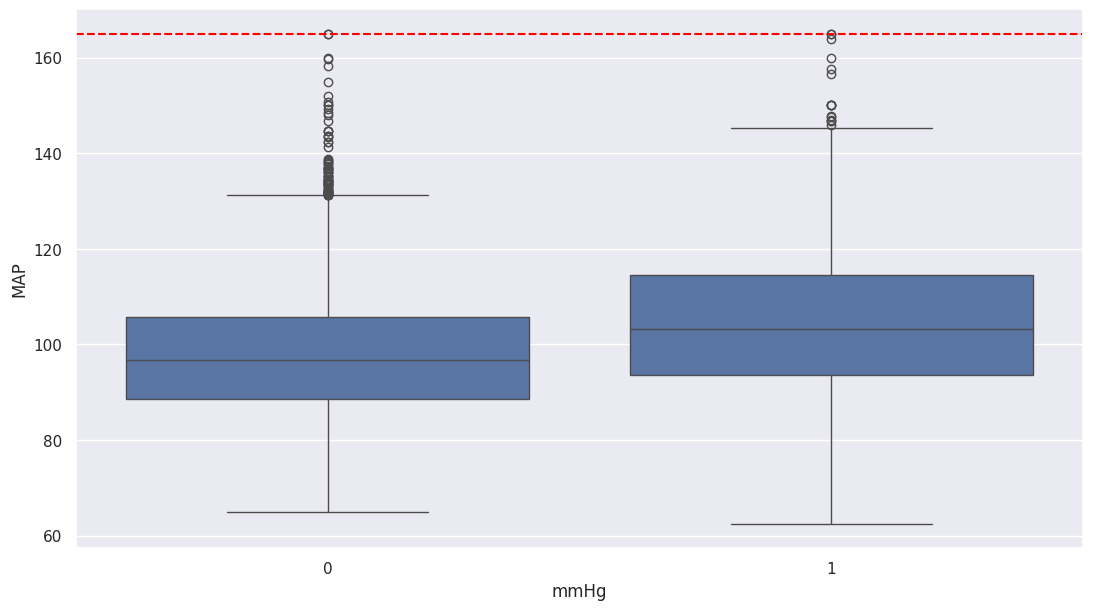

In [ ]:
# Visualising the outliers with the maximum limit after Winsorising
for var, limit in zip(outlier_vars, max_limits):
  plt.figure(figsize = (13,7))
  sns.boxplot(data = data, y = var, x = 'TenYearCHD')
  plt.axhline(limit, color = 'red', linestyle = '--')
  plt.ylabel(var)
  plt.xlabel(cont_var_units[var])
  plt.show()

All the datapoints for each variable have now been contained within the chosen limits

##### What all outlier treatment techniques have we used and why did we use those techniques?

**Winsorising** was used to handle the outliers in this dataset. Winsorizing is preferred over Trimming when the number of outliers is small, and the range of values is not unrealistically extreme. Winsorising replaces the extreme values with a value within the range of the data, which preserves the original distribution of the data. In contrast, trimming completely removes the extreme values from the data, which can alter the distribution of the data. Since the datapoints here were not outside of the possible range of each feature, and were not large in number, Winsorising was used.



### 4. Categorical Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3390 non-null   int64  
 1   age             3390 non-null   int64  
 2   sex             3390 non-null   object 
 3   cigsPerDay      3390 non-null   float64
 4   BPMeds          3390 non-null   float64
 5   totChol         3390 non-null   float64
 6   BMI             3390 non-null   float64
 7   heartRate       3390 non-null   float64
 8   TenYearCHD      3390 non-null   int64  
 9   MAP             3390 non-null   float64
 10  diabetes_grade  3390 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 291.5+ KB


In [ ]:
data['sex'].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

As seen from above, **sex** is still of object type. Since there are only 2 classes, this feature is encoded as per the following rule
*   **Male - 1**
*   **Female - 0**

In [ ]:
# Encoding sex column
data['sex'] = data['sex'].map({'M':1, 'F':0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3390 non-null   int64  
 1   age             3390 non-null   int64  
 2   sex             3390 non-null   int64  
 3   cigsPerDay      3390 non-null   float64
 4   BPMeds          3390 non-null   float64
 5   totChol         3390 non-null   float64
 6   BMI             3390 non-null   float64
 7   heartRate       3390 non-null   float64
 8   TenYearCHD      3390 non-null   int64  
 9   MAP             3390 non-null   float64
 10  diabetes_grade  3390 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 291.5 KB


All variables are now in numerical datatype

#### What all categorical encoding techniques have we used & why did we use those techniques?

One-Hot Encoding was used here since the sex variable had only 2 classes. Essentially, what this feature represents is whether a patient is male or not by assigning a non-zero value (one) if it is male.

### 5. Data Splitting

In this case, data is not transformed because outliers were handled without the need to change the data distributions. Also, normality is not required as an assumption for any of the classification models, except perhaps the Naive Bayes. So, the splitting of the data is directly performed

In [ ]:
X = data.drop(['TenYearCHD', 'id'], axis = 1)
Y = data['TenYearCHD']

# Visualising the input data
X.head()

age  sex  cigsPerDay  BPMeds  totChol    BMI  heartRate         MAP  \
0   64    0         3.0     0.0    221.0  25.38       90.0  106.000000   
1   36    1         0.0     0.0    212.0  29.77       72.0  121.333333   
2   46    0        10.0     0.0    250.0  20.35       88.0   86.000000   
3   50    1        20.0     0.0    233.0  28.26       68.0  111.333333   
4   64    0        30.0     0.0    241.0  26.42       70.0  102.166667   

   diabetes_grade  
0               2  
1               2  
2               2  
3               2  
4               2

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8, stratify = Y, shuffle = True)

In [ ]:
Y_train.value_counts()

TenYearCHD
0    2303
1     409
Name: count, dtype: int64

In [ ]:
Y_test.value_counts()

TenYearCHD
0    576
1    102
Name: count, dtype: int64

##### What data splitting ratio have we used and why?

Due to that fact that there is not a large number of data, and with 9 independent input features, a larger train-test split of 80-20 is chosen to allow the model to learn from a more diverse set of examples. Since it is an unbalanced problem, the split is stratified with respect to the dependent variable **TenYearCHD**

### 6. Handling Imbalanced Dataset

##### Why do we think the dataset is imbalanced?

The dataset is imbalanced since the classes in the variable to be predicted are not equally distributed. There are more number of people who do not have a risk of CVD compared to those who do. This can be seen in the below plot of the train data

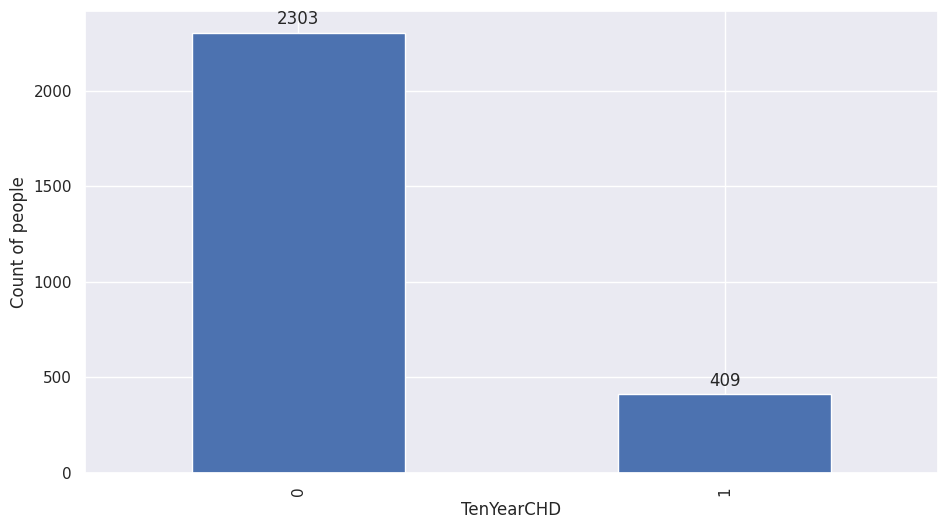

In [ ]:
plt.figure(figsize = (11, 6))
ax = Y_train.value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel('TenYearCHD')
display_vals(ax)

In [ ]:
# Handling Imbalanced Dataset
smote = SMOTE(random_state = 8)
X_smote, Y_train_final = smote.fit_resample(X_train, Y_train)

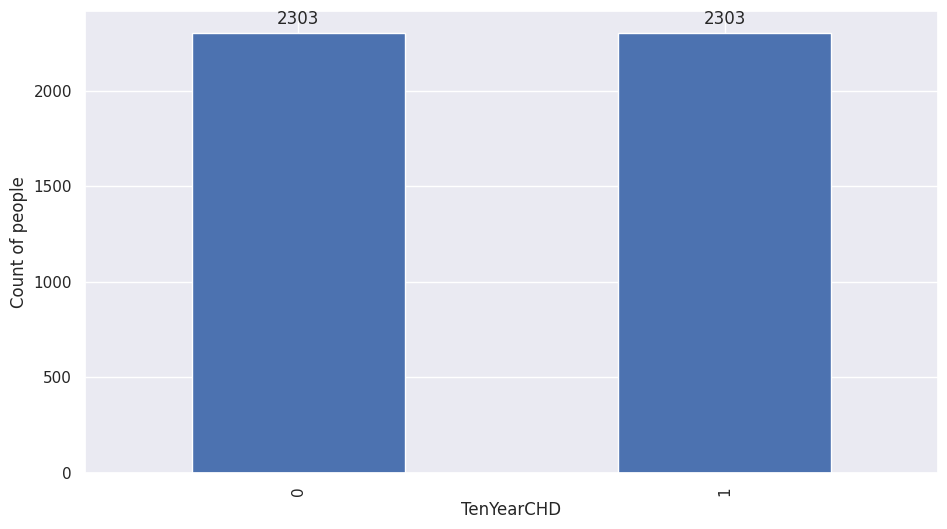

In [ ]:
# Visualising the class balance after using SMOTE
plt.figure(figsize = (11, 6))
ax = Y_train_final.value_counts().plot(kind = 'bar')
plt.ylabel('Count of people')
plt.xlabel('TenYearCHD')
display_vals(ax)

##### What technique did we use to handle the imbalance dataset and why?

Synthetic Minority Over-sampling Technique (SMOTE) is a popular oversampling method for handling class imbalance. It is used for the following reasons
*   Since not much data is present for training, undersampling will not be a good method as it may lead to loss of data and hence leading to underfitting of the model
*   Also, because there is a large imbalance (82-18% imbalance) simply replicating minority class values to create a balanced dataset will lead to overfitting of the model
*   Instead, SMOTE is used which synthetically creates new datapoints using the k-nearest neighbours, hence creating new realistic data to train the models on.

### 7. Data Scaling

In [ ]:
# Scaling the training and testing data according to training data
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_smote)
X_test_final = scaler.transform(X_test)

##### Which method have we used to scale our data and why?

*   The Minmaxscaler is usually used when the lower and upper boundaries in the area of interest are well-known
*   It also helps to maintain the the interpretability of the values after scaling
*   MinMaxScaler also helps maintain the relative relationship between the datapoints, which is crucial in this case of CVD risk prediction
*   Also since there is no specific requirement of the mean and standard deviation of the data, the MinMaxScaler is used

## **6. ML Model Implementation**

The following 7 models are implemented in this section on the train dataset, and then tested on the test data.
*   Logistic Regression
*   Naive Bayes
*   Decision Tree
*   KNN
*   Support Vector Machine
*   Random Forest
*   XGBoost

The models are implemented on a rough order of descending explainability and ascending complexity. Usually, for a case as intricate as a heart disease prediction, the models should be more interpretable/explainable.

The scoring metric preferred for evaluation is the **Recall**. The **ROC-AUC score** is also recorded for each model.


### Functions to train each ML Model

In [ ]:
# Function to plot the Confusion Matrix
def confusion_plot(cm):
  '''Plots the Confusion Matrix given as input'''
  cmd = ConfusionMatrixDisplay(cm, display_labels = ['No risk (0)', 'Risk (1)'])
  cmd.plot(cmap = 'Blues')
  plt.title('Confusion Matrix for Test Data')
  plt.show()

# Function to train and test a given classification model
def model_train_test(model, train_x, train_y, test_x, test_y, gs = False, confusion = True):
  '''Trains the classification model given as input. Other inputs include Test and train data
  and a Boolean to inform the function if GridSearch is being performed
  Returns the train and test Recalls and ROC-AUC scores, the test data predictions, and the final model'''

  model.fit(train_x, train_y)
  if gs == True:
    print(f'Best model parameters are: {model.best_params_}')
    print(f'Best model score is: {model.best_score_}\n')
    model = model.best_estimator_

  # Getting the train and test predictions
  train_preds = model.predict(train_x)
  train_recall = recall_score(y_true = train_y, y_pred = train_preds, average='binary')
  train_roc = roc_auc_score(train_y, train_preds)
  test_preds = model.predict(test_x)
  test_recall = recall_score(y_true = test_y, y_pred = test_preds, average='binary')
  test_roc = roc_auc_score(test_y, test_preds)

  # Plotting confusion matrix
  if confusion == True:
    confusion_plot(confusion_matrix(test_y, test_preds))

  output_metrics = {'Train Recall':train_recall, 'Test Recall':test_recall, 'Train ROC-AUC':train_roc, 'Test ROC-AUC':test_roc}
  return output_metrics, test_preds, model

In [ ]:
# Creating a dictionary of lists to store Train and test Recalls and ROC-AUC scores
scores = dict()
scores['Train Recall'] = []
scores['Test Recall'] = []
scores['Train ROC-AUC'] = []
scores['Test ROC-AUC'] = []
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'KNN', 'SVM', 'Random Forest', 'XGBoost']

### ML Model - 1 - Logistic Regression

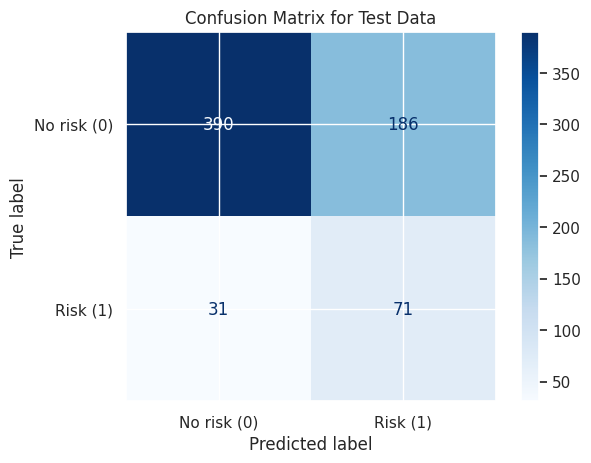

In [ ]:
# Training the model
lr_scores, lr_test_preds, lr_model = model_train_test(LogisticRegression(), X_train_final, Y_train_final, X_test_final, Y_test)

In [ ]:
# Classification Report
print(classification_report(Y_test, lr_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.93      0.68      0.78       576
     class-1       0.28      0.70      0.40       102

    accuracy                           0.68       678
   macro avg       0.60      0.69      0.59       678
weighted avg       0.83      0.68      0.72       678



In [ ]:
# Printing the train and test Recalls and ROC-AUC scores
def print_scores(model_name, model_scores):
  '''Function to print the scores of a given model'''
  print(f"The train and test recalls of the {model_name} Model are: {round(model_scores['Train Recall'] * 100, 2)}% and {round(model_scores['Test Recall'] * 100, 2)}% respectively")
  print(f"The train and test ROC-AUC scores of the {model_name} Model are: {round(model_scores['Train ROC-AUC'] * 100, 2)}% and {round(model_scores['Test ROC-AUC'] * 100, 2)}% respectively")

print_scores(model_name = model_names[0], model_scores = lr_scores)

The train and test recalls of the Logistic Regression Model are: 67.0% and 69.61% respectively
The train and test ROC-AUC scores of the Logistic Regression Model are: 65.85% and 68.66% respectively


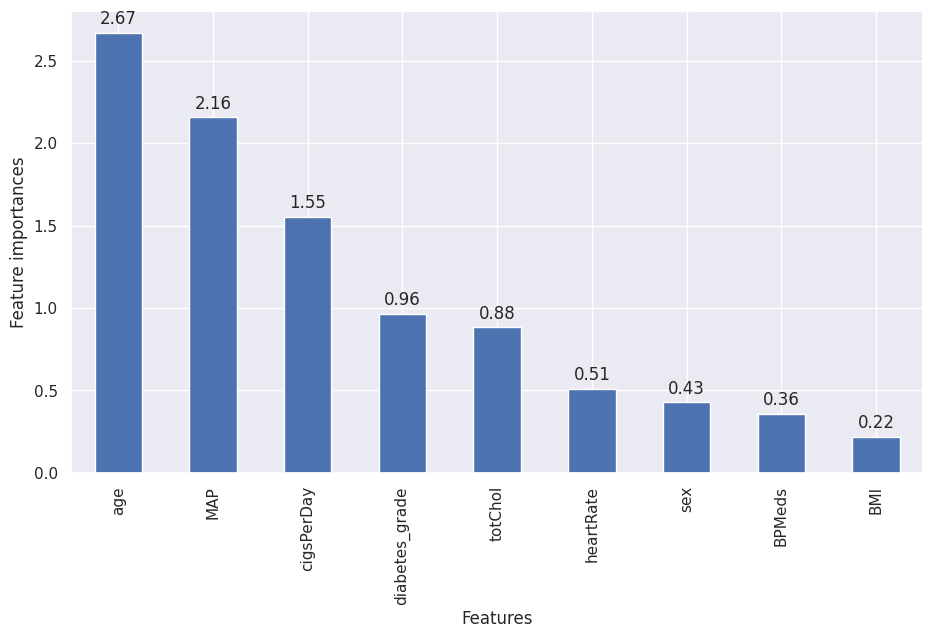

In [ ]:
# Displaying feature importances
lr_importances = pd.Series(abs(lr_model.coef_[0]), index = X.columns)
plt.figure(figsize = (11, 6))
ax = lr_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

The following results can be observed from the Logistic Regression model:
*   **Train recall of 67% and Test Recall of 69.61%**
*   **Train ROC-AUC score of 65.85% and Test ROC-AUC of 68.86%**
  *   A test score higher than train score is not uncommon. Since the value is not significantly higher than the train recall, the reasons for this could be the test set having a different distribution of data than the training set, or the model performing better on the test set due to chance
*   **31 predictions out of all the 102 patients having risk of CVD were false**
*   **'age' is the most important feature for risk prediction of CVD, while 'BMI' is the least important**

In [ ]:
for score in lr_scores:
  scores[score].append(lr_scores[score] * 100)

### ML Model - 2 - Naive Bayes

In [ ]:
# Defining the Hyperparameters and scoring metric
params_nb = {'var_smoothing': np.logspace(0, -9, num = 50)}
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
scorer = make_scorer(recall_score, average = 'binary')

nb_models = GridSearchCV(GaussianNB(), params_nb, cv = cv, scoring = scorer)

Best model parameters are: {'var_smoothing': 0.1842069969326716}
Best model score is: 0.5102144047282217



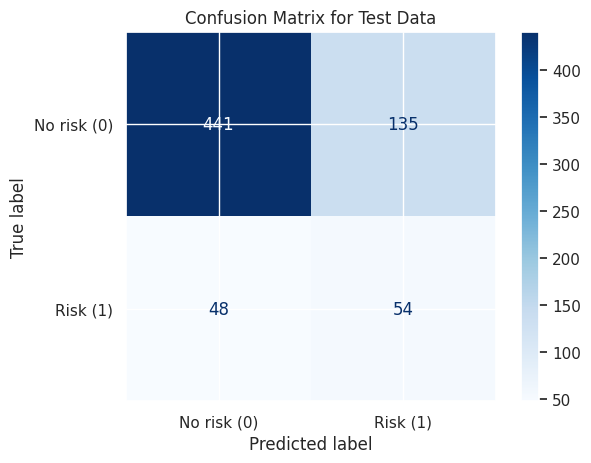

In [ ]:
# Training the model
nb_scores, nb_test_preds, nb_model = model_train_test(nb_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, nb_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.90      0.77      0.83       576
     class-1       0.29      0.53      0.37       102

    accuracy                           0.73       678
   macro avg       0.59      0.65      0.60       678
weighted avg       0.81      0.73      0.76       678



In [ ]:
# Printing the scores
print_scores(model_name = model_names[1], model_scores = nb_scores)

The train and test recalls of the Naive Bayes Model are: 51.58% and 52.94% respectively
The train and test ROC-AUC scores of the Naive Bayes Model are: 63.48% and 64.75% respectively


The following results can be observed from the Naive Bayes model:
*   **Train recall of 51.58% and Test Recall of 52.94%**
*   **Train ROC-AUC score of 63.48% and Test ROC-AUC of 64.75%**
*   **48 predictions out of all the 102 patients having risk of CVD were false**

In [ ]:
for score in nb_scores:
  scores[score].append(nb_scores[score] * 100)

### ML Model - 3 - Decision Tree

In [ ]:
# Defining the Hyperparameters
params_dt = {
              'max_depth' : [3, 4, 5],
              'min_samples_split':[10, 20, 25, 30],
              'min_samples_leaf':[10, 20, 25, 30]
              }

dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state = 42)
dt_models = GridSearchCV(dt_model, params_dt, cv = cv, scoring = scorer)

Best model parameters are: {'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 10}
Best model score is: 0.8323807727372757



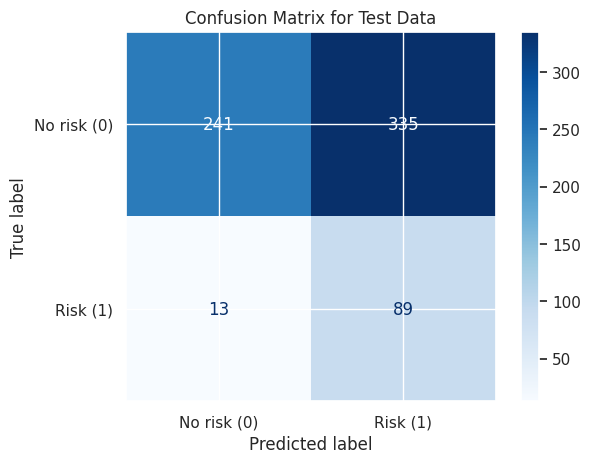

CPU times: user 14.4 s, sys: 134 ms, total: 14.6 s
Wall time: 14.6 s


In [ ]:
# Training the model
%%time
dt_scores, dt_test_preds, dt_model = model_train_test(dt_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, dt_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.95      0.42      0.58       576
     class-1       0.21      0.87      0.34       102

    accuracy                           0.49       678
   macro avg       0.58      0.65      0.46       678
weighted avg       0.84      0.49      0.54       678



In [ ]:
# Printing the model scores
print_scores(model_name = model_names[2], model_scores = dt_scores)

The train and test recalls of the Decision Tree Model are: 90.19% and 87.25% respectively
The train and test ROC-AUC scores of the Decision Tree Model are: 66.22% and 64.55% respectively


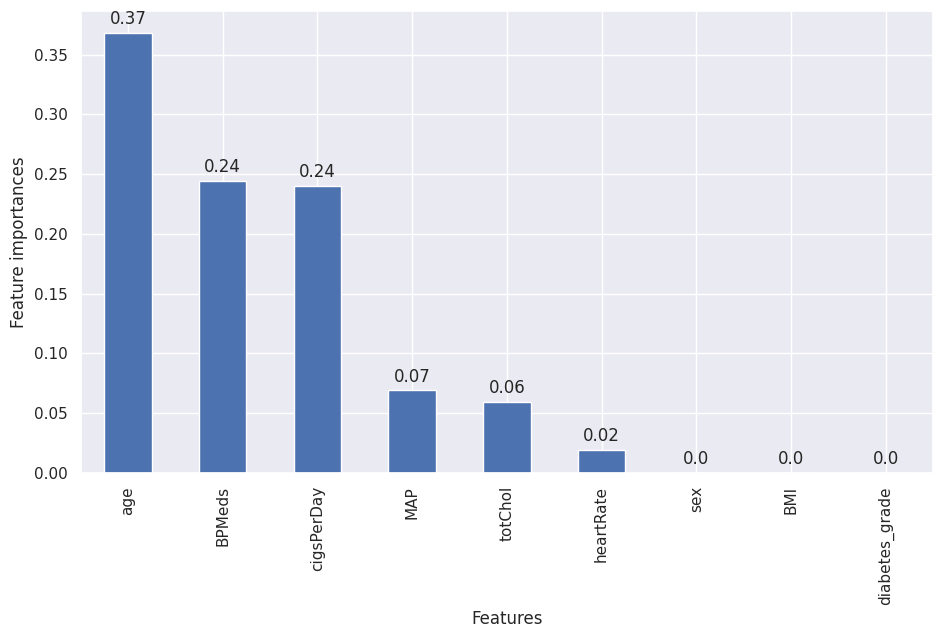

In [ ]:
# Displaying the Feature importances
dt_importances = pd.Series(dt_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = dt_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

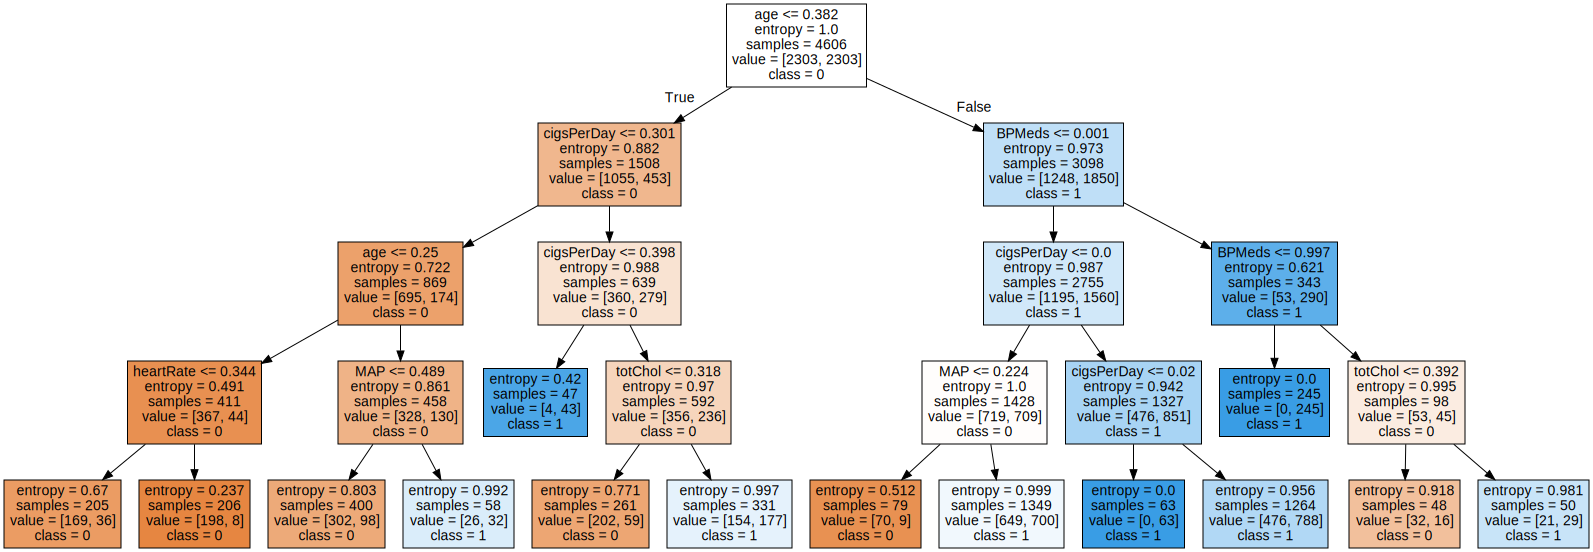

In [ ]:
# Visualising the decision tree
graph = Source(tree.export_graphviz(dt_model, out_file = None, feature_names = X.columns, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format = 'svg')))

The following results can be observed from the Decision Tree model:
*   **Train recall of 90.19% and Test Recall of 87.25%**
*   **Train ROC-AUC score of 66.22% and Test ROC-AUC of 64.55%**
*   **13 predictions out of all the 102 patients having risk of CVD were false**
*   **age is again the most important feature for risk prediction of CVD, while sex, BMI and diabetes_grade are the least important. Since depth of the tree was 4 (as also seen in the plot above), the model did not split on the latter 3 variables**

In [ ]:
for score in dt_scores:
  scores[score].append(dt_scores[score] * 100)

### ML Model - 4 - K-Nearest Neighbours

In [ ]:
# Fitting the knn model for various values of k
%%time
knn_train_recalls = []
knn_test_recalls = []
for k in range(1, 51):
  knn_scores = model_train_test(KNeighborsClassifier(n_neighbors = k), X_train_final, Y_train_final, X_test_final, Y_test, confusion = False)[0]
  knn_train_recalls.append(knn_scores['Train Recall'])
  knn_test_recalls.append(knn_scores['Test Recall'])

CPU times: user 28.1 s, sys: 525 ms, total: 28.6 s
Wall time: 28.6 s


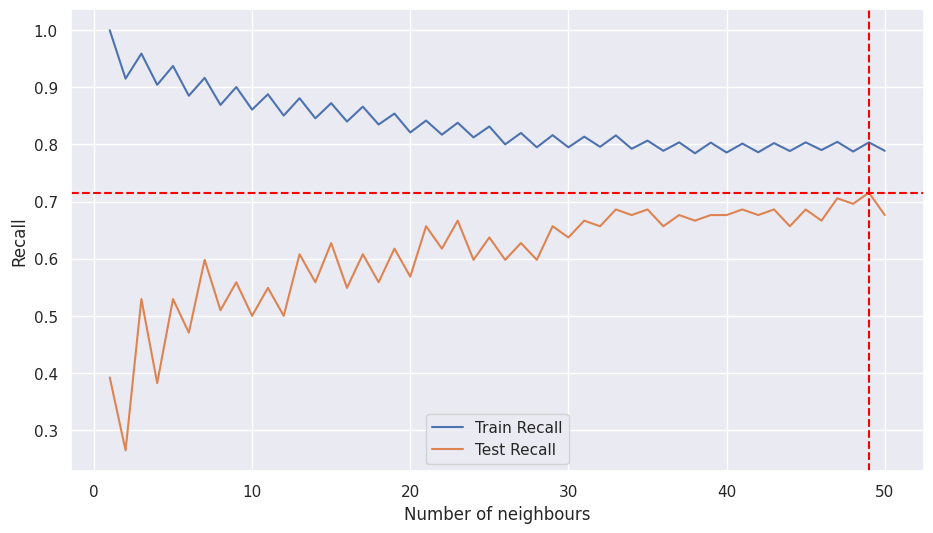

Optimum value of n_neighbours with highest value of test recall is 49


In [ ]:
# Plotting the train and test recalls
k_optimum = knn_test_recalls.index(max(knn_test_recalls)) + 1
plt.figure(figsize=(11, 6))
plt.plot(range(1, 51), knn_train_recalls, label='Train Recall')
plt.plot(range(1, 51), knn_test_recalls, label='Test Recall')
plt.axhline(max(knn_test_recalls), color = 'red', linestyle = '--')
plt.axvline(k_optimum, color = 'red', linestyle = '--')
plt.xlabel('Number of neighbours')
plt.ylabel('Recall')
plt.legend()
plt.show()

print(f'Optimum value of n_neighbours with highest value of test recall is {k_optimum}')

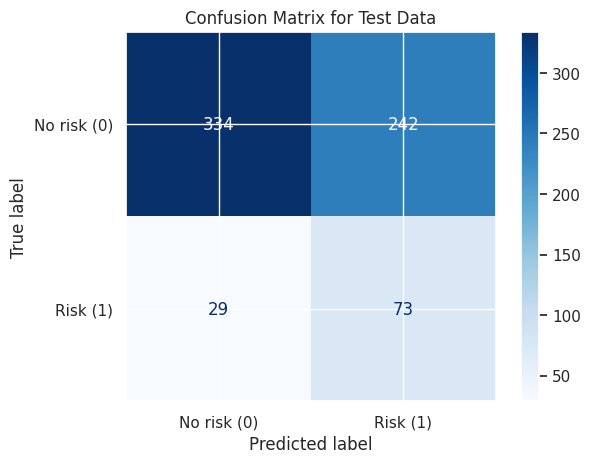

In [ ]:
# Fitting the knn model with the optimum k
knn_scores, knn_test_preds, knn_model = model_train_test(KNeighborsClassifier(n_neighbors = k_optimum), X_train_final, Y_train_final, X_test_final, Y_test, gs = False)

In [ ]:
# Classification Report
print(classification_report(Y_test, knn_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.92      0.58      0.71       576
     class-1       0.23      0.72      0.35       102

    accuracy                           0.60       678
   macro avg       0.58      0.65      0.53       678
weighted avg       0.82      0.60      0.66       678



In [ ]:
# Printing the model scores
print_scores(model_name = model_names[3], model_scores = knn_scores)

The train and test recalls of the KNN Model are: 80.37% and 71.57% respectively
The train and test ROC-AUC scores of the KNN Model are: 70.32% and 64.78% respectively


The following results can be observed from the KNN model:
*   **Train recall of 80.37% and Test Recall of 71.57%**
*   **Train ROC-AUC score of 70.32% and Test ROC-AUC of 64.78%**
*   **29 predictions out of all the 102 patients having risk of CVD were false**

In [ ]:
for score in knn_scores:
  scores[score].append(knn_scores[score] * 100)

### ML Model - 5 - Support Vector Machine

In [ ]:
# Defining the Hyperparameters
params_svc = {
              'C':[0.1, 1, 10],
              'gamma':[0.01, 0.001, 0.0001],
              'kernel':['rbf', 'poly', 'sigmoid']
              }

svc_models = GridSearchCV(SVC(), params_svc, cv = cv, scoring = scorer)

Best model parameters are: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best model score is: 0.701117922600522



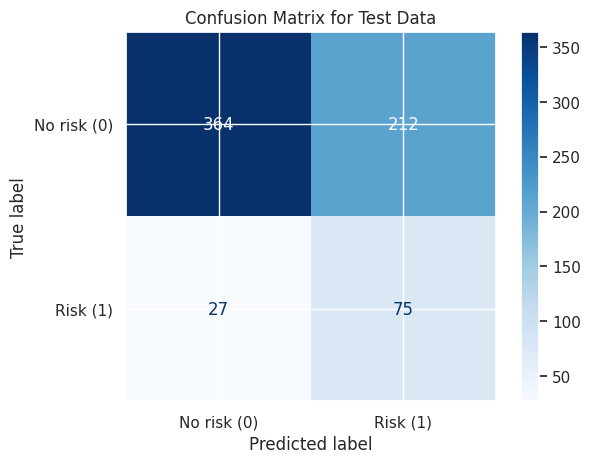

CPU times: user 5min 53s, sys: 3.25 s, total: 5min 56s
Wall time: 6min 16s


In [ ]:
# Training the model
%%time
svc_scores, svc_test_preds, svc_model = model_train_test(svc_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, svc_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.93      0.63      0.75       576
     class-1       0.26      0.74      0.39       102

    accuracy                           0.65       678
   macro avg       0.60      0.68      0.57       678
weighted avg       0.83      0.65      0.70       678



In [ ]:
# Printing the scores
print_scores(model_name = model_names[4], model_scores = svc_scores)

The train and test recalls of the SVM Model are: 70.78% and 73.53% respectively
The train and test ROC-AUC scores of the SVM Model are: 65.85% and 68.36% respectively


The following results can be observed from the SVM model:
*   **Train recall of 70.78% and Test Recall of 73.53%**
*   **Train ROC-AUC score of 65.85% and Test ROC-AUC of 68.36%**
*   **27 predictions out of all the 102 patients having risk of CVD were false**

In [ ]:
for score in svc_scores:
  scores[score].append(svc_scores[score] * 100)

### ML Model - 6 - Random Forest

In [ ]:
# Defining the Hyperparameters
params_rf = {
              'n_estimators':[50, 100, 200],
              'max_depth':[3, 4, 5],
              'min_samples_split':[10, 20, 25],
              'min_samples_leaf':[10, 20, 25]
              }

rf_model = RandomForestClassifier(criterion= 'entropy', random_state = 42)
rf_models = GridSearchCV(rf_model, params_rf, cv = cv, scoring = scorer)

Best model parameters are: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 25, 'n_estimators': 100}
Best model score is: 0.7827583388349209



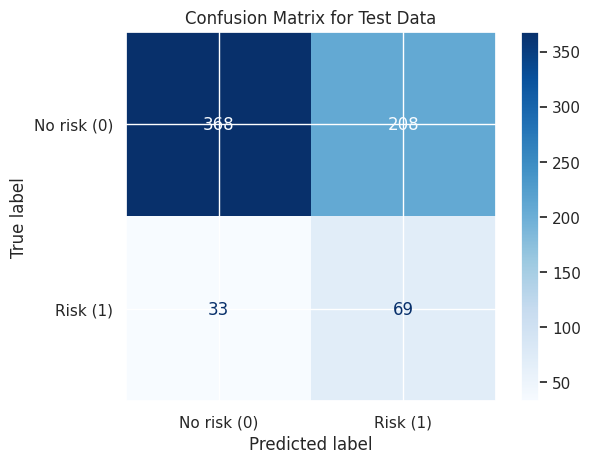

CPU times: user 12min 25s, sys: 2.21 s, total: 12min 27s
Wall time: 12min 52s


In [ ]:
# Training the model
%%time
rf_scores, rf_test_preds, rf_model = model_train_test(rf_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, rf_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.92      0.64      0.75       576
     class-1       0.25      0.68      0.36       102

    accuracy                           0.64       678
   macro avg       0.58      0.66      0.56       678
weighted avg       0.82      0.64      0.69       678



In [ ]:
# Printing the model scores
print_scores(model_name = model_names[5], model_scores = rf_scores)

The train and test recalls of the Random Forest Model are: 78.98% and 67.65% respectively
The train and test ROC-AUC scores of the Random Forest Model are: 72.28% and 65.77% respectively


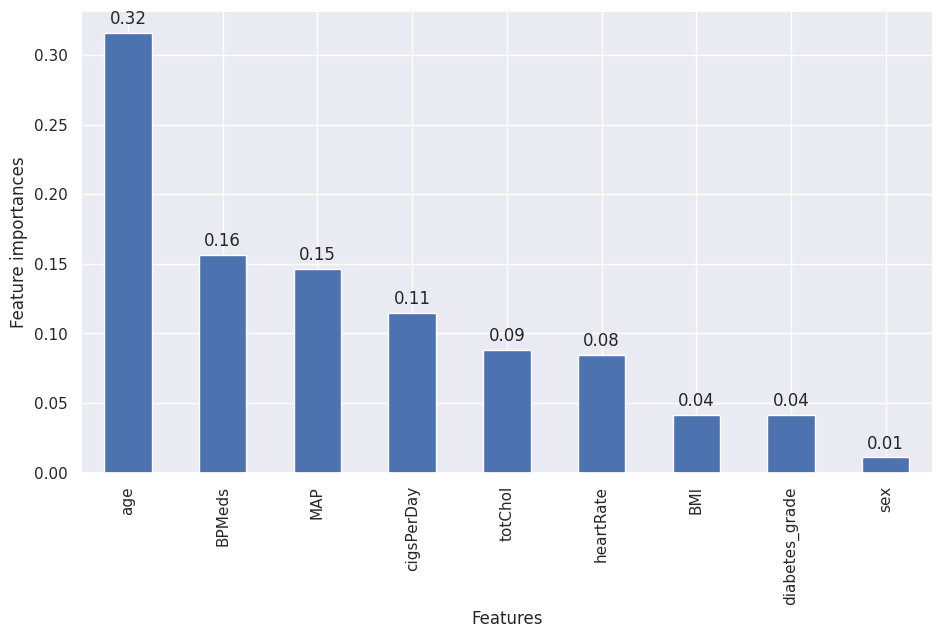

In [ ]:
# Displaying Feature Importances
rf_importances = pd.Series(rf_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = rf_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

The following results can be observed from the Random Forest model:
*   **Train recall of 78.98% and Test Recall of 67.65%**
*   **Train ROC-AUC score of 72.28% and Test ROC-AUC of 65.77%**
*   **33 predictions out of all the 102 patients having risk of CVD were false**
*   **The Random Forest model also predicts 'age' to be the most important feature for risk prediction of CVD, while sex, diabetes level and BMI are the least important**

In [ ]:
for score in rf_scores:
  scores[score].append(rf_scores[score] * 100)

### ML Model - 7 - XGBoost

In [ ]:
# Defining the Hyperparameters
params_xgb = {
              'n_estimators':[50, 100],
              'max_depth':[3, 4],
              'learning_rate':[0.01, 0.02]
              }

xgb_model = xgb.XGBClassifier(random_state = 42)
xgb_models = GridSearchCV(xgb_model, params_xgb, cv = cv, scoring = scorer)

Best model parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best model score is: 0.7902819956616053



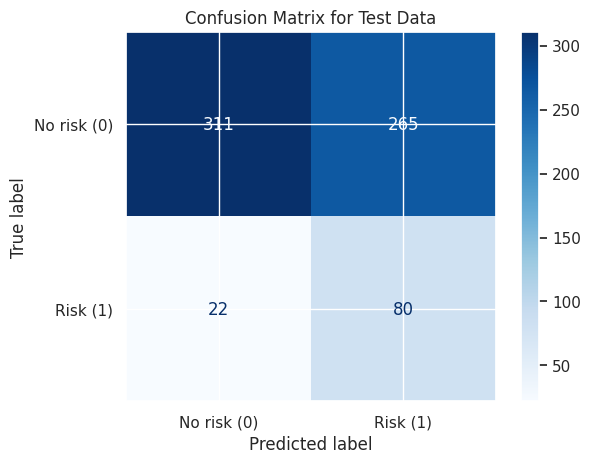

CPU times: user 17.5 s, sys: 295 ms, total: 17.8 s
Wall time: 9.24 s


In [ ]:
# Training the model
%%time
xgb_scores, xgb_test_preds, xgb_model = model_train_test(xgb_models, X_train_final, Y_train_final, X_test_final, Y_test, gs = True)

In [ ]:
# Classification Report
print(classification_report(Y_test, xgb_test_preds, target_names=['class-0', 'class-1']))

              precision    recall  f1-score   support

     class-0       0.93      0.54      0.68       576
     class-1       0.23      0.78      0.36       102

    accuracy                           0.58       678
   macro avg       0.58      0.66      0.52       678
weighted avg       0.83      0.58      0.64       678



In [ ]:
# Printing model scores
print_scores(model_name = model_names[6], model_scores = xgb_scores)

The train and test recalls of the XGBoost Model are: 80.55% and 78.43% respectively
The train and test ROC-AUC scores of the XGBoost Model are: 67.09% and 66.21% respectively


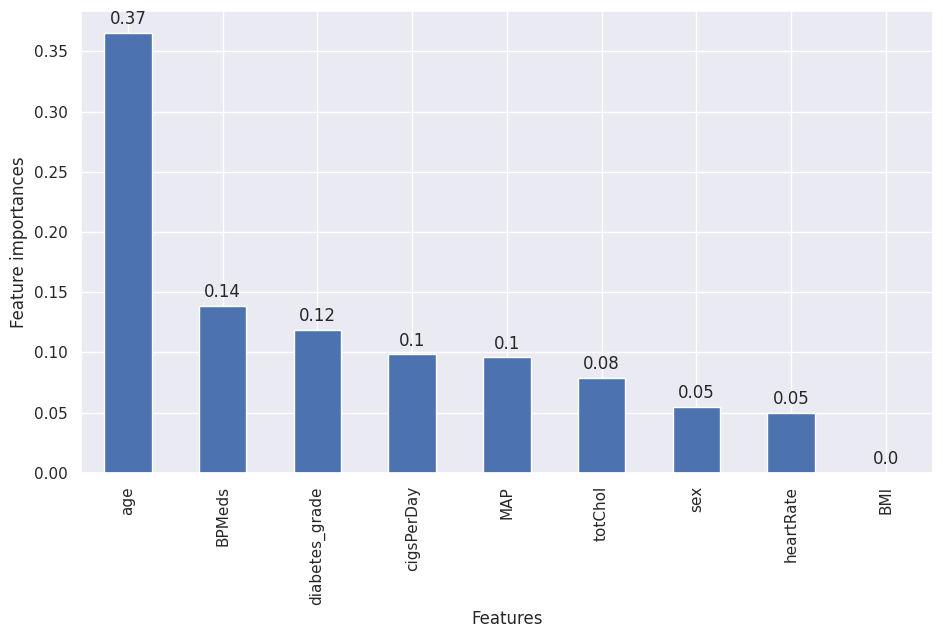

In [ ]:
# Displaying feature importances
xgb_importances = pd.Series(xgb_model.feature_importances_, index = X.columns)
plt.figure(figsize = (11, 6))
ax = xgb_importances.sort_values(ascending = False).plot(kind = 'bar')
ax.set(xlabel = 'Features', ylabel = 'Feature importances')
display_vals(ax)

The following results can be observed from the XGBoost model:
*   **Train recall of 80.55% and Test Recall of 78.43%**
*   **Train ROC-AUC score of 67.09% and Test ROC-AUC of 66.21%**
*   **23 predictions out of all the 102 patients having risk of CVD were false**
*   **The XGBoost model also predicts 'age' to be the most important feature for risk prediction of CVD, while BMI, heartRate and sex are the least important**

In [ ]:
for score in xgb_scores:
  scores[score].append(xgb_scores[score] * 100)

**Choosing the most optimum Model**

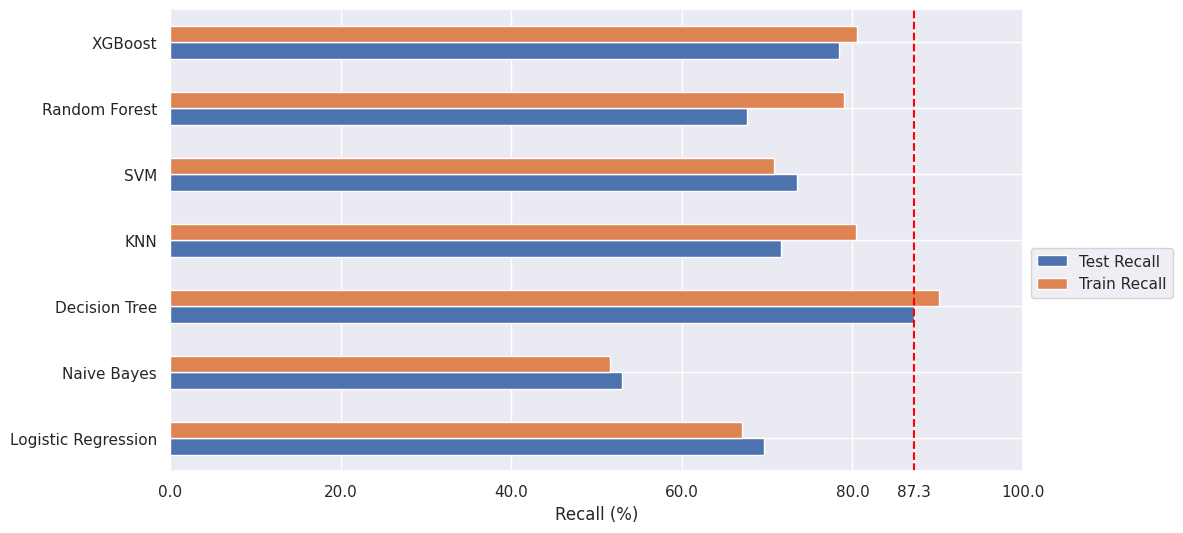


The model with maximum Test Recall is the Decision Tree model


In [ ]:
# Plotting the train and test Recalls and choosing optimum model
results_df[['Test Recall', 'Train Recall']].plot(kind = 'barh', figsize = (11, 6))
plt.xlabel('Recall (%)')
plt.xlim((0, 100))
plt.xticks([0, 20, 40, 60, 80, 100, results_df['Test Recall'].max()])
plt.axvline(results_df['Test Recall'].max(), color = 'red', linestyle = '--')
plt.legend(bbox_to_anchor = (1, 0.5))
plt.show()

best_model = results_df[results_df['Test Recall'] == results_df['Test Recall'].max()].index[0]
print(f'\nThe model with maximum Test Recall is the {best_model} model')

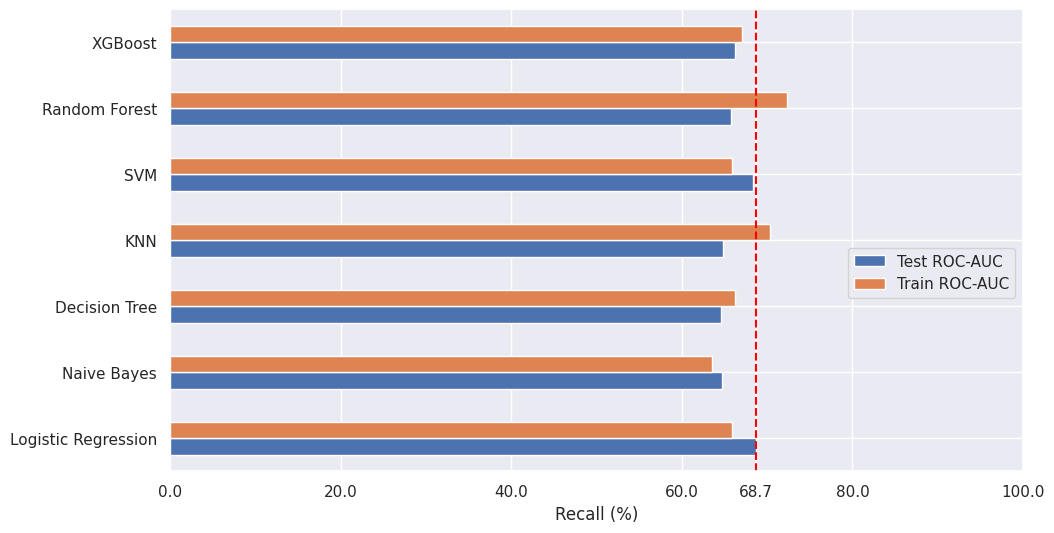


The model with maximum Test ROC-AUC is the Logistic Regression model


In [ ]:
# Plotting the train and test Recalls and choosing optimum model
results_df[['Test ROC-AUC', 'Train ROC-AUC']].plot(kind = 'barh', figsize = (11, 6))
plt.xlabel('Recall (%)')
plt.xlim((0, 100))
plt.xticks([0, 20, 40, 60, 80, 100, results_df['Test ROC-AUC'].max()])
plt.axvline(results_df['Test ROC-AUC'].max(), color = 'red', linestyle = '--')
plt.legend(bbox_to_anchor = (1, 0.5))
plt.show()

best_model = results_df[results_df['Test ROC-AUC'] == results_df['Test ROC-AUC'].max()].index[0]
print(f'\nThe model with maximum Test ROC-AUC is the {best_model} model')

The **Decision Tree** Model is the best model in this case when compared on the basis of **Test Recall**. It is to be noted that, while this model may not have the highest **Test ROC-AUC score**, almost all the models scored at a similar range in this metric (~65%). Hence, only comparing the **Test Recalls** would be apt in this case.

Therefore, Decision Tree is the most suitable model for finding an efficient solution for this research problem.